## Preliminary Research

Before beginning our analysis, it is important to understand the subject and nature of our data.
- What is Thyroid Disease?
- What is TSH measurement? What are scientifically established normal values?
    - A high TSH level indicates that the thyroid gland is not making enough thyroid hormone (primary hypothyroidism). On the other hand, a low TSH level usually indicates that the thyroid is producing too much thyroid hormone (hyperthyroidism). 
        - TSH normal values are 0.5 to 5.0 mIU/L
- What is T3 measurement? What are scientifically established normal values?
    - A Total T3 test measures the bound and free fractions of triiodothyronine. Hyperthyroid patients typically have an elevated Total T3 level. T3 tests can be used to support a diagnosis of hyperthyroidism and can determine the severity hyperthyroidism.
        - A normal Total T3 level in adults ranges from 80-220 ng/dL
- What is TT4 measurement? What are scientifically established normal values?
    - A Total T4 test measures the bound and free thyroxine (T4) hormone in the blood. Total T4 levels are affected by medications and medical conditions that change thyroid hormone binding proteins. Estrogen, oral contraceptive pills, pregnancy, liver disease, and hepatitis C virus infection are common causes of increased thyroid hormone binding proteins and will result in a high Total T4. Oppositely, Testosterone or androgens and anabolic steroids are common causes of decreased thyroid hormone binding proteins and will result in a low Total T4.
        - A normal Total T4 level in adults ranges from 5.0 to 12.0μg/dL
- What is T4U measurement? What are scientifically established normal values?
    - T4U tests measure thyroxine (T4) utilization rate in the body. They can help measure how well the body is utilizing T4 hormone.
- What is FTI measurement? What are scientifically established normal values?
    - A Free T4 Index measures what is not bound and able to freely enter and affect the body tissues. Tests measuring free T4 index (FTI) usually more accurately reflect how the thyroid gland is functioning.
        - FT4 normal values are 0.7 to 1.9ng/dL

We do not know the units that the different hormone blood measurements in our dataset use. But knowing about what these levels are usually for individuals can help us tremendously in understanding our dataset. As well as making hypothesis of the units that are used in the dataset and detecting Outliers/inconsistencies.

Now that we have this information, let us begin with the analysis.

In [1]:
#library import
import pandas as pd # for data manipulation and analysis
import numpy as np # for scientific computing with Python
import matplotlib.pyplot as plt # for data visualization
%matplotlib inline
import seaborn as sns # for advanced visualization

#sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import log_loss
from sklearn import metrics


In [2]:
#data injection
df= pd.read_csv('thyroidDF.csv')

In [3]:
df.shape

(9172, 31)

Our dataset has 31 columns and 9172 rows


In [4]:
df.head(30)

age  sex on_thyroxine query_on_thyroxine on_antithyroid_meds sick  \
0    29    F            f                  f                   f    f   
1    29    F            f                  f                   f    f   
2    41    F            f                  f                   f    f   
3    36    F            f                  f                   f    f   
4    32    F            f                  f                   f    f   
5    60    F            f                  f                   f    f   
6    77    F            f                  f                   f    f   
7    28    F            f                  f                   f    f   
8    28    F            f                  f                   f    f   
9    28    F            f                  f                   f    f   
10   54    F            f                  f                   f    f   
11   42    F            f                  f                   f    f   
12   51    M            t                  f                   f    f   
13   51    F            f                  f                   f    f   
14   37    F            f                  f                   f    f   
15   16    M            f                  f                   f    f   
16   54    F            f                  f                   f    f   
17   43    M            f                  f                   f    f   
18   63    F            t                  f                   f    t   
19   36    F            f                  f                   f    f   
20   40    F            f                  t                   f    f   
21   40    F            f                  f                   f    f   
22   40    F            f                  f                   f    f   
23   77    F            f                  f                   f    f   
24   77  NaN            f                  f                   f    f   
25   77    F            f                  f                   f    f   
26   77    F            f                  f                   f    f   
27   51    F            f                  f                   f    f   
28   75    F            f                  f                   f    f   
29   56    M            f                  f                   f    f   

   pregnant thyroid_surgery I131_treatment query_hypothyroid  ...    TT4  \
0         f               f              f                 t  ...    NaN   
1         f               f              f                 f  ...  128.0   
2         f               f              f                 f  ...    NaN   
3         f               f              f                 f  ...    NaN   
4         f               f              f                 f  ...    NaN   
5         f               f              f                 f  ...    NaN   
6         f               f              f                 f  ...    NaN   
7         f               f              f                 f  ...  116.0   
8         f               f              f                 f  ...   76.0   
9         f               f              f                 f  ...   83.0   
10        f               f              f                 f  ...  133.0   
11        f               f              f                 f  ...  105.0   
12        f               f              f                 f  ...    NaN   
13        f               f              f                 f  ...  116.0   
14        f               f              f                 f  ...    NaN   
15        f               f              f                 f  ...    NaN   
16        f               f              f                 f  ...  122.0   
17        f               f              f                 f  ...  116.0   
18        f               f              f                 f  ...   48.0   
19        f               f              f                 t  ...   90.0   
20        f               f              f                 f  ...   79.0   
21        f               f              f                 f  ...  1

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

In [6]:
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'target', 'patient_id'],
      dtype='object')

- memory usage is 2.2+ MB
* there are 31 columns, where 6 of them are float64, 2 are int64 and 23 of them are object




In [7]:
#Checking Null 

# Inspect missing values in the dataset
print(df.isnull().values.sum())

# Replace the ' 's with NaN
df = df.replace(" ",np.NaN)

# Count the number of NaNs in the dataset to verify
print(df.isnull().values.sum())


14629
14629


In [8]:
#making a copy of dataset first
df_copy=df.copy()

#Replace the missing sex values with mean
df_copy['sex'] = df_copy['sex'].fillna(df_copy['sex'].mode()[0])




In [9]:
df_copy.describe()

age          TSH           T3          TT4          T4U  \
count   9172.000000  8330.000000  6568.000000  8730.000000  8363.000000   
mean      73.555822     5.218403     1.970629   108.700305     0.976056   
std     1183.976718    24.184006     0.887579    37.522670     0.200360   
min        1.000000     0.005000     0.050000     2.000000     0.170000   
25%       37.000000     0.460000     1.500000    87.000000     0.860000   
50%       55.000000     1.400000     1.900000   104.000000     0.960000   
75%       68.000000     2.700000     2.300000   126.000000     1.065000   
max    65526.000000   530.000000    18.000000   600.000000     2.330000   

               FTI         TBG    patient_id  
count  8370.000000  349.000000  9.172000e+03  
mean    113.640746   29.870057  8.529473e+08  
std      41.551650   21.080504  7.581969e+06  
min       1.400000    0.100000  8.408010e+08  
25%      93.000000   21.000000  8.504090e+08  
50%     109.000000   26.000000  8.510040e+08  
75%     128.000000   31.000000  8.607110e+08  
max     881.000000  200.000000  8.701190e+08

* we can see there's a maximum age of 65526
* this could be an error during data entry so we'll remove data's with age above 100



In [10]:
df_copy[df_copy.age>100]

age sex on_thyroxine query_on_thyroxine on_antithyroid_meds sick  \
2976    455   F            f                  f                   f    f   
5710  65511   M            f                  f                   f    f   
6392  65512   M            f                  f                   f    f   
8105  65526   F            f                  f                   f    f   

     pregnant thyroid_surgery I131_treatment query_hypothyroid  ...    TT4  \
2976        f               f              f                 f  ...  118.0   
5710        f               f              f                 f  ...  113.0   
6392        f               f              f                 f  ...  112.0   
8105        f               f              f                 f  ...  132.0   

     T4U_measured   T4U FTI_measured    FTI TBG_measured TBG  referral_source  \
2976            t  1.13            t  104.0            f NaN              SVI   
5710            t  1.08            t  104.0            f NaN            other   
6392            t  0.84            t  133.0            f NaN            other   
8105            t  1.02            t  129.0            f NaN            other   

     target  patient_id  
2976      -   850530001  
5710      -   860210008  
6392      -   860403050  
8105      -   861014041  

[4 rows x 31 columns]

In [11]:
df_copy['age'] = np.where((df_copy.age > 100), np.nan, df_copy.age) #replaceing those ages with null value
df_copy.drop(df_copy[df_copy['age']=='np.NaN'].index, inplace=True)  #deleting them


In [12]:
# dropping redundant attributes from thyroidDF dataset
df_copy.drop(['query_hypothyroid','query_hyperthyroid','TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured', 'patient_id', 'referral_source'], axis=1, inplace=True)
df_copy.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'lithium', 'goitre', 'tumor', 'hypopituitary',
       'psych', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG', 'target'],
      dtype='object')

In [13]:
# re-mapping target vaues to diagnostic groups
diagnoses = {'-': 'negative' ,
             'A': 'hyperthyroid', 
             'B': 'hyperthyroid', 
             'C': 'hyperthyroid', 
             'D': 'hyperthyroid',
             'E': 'hypothyroid', 
             'F': 'hypothyroid', 
             'G': 'hypothyroid', 
             'H': 'hypothyroid'}

df_copy['target'] = df_copy['target'].map(diagnoses) # re-mapping
# dropping observations with 'target' null after re-mapping
df_copy.dropna(subset=['target'], inplace=True) 

# dataset initial summary
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7546 entries, 0 to 9171
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  7542 non-null   float64
 1   sex                  7546 non-null   object 
 2   on_thyroxine         7546 non-null   object 
 3   query_on_thyroxine   7546 non-null   object 
 4   on_antithyroid_meds  7546 non-null   object 
 5   sick                 7546 non-null   object 
 6   pregnant             7546 non-null   object 
 7   thyroid_surgery      7546 non-null   object 
 8   I131_treatment       7546 non-null   object 
 9   lithium              7546 non-null   object 
 10  goitre               7546 non-null   object 
 11  tumor                7546 non-null   object 
 12  hypopituitary        7546 non-null   object 
 13  psych                7546 non-null   object 
 14  TSH                  6824 non-null   float64
 15  T3                   5337 non-null   float6

# Exploratory Data Analysis

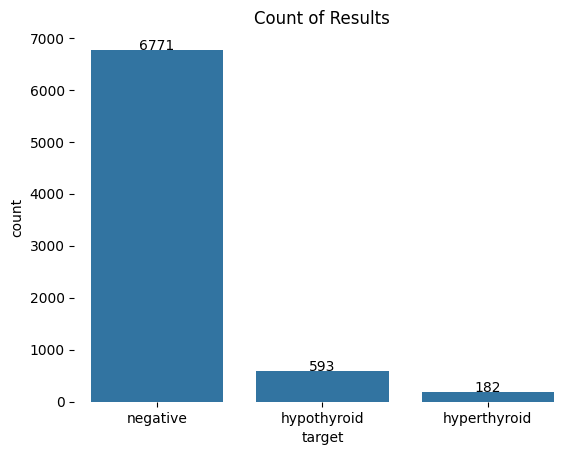

In [14]:
# Create a count plot of the thyroid target
ax= sns.countplot(x='target', data=df_copy)
plt.title('Count of Results')

# Add labels to the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(), '{:d}'.format(int(p.get_height())), ha='center')
# Remove spines
sns.despine(left=True, bottom=True)

plt.show()

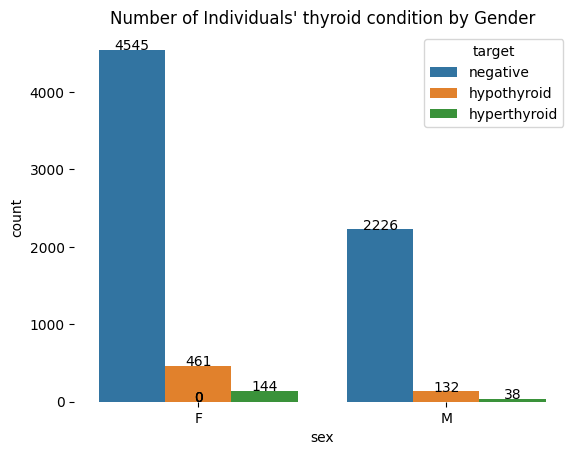

In [15]:
ax= sns.countplot(x='sex', hue ='target', data=df_copy)
plt.title('Number of Individuals\' thyroid condition by Gender')



# Add labels to the bars
for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, p.get_height(), '{:d}'.format(int(p.get_height())), ha='center')
    
    
# Remove spines
sns.despine(left=True, bottom=True)

plt.show()

The dataset has imbalanced categories which needs to be addressed before building our predictictive model

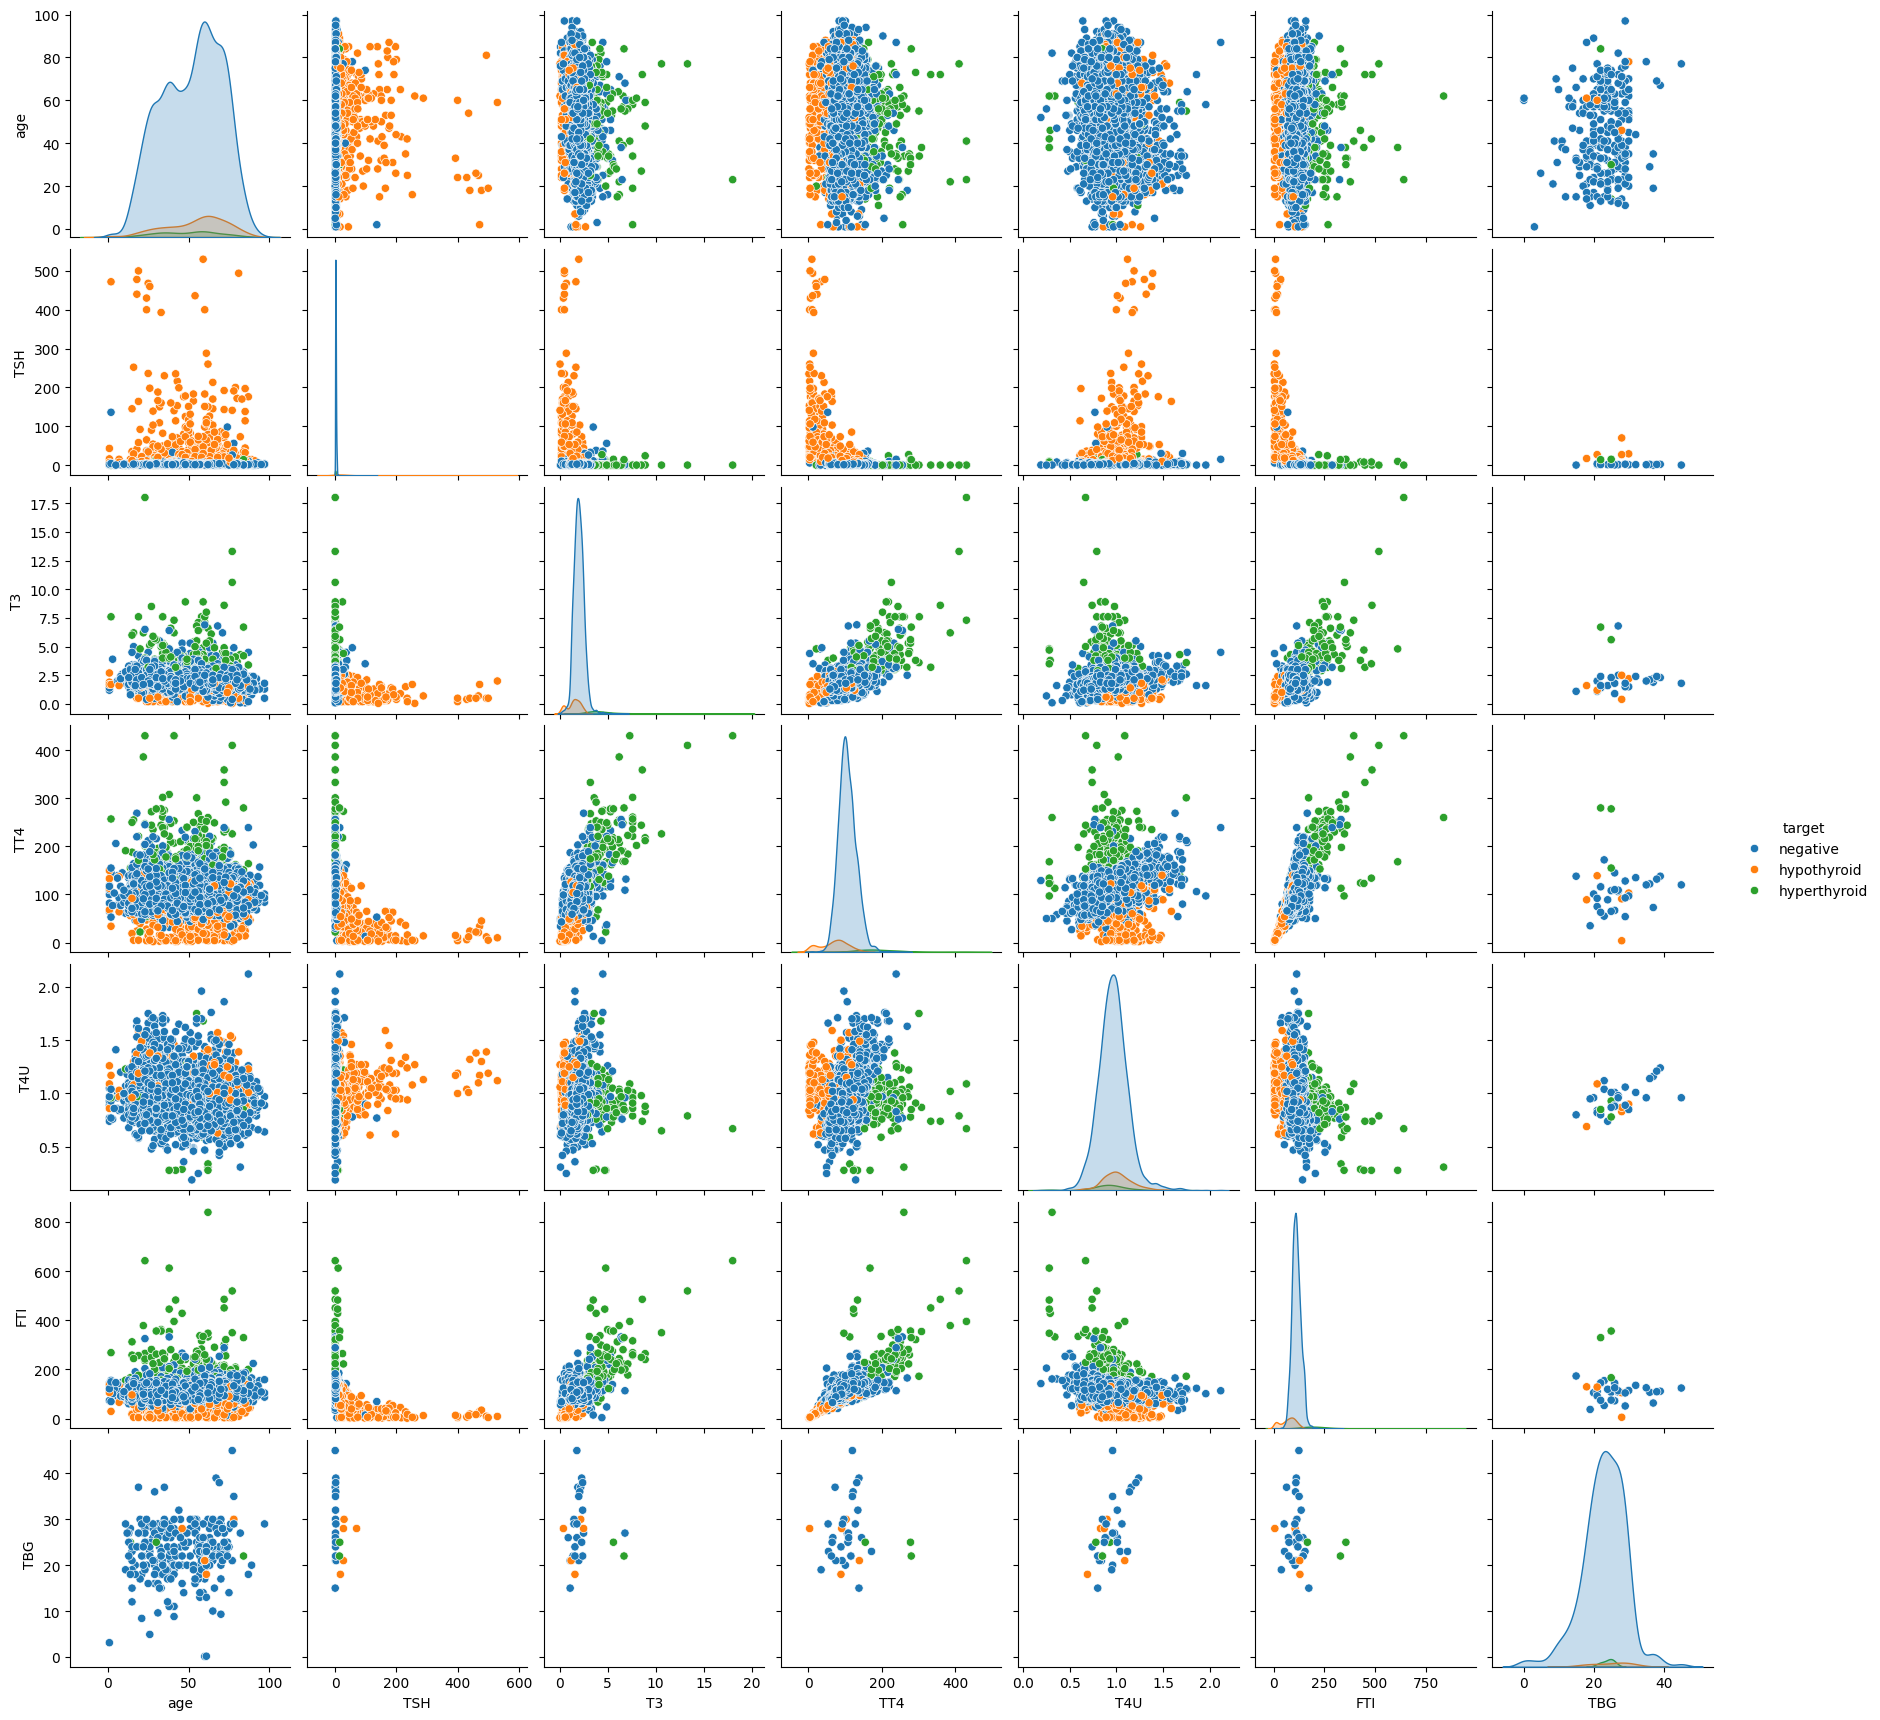

In [16]:
sns.pairplot(df_copy,hue='target')

<Axes: xlabel='target', ylabel='TBG'>

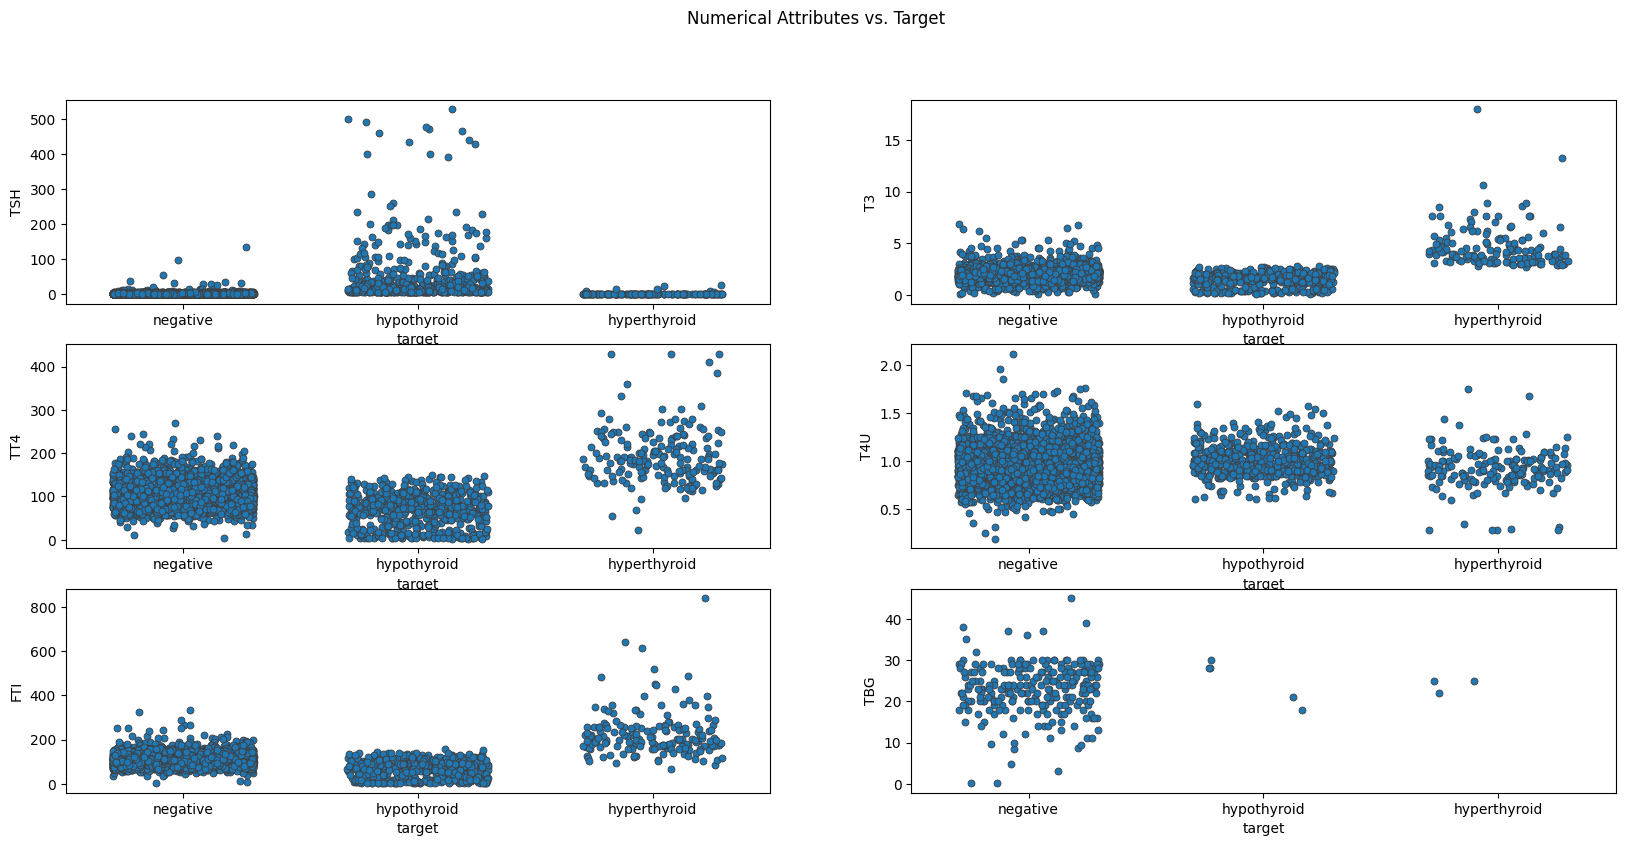

In [17]:
# setting up grid for multiple seaborn plots
fig, axes = plt.subplots(3,2,figsize=(20,9))
fig.suptitle('Numerical Attributes vs. Target')
sns.set_style('whitegrid');

# TSH vs. 'target'
sns.stripplot(x=df_copy.target, y=df_copy.TSH, linewidth=0.6, jitter= 0.3, ax=axes[0, 0])
# T3 vs. 'target'
sns.stripplot(x=df_copy.target, y=df_copy.T3, linewidth=0.6, jitter= 0.3, ax=axes[0, 1])
# TT4 vs. 'target'
sns.stripplot(x=df_copy.target, y=df_copy.TT4, linewidth=0.6, jitter= 0.3, ax=axes[1, 0])
# T4U vs. 'target'
sns.stripplot(x=df_copy.target, y=df_copy.T4U, linewidth=0.6, jitter= 0.3, ax=axes[1, 1])
# FTI vs. 'target'
sns.stripplot(x=df_copy.target, y=df_copy.FTI, linewidth=0.6, jitter= 0.3, ax=axes[2, 0])
# TBG vs. 'target'
sns.stripplot(x=df_copy.target, y=df_copy.TBG, linewidth=0.6, jitter= 0.3, ax=axes[2, 1])

In [18]:
# TSH
Q1_TSH = df_copy['TSH'].quantile(0.25)
Q3_TSH = df_copy['TSH'].quantile(0.75)
IQR_TSH = Q3_TSH - Q1_TSH
under_TSH = df_copy['TSH'] < (Q1_TSH - 3 * IQR_TSH)
upper_TSH = df_copy['TSH'] > (Q3_TSH + 3 * IQR_TSH)
print('TSH:', 'lower outliers -', sum(under_TSH), ' | upper outliers -', sum(upper_TSH))

# T3
Q1_T3 = df_copy['T3'].quantile(0.25)
Q3_T3 = df_copy['T3'].quantile(0.75)
IQR_T3 = Q3_T3 - Q1_T3
under_T3 = df_copy['T3'] < (Q1_T3 - 3 * IQR_T3)
upper_T3 = df_copy['T3'] > (Q3_T3 + 3 * IQR_T3)
print('T3:', 'lower outliers -', sum(under_T3), ' | upper outliers -', sum(upper_T3))

# TT4
Q1_TT4 = df_copy['TT4'].quantile(0.25)
Q3_TT4 = df_copy['TT4'].quantile(0.75)
IQR_TT4 = Q3_TT4 - Q1_TT4
under_TT4 = df_copy['TT4'] < (Q1_TT4 - 3 * IQR_TT4)
upper_TT4 = df_copy['TT4'] > (Q3_TT4 + 3 * IQR_TT4)
print('TT4:', 'lower outliers -', sum(under_TT4), ' | upper outliers -', sum(upper_TT4))

# T4U
Q1_T4U = df_copy['T4U'].quantile(0.25)
Q3_T4U = df_copy['T4U'].quantile(0.75)
IQR_T4U = Q3_T4U - Q1_T4U
under_T4U = df_copy['T4U'] < (Q1_T4U - 3 * IQR_T4U)
upper_T4U = df_copy['T4U'] > (Q3_T4U + 3 * IQR_T4U)
print('T4U:', 'lower outliers -', sum(under_T4U), ' | upper outliers -', sum(upper_T4U))

# FTI
Q1_FTI = df_copy['FTI'].quantile(0.25)
Q3_FTI = df_copy['FTI'].quantile(0.75)
IQR_FTI = Q3_FTI - Q1_FTI
under_FTI = df_copy['FTI'] < (Q1_FTI - 3 * IQR_FTI)
upper_FTI = df_copy['FTI'] > (Q3_FTI + 3 * IQR_FTI)
print('FTI:', 'lower outliers -', sum(under_FTI), ' | upper outliers -', sum(upper_FTI))

TSH: lower outliers - 0  | upper outliers - 456
T3: lower outliers - 0  | upper outliers - 84
TT4: lower outliers - 0  | upper outliers - 55
T4U: lower outliers - 7  | upper outliers - 22
FTI: lower outliers - 0  | upper outliers - 83


## TSH
- A high TSH level indicates that the thyroid gland is not making enough thyroid hormone (primary hypothyroidism). On the other hand, a low TSH level usually indicates that the thyroid is producing too much thyroid hormone (hyperthyroidism). 
    - TSH normal values are 0.5 to 5.0 mIU/L
    - In Nepal, it's value is, also, referred as µIU/mL, which is same value as above
    

In [19]:
# Create a dictionary with the values
TSH_data = {'Metric': ['Highest TSH Level', 'Median TSH Level', 'Lowest TSH Level'],
                   'Value': [df['TSH'].max(), df['TSH'].median(), df['TSH'].min()]}



# Create a pandas DataFrame from the dictionary
TSH_table = pd.DataFrame(TSH_data)



# Create the table using Seaborn styling
styled_table = (TSH_table.style
                .set_caption('TSH Levels')
                .set_properties(**{'text-align': 'center'})
                .set_table_styles([{'selector': 'caption',
                                    'props': [('font-size', '18px'),
                                              ('font-weight', 'bold'),
                                              ('padding-bottom', '10px')]}])
                
                .format({'Value': '{:.2f}'}))
# Display the table
display(styled_table)

/tmp/ipykernel_14871/687892489.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TSH', y='target', data=df_copy, palette=custom_colors)


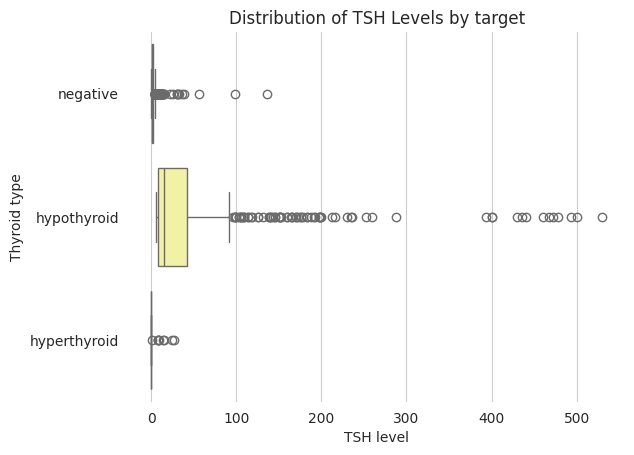

In [20]:
custom_colors = ['#66B2FF', '#FFFF99','#99FF99' ]

sns.set_style("whitegrid")
sns.boxplot(x='TSH', y='target', data=df_copy, palette=custom_colors)
plt.title('Distribution of TSH Levels by target')
plt.xlabel('TSH level')
plt.ylabel('Thyroid type')



# Remove spines
sns.despine(left=True, bottom=True)
plt.show()

In [21]:
df_copy[df_copy.TSH>5]

age sex on_thyroxine query_on_thyroxine on_antithyroid_meds sick  \
18    63.0   F            t                  f                   f    t   
22    40.0   F            f                  f                   f    f   
43    41.0   F            f                  f                   f    f   
71    61.0   M            f                  f                   f    t   
79    27.0   F            f                  f                   f    f   
...    ...  ..          ...                ...                 ...  ...   
9134  74.0   F            f                  f                   f    t   
9135  47.0   F            f                  f                   f    f   
9138  76.0   M            f                  f                   f    f   
9142  15.0   F            f                  f                   f    f   
9149  75.0   F            t                  f                   f    f   

     pregnant thyroid_surgery I131_treatment lithium  ... tumor hypopituitary  \
18          f               f              f       f  ...     f             f   
22          f               f              f       f  ...     f             f   
43          f               f              f       f  ...     f             f   
71          f               f              f       f  ...     f             f   
79          f               f              f       f  ...     f             f   
...       ...             ...            ...     ...  ...   ...           ...   
9134        f               f              f       f  ...     f             f   
9135        f               f              f       f  ...     f             f   
9138        f               f              f       f  ...     f             f   
9142        f               f              f       f  ...     f             f   
9149        f               f              f       f  ...     f             f   

     psych         TSH   T3    TT4   T4U    FTI  TBG       target  
18       f   68.000000  NaN   48.0  1.02   47.0  NaN  hypothyroid  
22       f    5.900000  2.1   88.0  0.84  105.0  NaN     negative  
43       f  140.000000  NaN   33.0  1.07   31.0  NaN  hypothyroid  
71       f    9.799999  1.2  114.0  0.84  136.0  NaN  hypothyroid  
79       f   90.000000  0.4    7.5  0.94    7.5  NaN  hypothyroid  
...    ...         ...  ...    ...   ...    ...  ...          ...  
9134     f   53.000000  1.0   49.0  1.25   39.0  NaN  hypothyroid  
9135     f    5.800000  NaN   71.0  0.71  100.0  NaN     negative  
9138     f    7.400000  NaN  122.0  0.94  130.0  NaN  hypothyroid  
9142     f   12.000000  NaN   92.0  0.96   96.0  NaN  hypothyroid  
9149     f   18.000000  NaN   54.0  1.03   53.0  NaN  hypothyroid  

[801 rows x 21 columns]

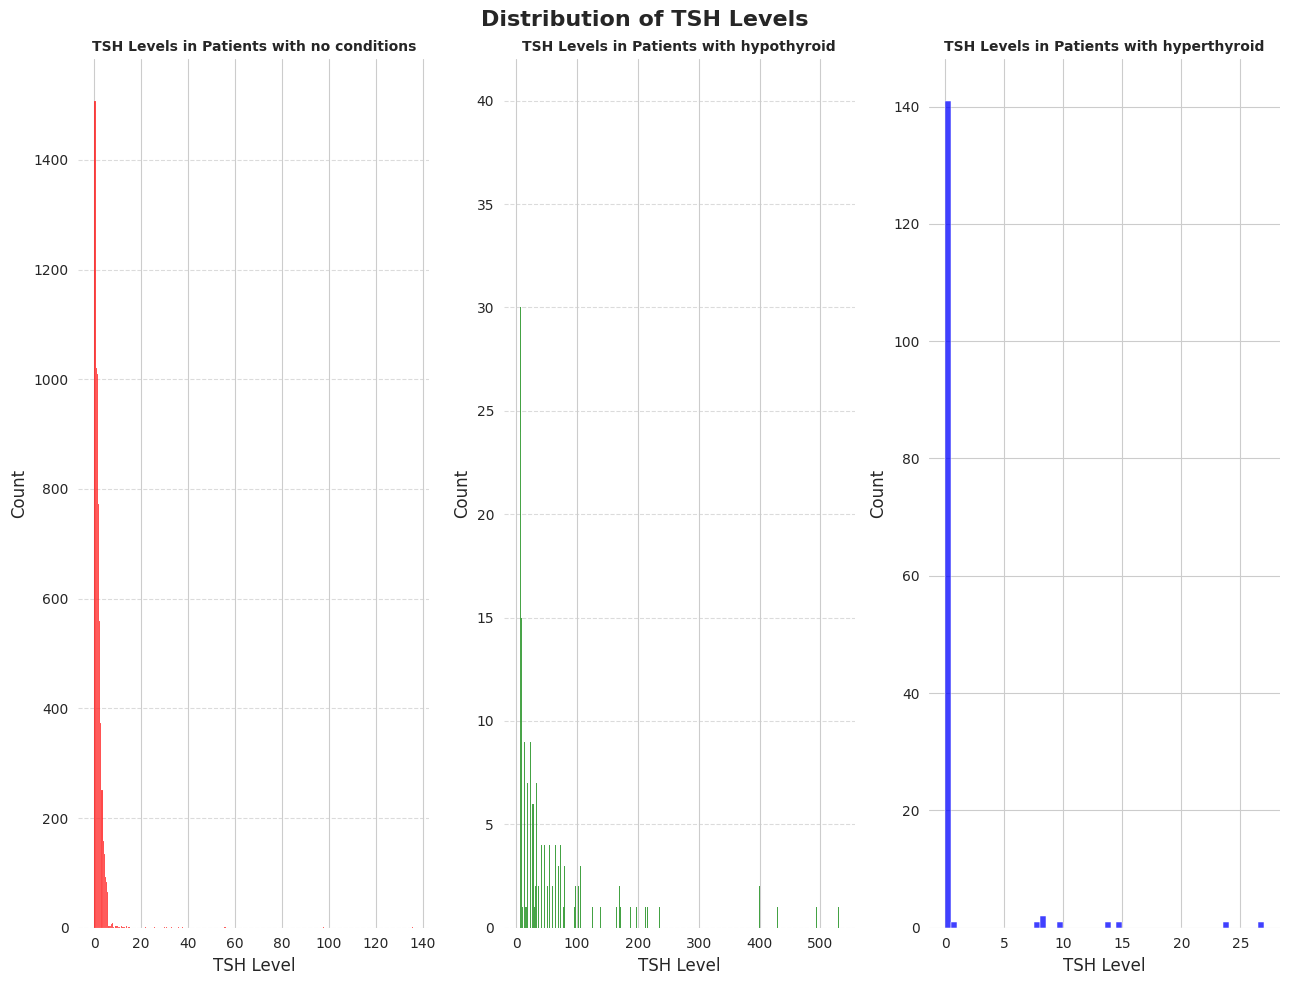

In [22]:
# Filter the data by thyroid status
negative = df_copy[df_copy['target'] == "negative"]
hypothyroid = df_copy[df_copy['target'] == "hypothyroid"]
hyperthyroid=df_copy[df_copy['target'] == "hyperthyroid"]


# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13,10))

# Plot histograms with Seaborn
sns.histplot(negative, x='TSH', ax=ax1, color='red',  binwidth=0.5)
sns.histplot(hypothyroid, x='TSH', ax=ax2, color='green',  binwidth=0.5)
sns.histplot(hyperthyroid, x='TSH', ax=ax3, color='blue',  binwidth=0.5)


# Set titles and axis labels
ax1.set_title('TSH Levels in Patients with no conditions', fontsize=10, fontweight='bold')
ax2.set_title('TSH Levels in Patients with hypothyroid', fontsize=10, fontweight='bold')
ax3.set_title('TSH Levels in Patients with hyperthyroid', fontsize=10, fontweight='bold')
fig.suptitle('Distribution of TSH Levels', fontsize=16, fontweight='bold')
ax1.set_xlabel('TSH Level', fontsize=12)
ax2.set_xlabel('TSH Level', fontsize=12)
ax3.set_xlabel('TSH Level', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax2.set_ylabel('Count', fontsize=12)
ax3.set_ylabel('Count', fontsize=12)

# Customize tick labels and grid
ax1.tick_params(labelsize=10)
ax2.tick_params(labelsize=10)
ax3.tick_params(labelsize=10)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Remove spines
sns.despine(left=True, bottom=True)

# Adjust plot size
plt.tight_layout()

# Show the plot
plt.show()


## T3
   - A Total T3 test measures the bound and free fractions of triiodothyronine. Hyperthyroid patients typically have an elevated Total T3 level. T3 tests can be used to support a diagnosis of hyperthyroidism and can determine the severity hyperthyroidism.
        - A normal Total T3 level in adults ranges from 80-220 ng/dL

In [23]:
# Create a dictionary with the values
T3_data = {'Metric': ['Highest T3 Level', 'Median T3 Level', 'Lowest T3 Level'],
                   'Value': [df['T3'].max(), df['T3'].median(), df['T3'].min()]}


# Create a pandas DataFrame from the dictionary
T3_table = pd.DataFrame(T3_data)

# Create the table using Seaborn styling
styled_table = (T3_table.style
                .set_caption('T3 Levels')
                .set_properties(**{'text-align': 'center'})
                .set_table_styles([{'selector': 'caption',
                                    'props': [('font-size', '18px'),
                                              ('font-weight', 'bold'),
                                              ('padding-bottom', '10px')]}])
                
                .format({'Value': '{:.2f}'}))
# Display the table
display(styled_table)

- we can assume that the unit taken T3 measurement is in ng/mL where the normal range is 0.6 to 1.81 ng/mL


/tmp/ipykernel_14871/2229826729.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='T3', y='target', data=df_copy, palette=custom_colors)


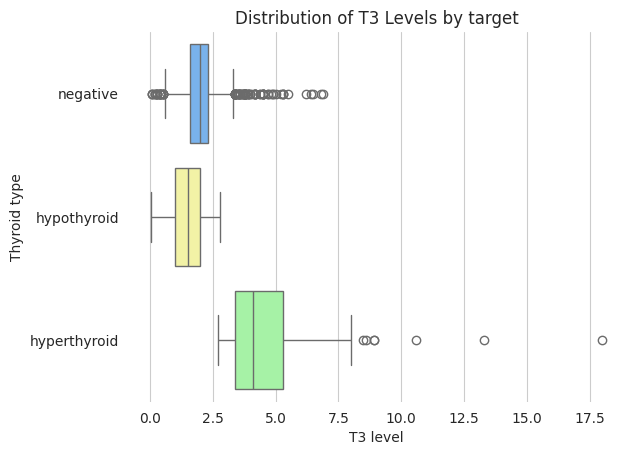

In [24]:
custom_colors = ['#66B2FF', '#FFFF99','#99FF99' ]

sns.set_style("whitegrid")
sns.boxplot(x='T3', y='target', data=df_copy, palette=custom_colors)
plt.title('Distribution of T3 Levels by target')
plt.xlabel('T3 level')
plt.ylabel('Thyroid type')



# Remove spines
sns.despine(left=True, bottom=True)
plt.show()

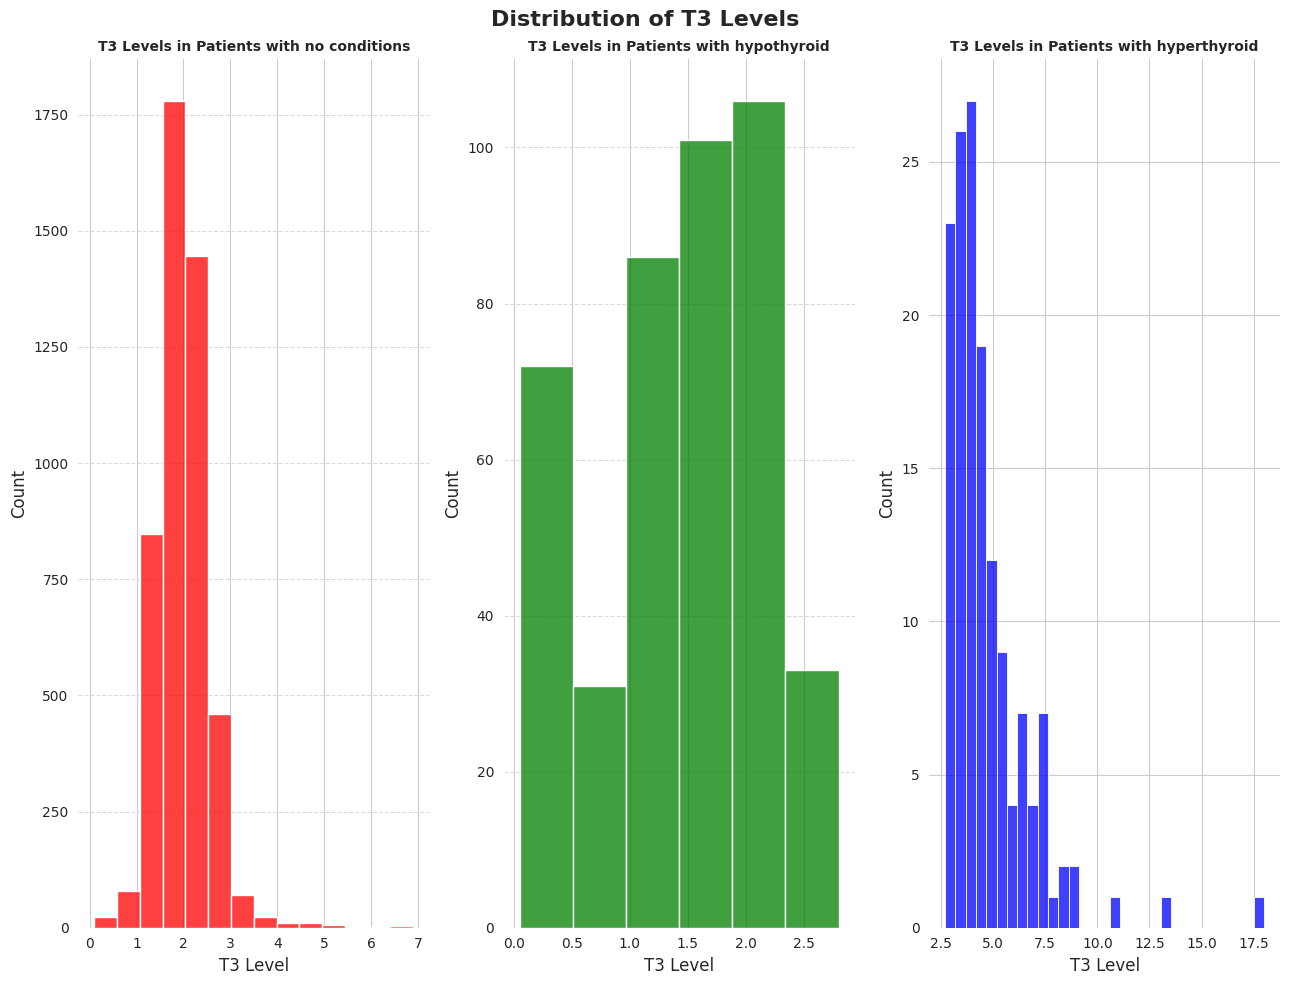

In [25]:
# Filter the data by thyroid status
negative = df_copy[df_copy['target'] == "negative"]
hypothyroid = df_copy[df_copy['target'] == "hypothyroid"]
hyperthyroid=df_copy[df_copy['target'] == "hyperthyroid"]


# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13,10))

# Plot histograms with Seaborn
sns.histplot(negative, x='T3', ax=ax1, color='red',  binwidth=0.5)
sns.histplot(hypothyroid, x='T3', ax=ax2, color='green',  binwidth=0.5)
sns.histplot(hyperthyroid, x='T3', ax=ax3, color='blue',  binwidth=0.5)


# Set titles and axis labels
ax1.set_title('T3 Levels in Patients with no conditions', fontsize=10, fontweight='bold')
ax2.set_title('T3 Levels in Patients with hypothyroid', fontsize=10, fontweight='bold')
ax3.set_title('T3 Levels in Patients with hyperthyroid', fontsize=10, fontweight='bold')
fig.suptitle('Distribution of T3 Levels', fontsize=16, fontweight='bold')
ax1.set_xlabel('T3 Level', fontsize=12)
ax2.set_xlabel('T3 Level', fontsize=12)
ax3.set_xlabel('T3 Level', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax2.set_ylabel('Count', fontsize=12)
ax3.set_ylabel('Count', fontsize=12)

# Customize tick labels and grid
ax1.tick_params(labelsize=10)
ax2.tick_params(labelsize=10)
ax3.tick_params(labelsize=10)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Remove spines
sns.despine(left=True, bottom=True)

# Adjust plot size
plt.tight_layout()

# Show the plot
plt.show()


## TT4
 - A Total T4 test measures the bound and free thyroxine (T4) hormone in the blood. Total T4 levels are affected by medications and medical conditions that change thyroid hormone binding proteins. Estrogen, oral contraceptive pills, pregnancy, liver disease, and hepatitis C virus infection are common causes of increased thyroid hormone binding proteins and will result in a high Total T4. Oppositely, Testosterone or androgens and anabolic steroids are common causes of decreased thyroid hormone binding proteins and will result in a low Total T4.
    - A normal Total T4 level in adults ranges from 4.5 to 13.0μg/dL

In [26]:
# Create a dictionary with the values
TT4_data = {'Metric': ['Highest TT4 Level', 'median TT4 Level', 'Lowest TT4 Level'],
                   'Value': [df['TT4'].max(), df['TT4'].median(), df['TT4'].min()]}

# Create a pandas DataFrame from the dictionary
TT4_table = pd.DataFrame(TT4_data)

# Create the table using Seaborn styling
styled_table = (TT4_table.style
                .set_caption('TT4 Levels')
                .set_properties(**{'text-align': 'center'})
                .set_table_styles([{'selector': 'caption',
                                    'props': [('font-size', '18px'),
                                              ('font-weight', 'bold'),
                                              ('padding-bottom', '10px')]}])
                
                .format({'Value': '{:.2f}'}))
# Display the table
display(styled_table)

* The TT4 unit is assumned to be in ng/mL whose normal range is 45-130


/tmp/ipykernel_14871/3439948762.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TT4', y='target', data=df_copy, palette=custom_colors)


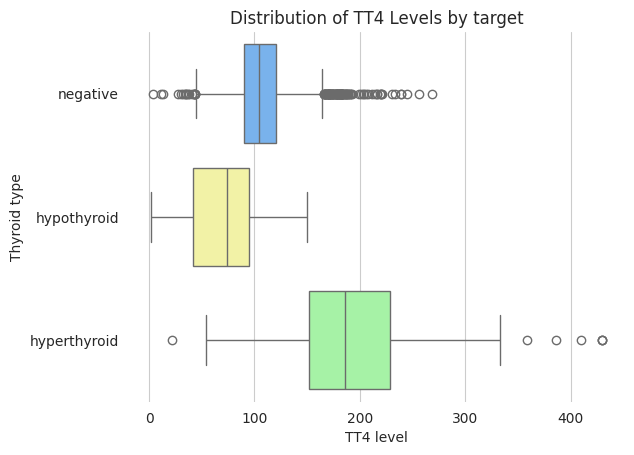

In [27]:
custom_colors = ['#66B2FF', '#FFFF99','#99FF99' ]

sns.set_style("whitegrid")
sns.boxplot(x='TT4', y='target', data=df_copy, palette=custom_colors)
plt.title('Distribution of TT4 Levels by target')
plt.xlabel('TT4 level')
plt.ylabel('Thyroid type')



# Remove spines
sns.despine(left=True, bottom=True)
plt.show()

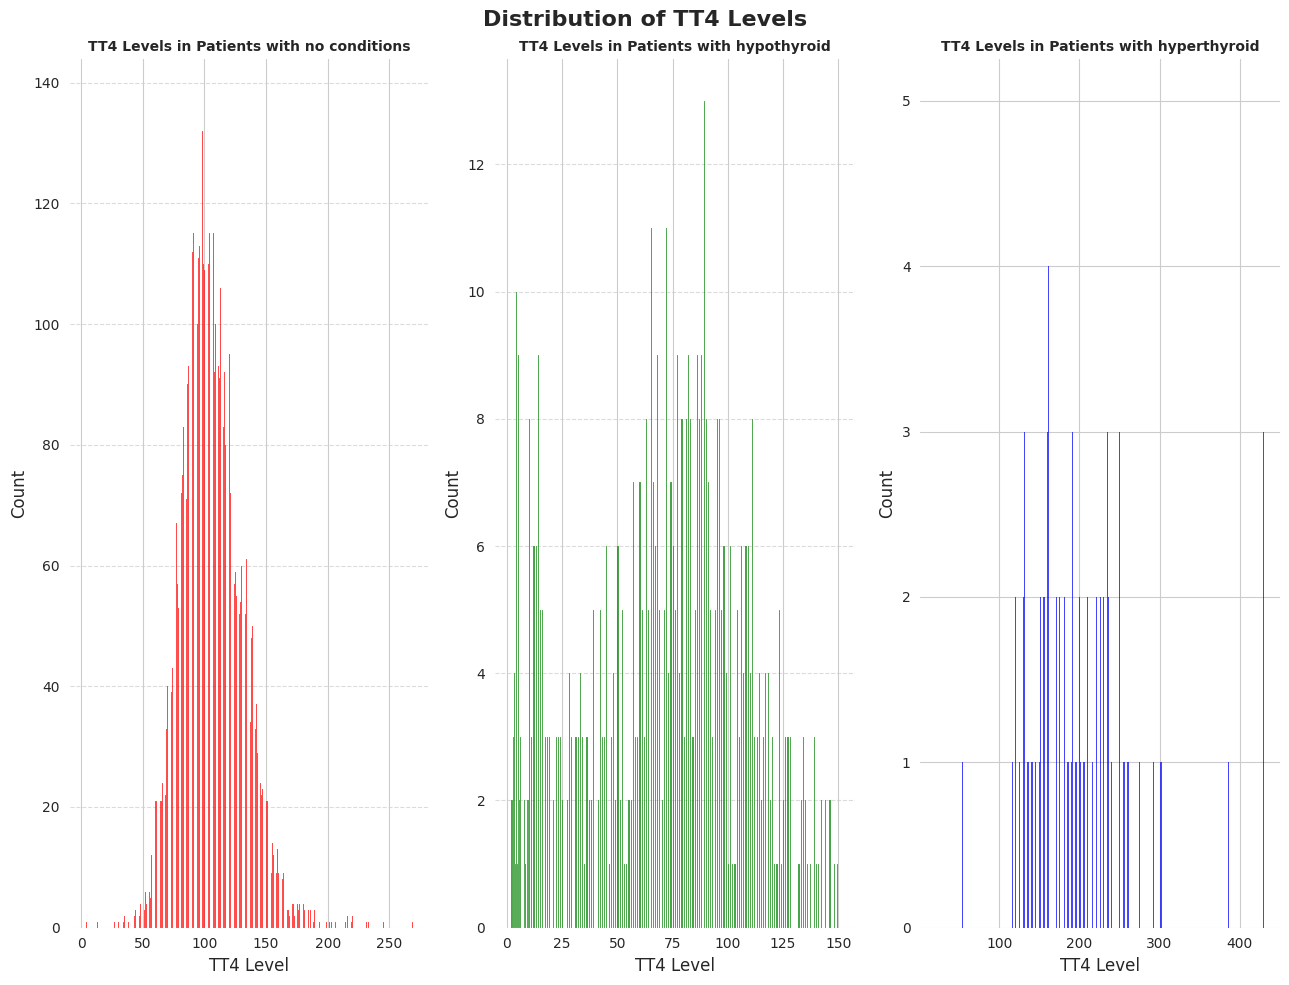

In [28]:
# Filter the data by thyroid status
negative = df_copy[df_copy['target'] == "negative"]
hypothyroid = df_copy[df_copy['target'] == "hypothyroid"]
hyperthyroid=df_copy[df_copy['target'] == "hyperthyroid"]


# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13,10))

# Plot histograms with Seaborn
sns.histplot(negative, x='TT4', ax=ax1, color='red',  binwidth=0.5)
sns.histplot(hypothyroid, x='TT4', ax=ax2, color='green',  binwidth=0.5)
sns.histplot(hyperthyroid, x='TT4', ax=ax3, color='blue',  binwidth=0.5)


# Set titles and axis labels
ax1.set_title('TT4 Levels in Patients with no conditions', fontsize=10, fontweight='bold')
ax2.set_title('TT4 Levels in Patients with hypothyroid', fontsize=10, fontweight='bold')
ax3.set_title('TT4 Levels in Patients with hyperthyroid', fontsize=10, fontweight='bold')
fig.suptitle('Distribution of TT4 Levels', fontsize=16, fontweight='bold')
ax1.set_xlabel('TT4 Level', fontsize=12)
ax2.set_xlabel('TT4 Level', fontsize=12)
ax3.set_xlabel('TT4 Level', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax2.set_ylabel('Count', fontsize=12)
ax3.set_ylabel('Count', fontsize=12)

# Customize tick labels and grid
ax1.tick_params(labelsize=10)
ax2.tick_params(labelsize=10)
ax3.tick_params(labelsize=10)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Remove spines
sns.despine(left=True, bottom=True)

# Adjust plot size
plt.tight_layout()

# Show the plot
plt.show()


* By comparing TSH with T4 values we could be able to see a more clear picture of the thyroid issue: 
   - Normal TSH + normal T4 = normal thyroid function
   - High TSH + normal T4 = you may have a higher risk of developing an hypothyroid
    - Low TSH + high T4 = hyperthyroid
  - High TSH + low T4 = hypothyroid
  - Low TSH + low T4 = low thyroid function due to another problem, such as pituitary gland dysfunction
* Looking at TSH alongside T3 test results can also help with diagnosis:
    - Low T3 + high TSH = low thyroid function
    - High T3 + low TSH = hyperthyroid
            

## T4U
- T4U tests measure thyroxine (T4) utilization rate in the body. They can help measure how well the body is utilizing T4 hormone.
- Normal range: 0.7 - 1.2

In [29]:
# Create a dictionary with the values
T4U_data = {'Metric': ['Highest T4U Level', 'Median T4U Level', 'Lowest T4U Level'],
                   'Value': [df['T4U'].max(), df['T4U'].median(), df['T4U'].min()]}

# Create a pandas DataFrame from the dictionary
T4U_table = pd.DataFrame(T4U_data)

# Create the table using Seaborn styling
styled_table = (T4U_table.style
                .set_caption('T4U Levels')
                .set_properties(**{'text-align': 'center'})
                .set_table_styles([{'selector': 'caption',
                                    'props': [('font-size', '18px'),
                                              ('font-weight', 'bold'),
                                              ('padding-bottom', '10px')]}])
                
                .format({'Value': '{:.2f}'}))
# Display the table
display(styled_table)

/tmp/ipykernel_14871/1886828717.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='T4U', y='target', data=df_copy, palette=custom_colors)


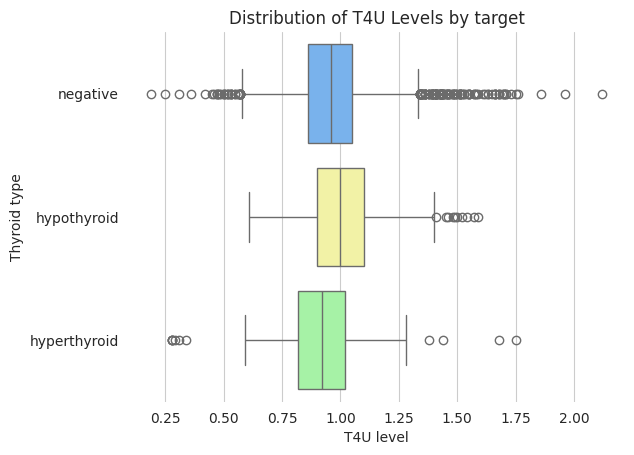

In [30]:
custom_colors = ['#66B2FF', '#FFFF99','#99FF99' ]

sns.set_style("whitegrid")
sns.boxplot(x='T4U', y='target', data=df_copy, palette=custom_colors)
plt.title('Distribution of T4U Levels by target')
plt.xlabel('T4U level')
plt.ylabel('Thyroid type')

# Remove spines
sns.despine(left=True, bottom=True)
plt.show()

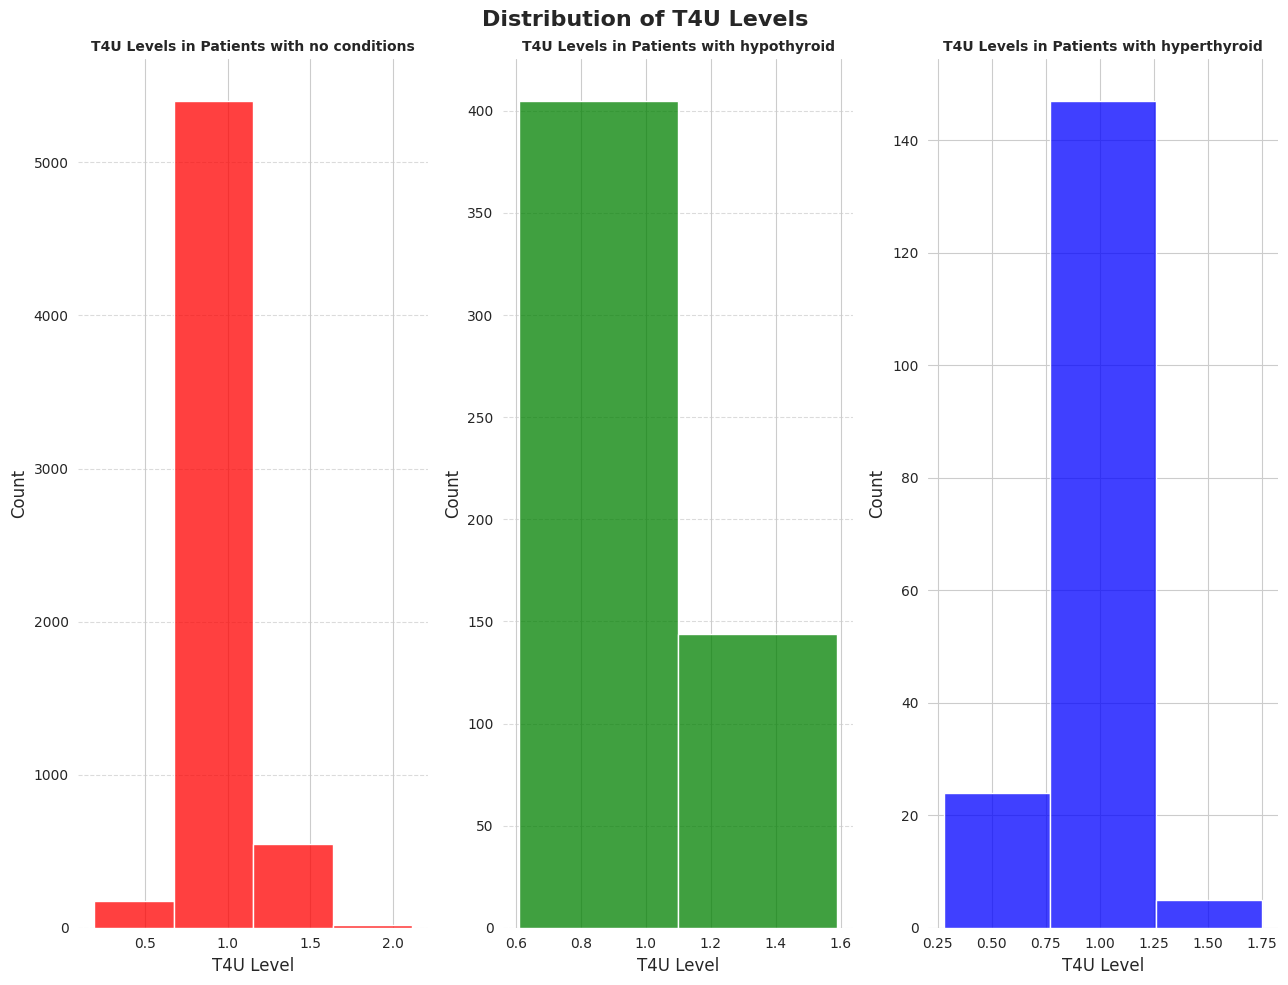

In [31]:
# Filter the data by thyroid status
negative = df_copy[df_copy['target'] == "negative"]
hypothyroid = df_copy[df_copy['target'] == "hypothyroid"]
hyperthyroid=df_copy[df_copy['target'] == "hyperthyroid"]


# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13,10))

# Plot histograms with Seaborn
sns.histplot(negative, x='T4U', ax=ax1, color='red',  binwidth=0.5)
sns.histplot(hypothyroid, x='T4U', ax=ax2, color='green',  binwidth=0.5)
sns.histplot(hyperthyroid, x='T4U', ax=ax3, color='blue',  binwidth=0.5)


# Set titles and axis labels
ax1.set_title('T4U Levels in Patients with no conditions', fontsize=10, fontweight='bold')
ax2.set_title('T4U Levels in Patients with hypothyroid', fontsize=10, fontweight='bold')
ax3.set_title('T4U Levels in Patients with hyperthyroid', fontsize=10, fontweight='bold')
fig.suptitle('Distribution of T4U Levels', fontsize=16, fontweight='bold')
ax1.set_xlabel('T4U Level', fontsize=12)
ax2.set_xlabel('T4U Level', fontsize=12)
ax3.set_xlabel('T4U Level', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax2.set_ylabel('Count', fontsize=12)
ax3.set_ylabel('Count', fontsize=12)

# Customize tick labels and grid
ax1.tick_params(labelsize=10)
ax2.tick_params(labelsize=10)
ax3.tick_params(labelsize=10)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Remove spines
sns.despine(left=True, bottom=True)

# Adjust plot size
plt.tight_layout()

# Show the plot
plt.show()


## FTI
- A Free T4 Index measures what is not bound and able to freely enter and affect the body tissues. Tests measuring free T4 index (FTI) usually more accurately reflect how the thyroid gland is functioning.
- normal range: 53- 142

In [32]:
# Create a dictionary with the values
FTI_data = {'Metric': ['Highest FTI Level', 'Median FTI Level', 'Lowest FTI Level'],
                   'Value': [df['FTI'].max(), df['FTI'].median(), df['FTI'].min()]}

# Create a pandas DataFrame from the dictionary
FTI_table = pd.DataFrame(FTI_data)

# Create the table using Seaborn styling
styled_table = (FTI_table.style
                .set_caption('FTI Levels')
                .set_properties(**{'text-align': 'center'})
                .set_table_styles([{'selector': 'caption',
                                    'props': [('font-size', '18px'),
                                              ('font-weight', 'bold'),
                                              ('padding-bottom', '10px')]}])
                
                .format({'Value': '{:.2f}'}))
# Display the table
display(styled_table)

/tmp/ipykernel_14871/3644336493.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='FTI', y='target', data=df_copy, palette=custom_colors)


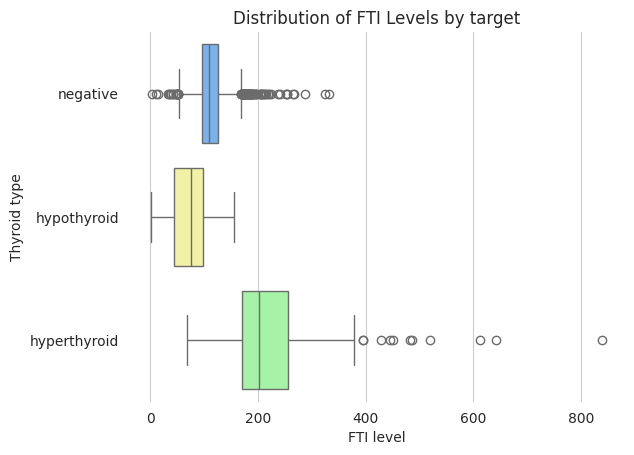

In [33]:
custom_colors = ['#66B2FF', '#FFFF99','#99FF99' ]

sns.set_style("whitegrid")
sns.boxplot(x='FTI', y='target', data=df_copy, palette=custom_colors)
plt.title('Distribution of FTI Levels by target')
plt.xlabel('FTI level')
plt.ylabel('Thyroid type')

# Remove spines
sns.despine(left=True, bottom=True)
plt.show()

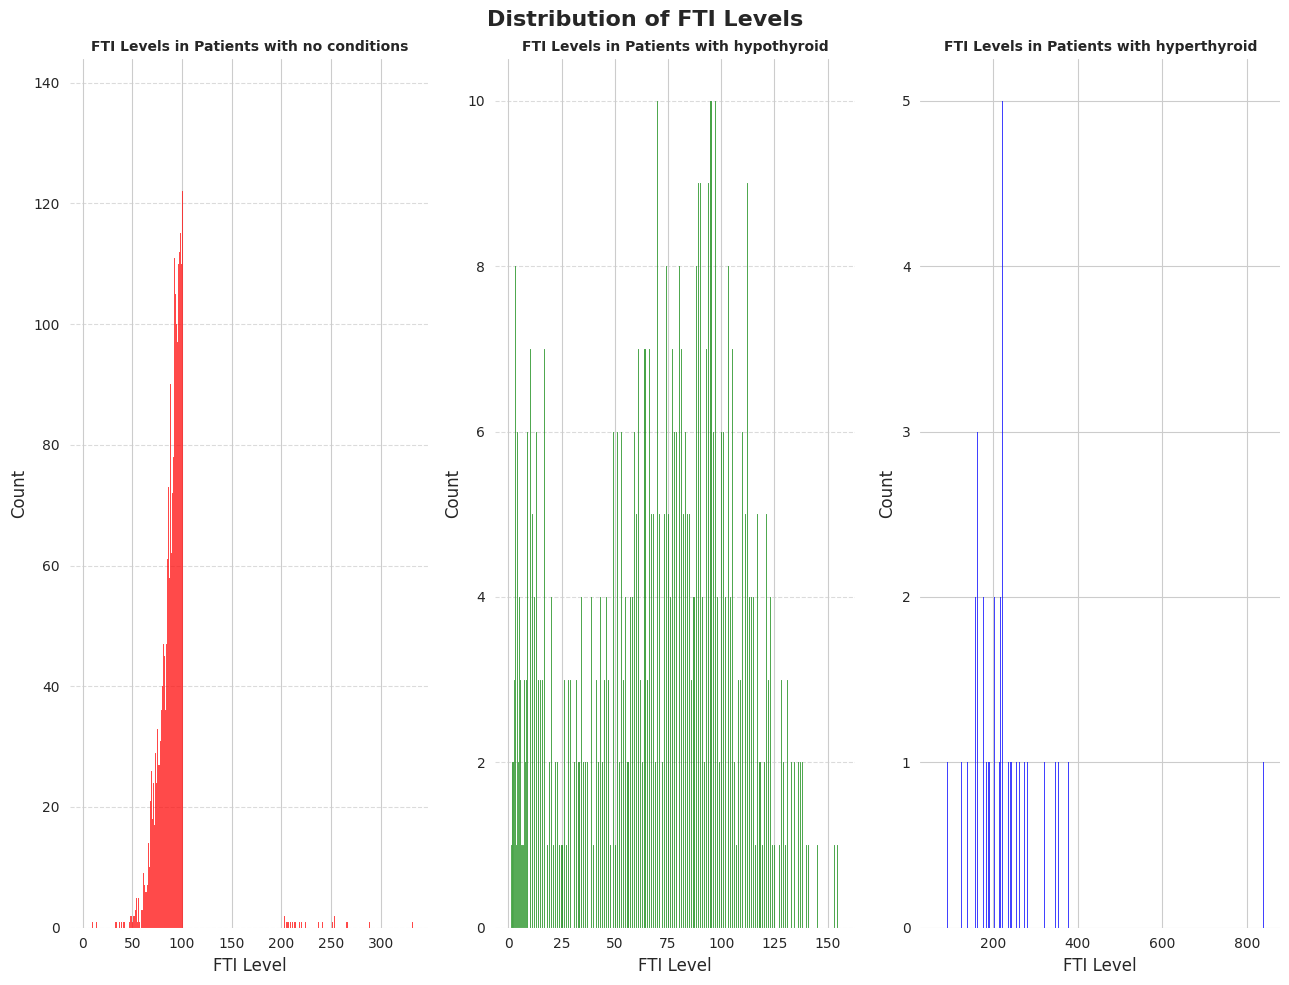

In [34]:
# Filter the data by thyroid status
negative = df_copy[df_copy['target'] == "negative"]
hypothyroid = df_copy[df_copy['target'] == "hypothyroid"]
hyperthyroid=df_copy[df_copy['target'] == "hyperthyroid"]


# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13,10))

# Plot histograms with Seaborn
sns.histplot(negative, x='FTI', ax=ax1, color='red',  binwidth=0.5)
sns.histplot(hypothyroid, x='FTI', ax=ax2, color='green',  binwidth=0.5)
sns.histplot(hyperthyroid, x='FTI', ax=ax3, color='blue',  binwidth=0.5)


# Set titles and axis labels
ax1.set_title('FTI Levels in Patients with no conditions', fontsize=10, fontweight='bold')
ax2.set_title('FTI Levels in Patients with hypothyroid', fontsize=10, fontweight='bold')
ax3.set_title('FTI Levels in Patients with hyperthyroid', fontsize=10, fontweight='bold')
fig.suptitle('Distribution of FTI Levels', fontsize=16, fontweight='bold')
ax1.set_xlabel('FTI Level', fontsize=12)
ax2.set_xlabel('FTI Level', fontsize=12)
ax3.set_xlabel('FTI Level', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax2.set_ylabel('Count', fontsize=12)
ax3.set_ylabel('Count', fontsize=12)

# Customize tick labels and grid
ax1.tick_params(labelsize=10)
ax2.tick_params(labelsize=10)
ax3.tick_params(labelsize=10)
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Remove spines
sns.despine(left=True, bottom=True)

# Adjust plot size
plt.tight_layout()

# Show the plot
plt.show()


# interpreting missing values

In [35]:
# calculating missingess of entire DF
missingness = df_copy.isnull().sum().sum() / df_copy.count().sum()
print('Overall Missingness of df_copy is: {:.2f}%'.format(missingness * 100))

# Create table for missing data analysis
def missing_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

# Analyze missing data
missing_table(df_copy).head(10)

Overall Missingness of df_copy is: 8.13%


Total   Percent
TBG             7287  0.965677
T3              2209  0.292738
TSH              722  0.095680
T4U              676  0.089584
FTI              669  0.088656
TT4              354  0.046912
age                4  0.000530
tumor              0  0.000000
psych              0  0.000000
hypopituitary      0  0.000000

### Investigating Missing Values

First we will do some calculations to determine the severity of our missing value problem. The custom function below takes a dataframe as input and keeps a tally of missing values per column, then calculates the percentage of missing values in that column and summarizes the information in an output dataframe that is easy for us to viasualize.

- The overall missingess of our dataset is **8.13%**
    - This seems worrying at first but most of that bulk is because of the TBG column which is almost entirely empty. We knew we were dropping this from the start of the analysis but have kept it for exploration purposes. Now it is time to go for it.
    
- The 'TBG' attribute is almost entirely missing from the dataset. This column will be removed at once!
- `T3` is second most missing column at **29.3%** 
    - This is a lot of missing data and it might be adviseable to remove but the column is too important for our analysis (we have also done separate research that has reiterated that T3 is a very important predictor for thyroid disease). We will try to impute this information moving forward.
- `TSH` is third most missing column at **9.56%**
    - This is a good candidate for imputation moving forward
- `FTI` is our fourth most missing column at **8.86%**
    - This is also a good candidate for imputation
- `TT4` is our fifth most missing column at **4.69%**
    - Once again a good candidate for imputation

## Cleaning Data

In [36]:
#treating missing data
df_copy.drop(['TBG'], axis=1, inplace=True)

df_copy.dropna(subset=['age'], inplace=True)

T3_median = df_copy['T3'].median()
df_copy['T3'].fillna(T3_median, inplace=True)

TSH_median = df_copy['TSH'].median()
df_copy['TSH'].fillna(TSH_median, inplace=True)

T4U_median = df_copy['T4U'].median()
df_copy['T4U'].fillna(T4U_median, inplace=True)

FTI_median = df_copy['FTI'].median()
df_copy['FTI'].fillna(FTI_median, inplace=True)

age_median = df_copy['TT4'].median()
df_copy['TT4'].fillna(age_median, inplace=True)


# calculating missingess of entire DF
missingness = df_copy.isnull().sum().sum() / df_copy.count().sum()
print('Overall Missingness of df_copy is: {:.2f}%'.format(missingness * 100))

# Create table for missing data analysis
def missing_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

# Analyze missing data
missing_table(df_copy).head(10)




Overall Missingness of df_copy is: 0.00%


/tmp/ipykernel_14871/4036544501.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_copy['T3'].fillna(T3_median, inplace=True)
/tmp/ipykernel_14871/4036544501.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

Total  Percent
age                0      0.0
sex                0      0.0
FTI                0      0.0
T4U                0      0.0
TT4                0      0.0
T3                 0      0.0
TSH                0      0.0
psych              0      0.0
hypopituitary      0      0.0
tumor              0      0.0

In [37]:
X = df_copy.drop('target', axis=1)
y = df_copy['target']

In [38]:
X.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'lithium', 'goitre', 'tumor', 'hypopituitary',
       'psych', 'TSH', 'T3', 'TT4', 'T4U', 'FTI'],
      dtype='object')

In [39]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7542 entries, 0 to 9171
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  7542 non-null   float64
 1   sex                  7542 non-null   object 
 2   on_thyroxine         7542 non-null   object 
 3   query_on_thyroxine   7542 non-null   object 
 4   on_antithyroid_meds  7542 non-null   object 
 5   sick                 7542 non-null   object 
 6   pregnant             7542 non-null   object 
 7   thyroid_surgery      7542 non-null   object 
 8   I131_treatment       7542 non-null   object 
 9   lithium              7542 non-null   object 
 10  goitre               7542 non-null   object 
 11  tumor                7542 non-null   object 
 12  hypopituitary        7542 non-null   object 
 13  psych                7542 non-null   object 
 14  TSH                  7542 non-null   float64
 15  T3                   7542 non-null   float6

In [40]:
y

0       negative
1       negative
2       negative
3       negative
5       negative
          ...   
9166    negative
9167    negative
9168    negative
9170    negative
9171    negative
Name: target, Length: 7542, dtype: object

In [41]:
#checking index of the categories
unique_categories = np.unique(y)
category_indices = {category: index for index, category in enumerate(unique_categories)}
print("Unique Categories:", unique_categories)
print("Category Indices:", category_indices)

Unique Categories: ['hyperthyroid' 'hypothyroid' 'negative']
Category Indices: {'hyperthyroid': 0, 'hypothyroid': 1, 'negative': 2}


# Feature Scaling


In [42]:
df_copy2=df_copy.copy()

TSH Skewness: 13.026564291661986
TSH Kurtosis: 212.37708878765199

logged TSH Skewness: -0.09073449732837936
logged TSH Kurtosis: 4.529243325024662

Standardized TSH Skewness: 13.026564291661986
Standardized TSH Kurtosis: 212.377088787652

Normalized TSH Skewness: 13.02656429166199
Normalized TSH Kurtosis: 212.37708878765204

Robust Scaled TSH Skewness: 13.026564291661995
Robust Scaled TSH Kurtosis: 212.3770887876521


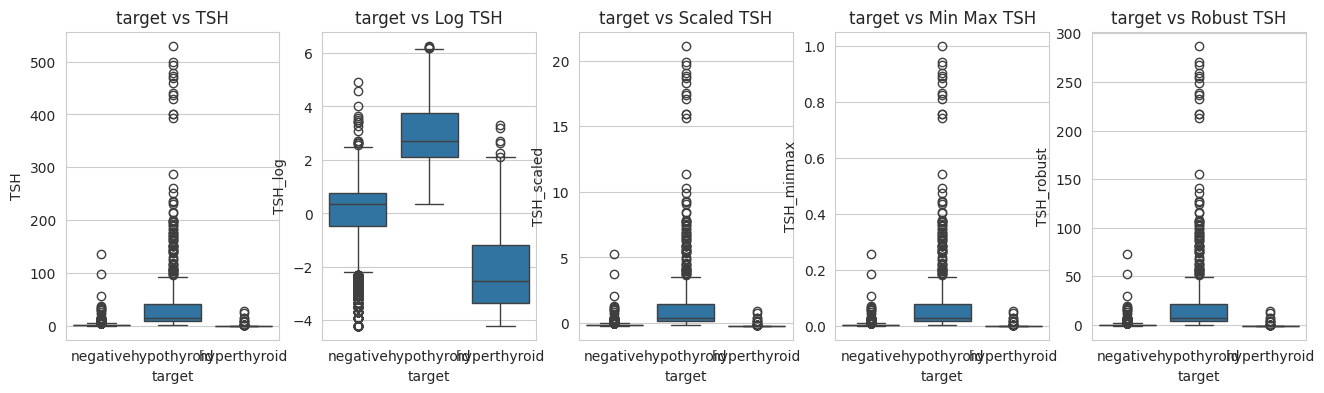

In [43]:
# FOR TSH
import scipy.stats as stats # for implementing skewness and other stats
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

# Calculate skewness using the skew() function
skewness = stats.skew(df_copy['TSH'])

# Calculate kurtosis using the kurtosis() function False Parameter
kurtosis = stats.kurtosis(df_copy['TSH'], fisher=False)

# Print the result
print("TSH Skewness:", skewness)
# Print the result
print("TSH Kurtosis:", kurtosis)

# Scale TSH by log
df_copy2['TSH_log'] = np.log(df_copy2.TSH + 0.01)

# Scale TSH by Standardization
ss = StandardScaler()
df_copy2['TSH_scaled'] = ss.fit_transform(df_copy2['TSH'].values.reshape(-1,1))

#Scale TSH by normalization
mm = MinMaxScaler() 
df_copy2['TSH_minmax'] = mm.fit_transform(df_copy2['TSH'].values.reshape(-1,1))

#Scale TSH by Robust_scaler
rs= RobustScaler()
df_copy2['TSH_robust'] = rs.fit_transform(df_copy2['TSH'].values.reshape(-1,1))


# Calculate skewness using the skew() function
skewness = stats.skew(df_copy2['TSH_log'])

# Calculate kurtosis using the kurtosis() function False Parameter
kurtosis = stats.kurtosis(df_copy2['TSH_log'], fisher=False)

# Print the result
print("\nlogged TSH Skewness:", skewness)
# Print the result
print("logged TSH Kurtosis:", kurtosis)


# Calculate skewness using the skew() function
skewness = stats.skew(df_copy2['TSH_scaled'])

# Calculate kurtosis using the kurtosis() function False Parameter
kurtosis = stats.kurtosis(df_copy2['TSH_scaled'], fisher=False)

# Print the result
print("\nStandardized TSH Skewness:", skewness)
# Print the result
print("Standardized TSH Kurtosis:", kurtosis)


# Calculate skewness using the skew() function
skewness = stats.skew(df_copy2['TSH_minmax'])

# Calculate kurtosis using the kurtosis() function False Parameter
kurtosis = stats.kurtosis(df_copy2['TSH_minmax'], fisher=False)

# Print the result
print("\nNormalized TSH Skewness:", skewness)
# Print the result
print("Normalized TSH Kurtosis:", kurtosis)

# Calculate skewness using the skew() function
skewness = stats.skew(df_copy2['TSH_robust'])

# Calculate kurtosis using the kurtosis() function False Parameter
kurtosis = stats.kurtosis(df_copy2['TSH_robust'], fisher=False)

# Print the result
print("\nRobust Scaled TSH Skewness:", skewness)
# Print the result
print("Robust Scaled TSH Kurtosis:", kurtosis)


# Let's explore the Aby target and see the distribuition of TSH
fig , axs = plt.subplots(nrows = 1 , ncols = 5 , figsize = (16,4))

sns.boxplot(x ="target",y="TSH",data=df_copy2, ax = axs[0])
axs[0].set_title("target vs TSH")

sns.boxplot(x ="target",y="TSH_log",data=df_copy2, ax = axs[1])
axs[1].set_title("target vs Log TSH")

sns.boxplot(x ="target",y="TSH_scaled",data=df_copy2, ax = axs[2])
axs[2].set_title("target vs Scaled TSH")

sns.boxplot(x ="target",y="TSH_minmax",data=df_copy2, ax = axs[3])
axs[3].set_title("target vs Min Max TSH")

sns.boxplot(x ="target",y="TSH_robust",data=df_copy2, ax = axs[4])
axs[4].set_title("target vs Robust TSH")

# fig.suptitle('Amount by Class', fontsize=20)
plt.show()

Skewness: 4.92531995828938
Kurtosis: 72.33477813444367

logged T3 Skewness: -2.073463098936693
logged T3 Kurtosis: 18.669602974810697

Standardized T3 Skewness: 4.925319958289379
Standardized T3 Kurtosis: 72.33477813444365

Normalized T3 Skewness: 4.925319958289383
Normalized T3 Kurtosis: 72.33477813444374

Robust Scaled T3 Skewness: 4.925319958289379
Robust Scaled T3 Kurtosis: 72.33477813444364


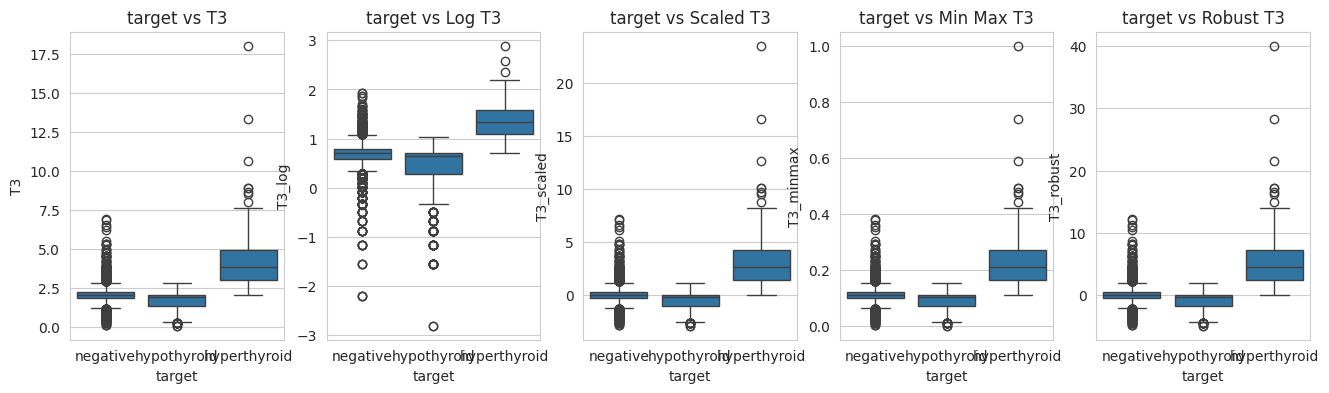

In [44]:
# FOR T3

# Calculate skewness using the skew() function
skewness = stats.skew(df_copy['T3'])

# Calculate kurtosis using the kurtosis() function False Parameter
kurtosis = stats.kurtosis(df_copy['T3'], fisher=False)

# Print the result
print("Skewness:", skewness)
# Print the result
print("Kurtosis:", kurtosis)

# Scale T3 by log
df_copy2['T3_log'] = np.log(df_copy2.T3 + 0.01)

# Scale T3 by Standardization
ss = StandardScaler()
df_copy2['T3_scaled'] = ss.fit_transform(df_copy2['T3'].values.reshape(-1,1))

#Scale T3 by normalization
mm = MinMaxScaler() 
df_copy2['T3_minmax'] = mm.fit_transform(df_copy2['T3'].values.reshape(-1,1))

#Scale T3 by Robust_scaler
rs= RobustScaler()
df_copy2['T3_robust'] = rs.fit_transform(df_copy2['T3'].values.reshape(-1,1))

# Calculate skewness using the skew() function
skewness = stats.skew(df_copy2['T3_log'])

# Calculate kurtosis using the kurtosis() function False Parameter
kurtosis = stats.kurtosis(df_copy2['T3_log'], fisher=False)

# Print the result
print("\nlogged T3 Skewness:", skewness)
# Print the result
print("logged T3 Kurtosis:", kurtosis)


# Calculate skewness using the skew() function
skewness = stats.skew(df_copy2['T3_scaled'])

# Calculate kurtosis using the kurtosis() function False Parameter
kurtosis = stats.kurtosis(df_copy2['T3_scaled'], fisher=False)

# Print the result
print("\nStandardized T3 Skewness:", skewness)
# Print the result
print("Standardized T3 Kurtosis:", kurtosis)


# Calculate skewness using the skew() function
skewness = stats.skew(df_copy2['T3_minmax'])

# Calculate kurtosis using the kurtosis() function False Parameter
kurtosis = stats.kurtosis(df_copy2['T3_minmax'], fisher=False)

# Print the result
print("\nNormalized T3 Skewness:", skewness)
# Print the result
print("Normalized T3 Kurtosis:", kurtosis)

# Calculate skewness using the skew() function
skewness = stats.skew(df_copy2['T3_robust'])

# Calculate kurtosis using the kurtosis() function False Parameter
kurtosis = stats.kurtosis(df_copy2['T3_robust'], fisher=False)

# Print the result
print("\nRobust Scaled T3 Skewness:", skewness)
# Print the result
print("Robust Scaled T3 Kurtosis:", kurtosis)

# Let's explore the Aby target and see the distribuition of T3
fig , axs = plt.subplots(nrows = 1 , ncols = 5 , figsize = (16,4))

sns.boxplot(x ="target",y="T3",data=df_copy2, ax = axs[0])
axs[0].set_title("target vs T3")

sns.boxplot(x ="target",y="T3_log",data=df_copy2, ax = axs[1])
axs[1].set_title("target vs Log T3")

sns.boxplot(x ="target",y="T3_scaled",data=df_copy2, ax = axs[2])
axs[2].set_title("target vs Scaled T3")

sns.boxplot(x ="target",y="T3_minmax",data=df_copy2, ax = axs[3])
axs[3].set_title("target vs Min Max T3")

sns.boxplot(x ="target",y="T3_robust",data=df_copy2, ax = axs[4])
axs[4].set_title("target vs Robust T3")

# fig.suptitle('Amount by Class', fontsize=20)
plt.show()

Skewness: 1.3716773054832827
Kurtosis: 13.544640247762093

logged TT4 Skewness: -3.6657230973129282
logged TT4 Kurtosis: 27.93517986113676

Standardized TT4 Skewness: 1.3716773054832818
Standardized TT4 Kurtosis: 13.544640247762098

Normalized TT4 Skewness: 1.3716773054832823
Normalized TT4 Kurtosis: 13.544640247762095

Robust Scaled TT4 Skewness: 1.3716773054832814
Robust Scaled TT4 Kurtosis: 13.544640247762093


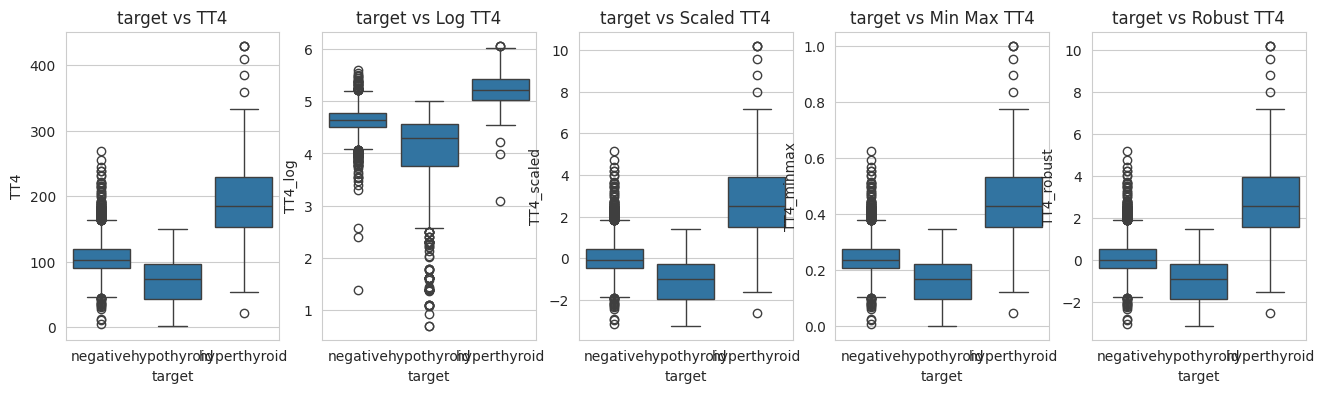

In [45]:
# FOR TT4

# Calculate skewness using the skew() function
skewness = stats.skew(df_copy['TT4'])

# Calculate kurtosis using the kurtosis() function False Parameter
kurtosis = stats.kurtosis(df_copy['TT4'], fisher=False)

# Print the result
print("Skewness:", skewness)
# Print the result
print("Kurtosis:", kurtosis)

# Scale TT4 by log
df_copy2['TT4_log'] = np.log(df_copy2.TT4 + 0.01)

# Scale TT4 by Standardization
ss = StandardScaler()
df_copy2['TT4_scaled'] = ss.fit_transform(df_copy2['TT4'].values.reshape(-1,1))

#Scale TT4 by normalization
mm = MinMaxScaler() 
df_copy2['TT4_minmax'] = mm.fit_transform(df_copy2['TT4'].values.reshape(-1,1))

#Scale TT4 by Robust_scaler
rs= RobustScaler()
df_copy2['TT4_robust'] = rs.fit_transform(df_copy2['TT4'].values.reshape(-1,1))

# Calculate skewness using the skew() function
skewness = stats.skew(df_copy2['TT4_log'])

# Calculate kurtosis using the kurtosis() function False Parameter
kurtosis = stats.kurtosis(df_copy2['TT4_log'], fisher=False)

# Print the result
print("\nlogged TT4 Skewness:", skewness)
# Print the result
print("logged TT4 Kurtosis:", kurtosis)


# Calculate skewness using the skew() function
skewness = stats.skew(df_copy2['TT4_scaled'])

# Calculate kurtosis using the kurtosis() function False Parameter
kurtosis = stats.kurtosis(df_copy2['TT4_scaled'], fisher=False)

# Print the result
print("\nStandardized TT4 Skewness:", skewness)
# Print the result
print("Standardized TT4 Kurtosis:", kurtosis)


# Calculate skewness using the skew() function
skewness = stats.skew(df_copy2['TT4_minmax'])

# Calculate kurtosis using the kurtosis() function False Parameter
kurtosis = stats.kurtosis(df_copy2['TT4_minmax'], fisher=False)

# Print the result
print("\nNormalized TT4 Skewness:", skewness)
# Print the result
print("Normalized TT4 Kurtosis:", kurtosis)

# Calculate skewness using the skew() function
skewness = stats.skew(df_copy2['TT4_robust'])

# Calculate kurtosis using the kurtosis() function False Parameter
kurtosis = stats.kurtosis(df_copy2['TT4_robust'], fisher=False)

# Print the result
print("\nRobust Scaled TT4 Skewness:", skewness)
# Print the result
print("Robust Scaled TT4 Kurtosis:", kurtosis)


# Let's explore the Aby target and see the distribuition of TT4
fig , axs = plt.subplots(nrows = 1 , ncols = 5 , figsize = (16,4))

sns.boxplot(x ="target",y="TT4",data=df_copy2, ax = axs[0])
axs[0].set_title("target vs TT4")

sns.boxplot(x ="target",y="TT4_log",data=df_copy2, ax = axs[1])
axs[1].set_title("target vs Log TT4")

sns.boxplot(x ="target",y="TT4_scaled",data=df_copy2, ax = axs[2])
axs[2].set_title("target vs Scaled TT4")

sns.boxplot(x ="target",y="TT4_minmax",data=df_copy2, ax = axs[3])
axs[3].set_title("target vs Min Max TT4")

sns.boxplot(x ="target",y="TT4_robust",data=df_copy2, ax = axs[4])
axs[4].set_title("target vs Robust TT4")

# fig.suptitle('Amount by Class', fontsize=20)
plt.show()

Skewness: 0.5719989941436088
Kurtosis: 6.194501933691966

logged T4U Skewness: -0.7359850568228499
logged T4U Kurtosis: 8.642050080529682

Standardized T4U Skewness: 0.571998994143609
Standardized T4U Kurtosis: 6.194501933691969

Normalized T4U Skewness: 0.5719989941436079
Normalized T4U Kurtosis: 6.194501933691969

Robust Scaled T4U Skewness: 0.5719989941436087
Robust Scaled T4U Kurtosis: 6.194501933691969


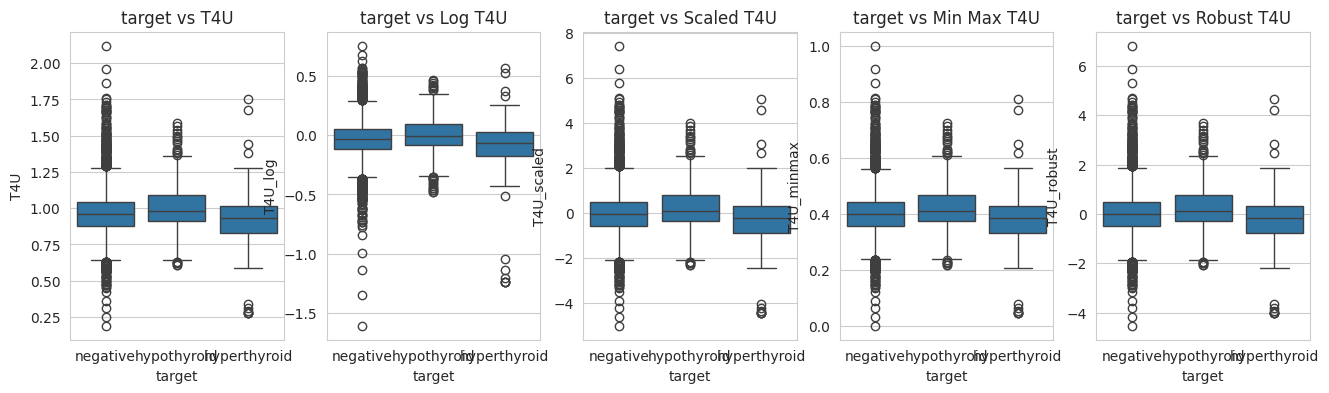

In [46]:
# for T4U

# Calculate skewness using the skew() function
skewness = stats.skew(df_copy['T4U'])

# Calculate kurtosis using the kurtosis() function False Parameter
kurtosis = stats.kurtosis(df_copy['T4U'], fisher=False)

# Print the result
print("Skewness:", skewness)
# Print the result
print("Kurtosis:", kurtosis)

# Scale T4U by log
df_copy2['T4U_log'] = np.log(df_copy2.T4U + 0.01)

# Scale T4U by Standardization
ss = StandardScaler()
df_copy2['T4U_scaled'] = ss.fit_transform(df_copy2['T4U'].values.reshape(-1,1))

#Scale T4U by normalization
mm = MinMaxScaler() 
df_copy2['T4U_minmax'] = mm.fit_transform(df_copy2['T4U'].values.reshape(-1,1))

#Scale T4U by Robust_scaler
rs= RobustScaler()
df_copy2['T4U_robust'] = rs.fit_transform(df_copy2['T4U'].values.reshape(-1,1))

# Calculate skewness using the skew() function
skewness = stats.skew(df_copy2['T4U_log'])

# Calculate kurtosis using the kurtosis() function False Parameter
kurtosis = stats.kurtosis(df_copy2['T4U_log'], fisher=False)

# Print the result
print("\nlogged T4U Skewness:", skewness)
# Print the result
print("logged T4U Kurtosis:", kurtosis)


# Calculate skewness using the skew() function
skewness = stats.skew(df_copy2['T4U_scaled'])

# Calculate kurtosis using the kurtosis() function False Parameter
kurtosis = stats.kurtosis(df_copy2['T4U_scaled'], fisher=False)

# Print the result
print("\nStandardized T4U Skewness:", skewness)
# Print the result
print("Standardized T4U Kurtosis:", kurtosis)


# Calculate skewness using the skew() function
skewness = stats.skew(df_copy2['T4U_minmax'])

# Calculate kurtosis using the kurtosis() function False Parameter
kurtosis = stats.kurtosis(df_copy2['T4U_minmax'], fisher=False)

# Print the result
print("\nNormalized T4U Skewness:", skewness)
# Print the result
print("Normalized T4U Kurtosis:", kurtosis)

# Calculate skewness using the skew() function
skewness = stats.skew(df_copy2['T4U_robust'])

# Calculate kurtosis using the kurtosis() function False Parameter
kurtosis = stats.kurtosis(df_copy2['T4U_robust'], fisher=False)

# Print the result
print("\nRobust Scaled T4U Skewness:", skewness)
# Print the result
print("Robust Scaled T4U Kurtosis:", kurtosis)


# Let's explore the Aby target and see the distribuition of T4U
fig , axs = plt.subplots(nrows = 1 , ncols = 5 , figsize = (16,4))

sns.boxplot(x ="target",y="T4U",data=df_copy2, ax = axs[0])
axs[0].set_title("target vs T4U")

sns.boxplot(x ="target",y="T4U_log",data=df_copy2, ax = axs[1])
axs[1].set_title("target vs Log T4U")

sns.boxplot(x ="target",y="T4U_scaled",data=df_copy2, ax = axs[2])
axs[2].set_title("target vs Scaled T4U")

sns.boxplot(x ="target",y="T4U_minmax",data=df_copy2, ax = axs[3])
axs[3].set_title("target vs Min Max T4U")

sns.boxplot(x ="target",y="T4U_robust",data=df_copy2, ax = axs[4])
axs[4].set_title("target vs Robust T4U")

# fig.suptitle('Amount by Class', fontsize=20)
plt.show()

Skewness: 3.9765680323562242
Kurtosis: 56.2343498832122

logged FTI Skewness: -4.09392749444094
logged FTI Kurtosis: 33.80936155116933

Standardized FTI Skewness: 3.976568032356225
Standardized FTI Kurtosis: 56.23434988321221

Normalized FTI Skewness: 3.9765680323562234
Normalized FTI Kurtosis: 56.23434988321218

Robust Scaled FTI Skewness: 3.9765680323562247
Robust Scaled FTI Kurtosis: 56.2343498832122


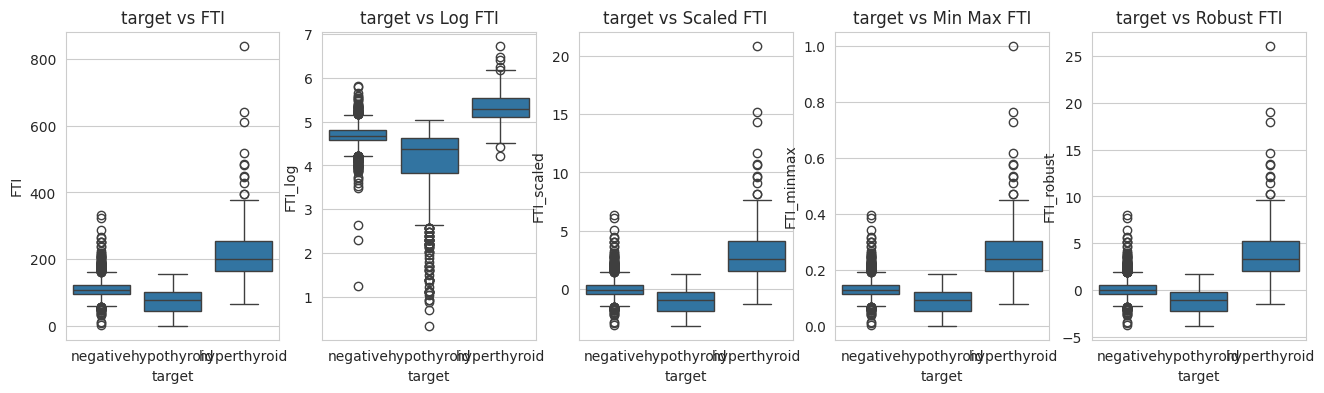

In [47]:
# For FTI

# Calculate skewness using the skew() function
skewness = stats.skew(df_copy['FTI'])

# Calculate kurtosis using the kurtosis() function False Parameter
kurtosis = stats.kurtosis(df_copy['FTI'], fisher=False)

# Print the result
print("Skewness:", skewness)
# Print the result
print("Kurtosis:", kurtosis)

# Scale FTI by log
df_copy2['FTI_log'] = np.log(df_copy2.FTI + 0.01)

# Scale FTI by Standardization
ss = StandardScaler()
df_copy2['FTI_scaled'] = ss.fit_transform(df_copy2['FTI'].values.reshape(-1,1))

#Scale FTI by normalization
mm = MinMaxScaler() 
df_copy2['FTI_minmax'] = mm.fit_transform(df_copy2['FTI'].values.reshape(-1,1))

#Scale FTI by Robust_scaler
rs= RobustScaler()
df_copy2['FTI_robust'] = rs.fit_transform(df_copy2['FTI'].values.reshape(-1,1))

# Calculate skewness using the skew() function
skewness = stats.skew(df_copy2['FTI_log'])

# Calculate kurtosis using the kurtosis() function False Parameter
kurtosis = stats.kurtosis(df_copy2['FTI_log'], fisher=False)

# Print the result
print("\nlogged FTI Skewness:", skewness)
# Print the result
print("logged FTI Kurtosis:", kurtosis)


# Calculate skewness using the skew() function
skewness = stats.skew(df_copy2['FTI_scaled'])

# Calculate kurtosis using the kurtosis() function False Parameter
kurtosis = stats.kurtosis(df_copy2['FTI_scaled'], fisher=False)

# Print the result
print("\nStandardized FTI Skewness:", skewness)
# Print the result
print("Standardized FTI Kurtosis:", kurtosis)


# Calculate skewness using the skew() function
skewness = stats.skew(df_copy2['FTI_minmax'])

# Calculate kurtosis using the kurtosis() function False Parameter
kurtosis = stats.kurtosis(df_copy2['FTI_minmax'], fisher=False)

# Print the result
print("\nNormalized FTI Skewness:", skewness)
# Print the result
print("Normalized FTI Kurtosis:", kurtosis)

# Calculate skewness using the skew() function
skewness = stats.skew(df_copy2['FTI_robust'])

# Calculate kurtosis using the kurtosis() function False Parameter
kurtosis = stats.kurtosis(df_copy2['FTI_robust'], fisher=False)

# Print the result
print("\nRobust Scaled FTI Skewness:", skewness)
# Print the result
print("Robust Scaled FTI Kurtosis:", kurtosis)


# Let's explore the Aby target and see the distribuition of FTI
fig , axs = plt.subplots(nrows = 1 , ncols = 5 , figsize = (16,4))

sns.boxplot(x ="target",y="FTI",data=df_copy2, ax = axs[0])
axs[0].set_title("target vs FTI")

sns.boxplot(x ="target",y="FTI_log",data=df_copy2, ax = axs[1])
axs[1].set_title("target vs Log FTI")

sns.boxplot(x ="target",y="FTI_scaled",data=df_copy2, ax = axs[2])
axs[2].set_title("target vs Scaled FTI")

sns.boxplot(x ="target",y="FTI_minmax",data=df_copy2, ax = axs[3])
axs[3].set_title("target vs Min Max FTI")

sns.boxplot(x ="target",y="FTI_robust",data=df_copy2, ax = axs[4])
axs[4].set_title("target vs Robust FTI")

# fig.suptitle('Amount by Class', fontsize=20)
plt.show()

# Data Preprocessing

In [48]:
# train_test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# one-hot encoding
X_train = pd.get_dummies(X_train, columns=['sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'lithium', 'goitre', 'tumor', 'hypopituitary',
       'psych'])
X_test = pd.get_dummies(X_test, columns=['sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'lithium', 'goitre', 'tumor', 'hypopituitary',
       'psych'])

feature_names = X_train.columns

# feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# training multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='saga', penalty='l1', max_iter=5000)
model.fit(X_train, y_train)

# Use L1 regularization for feature selection
selector = SelectFromModel(estimator=model, threshold='median')
selector.fit(X_train, y_train)

# Get the selected feature indices
selected_feature_indices = selector.get_support()

# Get the selected feature names using the original feature names
selected_features = [feature_names[i] for i, selected in enumerate(selected_feature_indices) if selected]

# Transform the data to keep only selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# model evaluation
selected_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=5000)
selected_model.fit(X_train_selected, y_train)

accuracy = selected_model.score(X_test_selected, y_test)
print(f"Accuracy on the test set with selected features: {accuracy:.2f}")



/home/angel-tamang/myenv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/home/angel-tamang/myenv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy on the test set with selected features: 0.96


/home/angel-tamang/myenv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


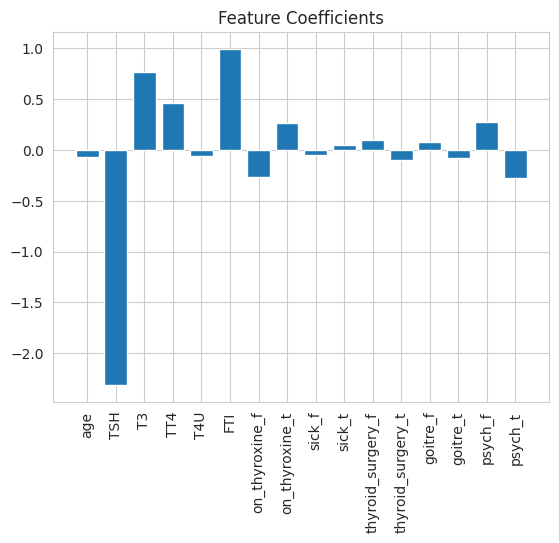

In [49]:
#visualizing features correlation
coef = selected_model.coef_
plt.bar(range(len(selected_features)), coef[0])
plt.xticks(range(len(selected_features)), selected_features, rotation=90)
plt.title("Feature Coefficients")
plt.show()



In [50]:
category_counts = df_copy['on_thyroxine'].value_counts()
print("Number of instances for each unique category:\n", category_counts)

category_counts = df_copy['sick'].value_counts()
print("Number of instances for each unique category:\n", category_counts)

category_counts = df_copy['thyroid_surgery'].value_counts()
print("Number of instances for each unique category:\n", category_counts)

category_counts = df_copy['goitre'].value_counts()
print("Number of instances for each unique category:\n", category_counts)

category_counts = df_copy['psych'].value_counts()
print("Number of instances for each unique category:\n", category_counts)

category_counts = df_copy['sex'].value_counts()
print("Number of instances for each unique category:\n", category_counts)



Number of instances for each unique category:
 on_thyroxine
f    6695
t     847
Name: count, dtype: int64
Number of instances for each unique category:
 sick
f    7262
t     280
Name: count, dtype: int64
Number of instances for each unique category:
 thyroid_surgery
f    7436
t     106
Name: count, dtype: int64
Number of instances for each unique category:
 goitre
f    7468
t      74
Name: count, dtype: int64
Number of instances for each unique category:
 psych
f    7165
t     377
Name: count, dtype: int64
Number of instances for each unique category:
 sex
F    5148
M    2394
Name: count, dtype: int64


In [51]:
df_copy.drop(['query_on_thyroxine',
       'on_antithyroid_meds', 'pregnant','lithium', 'I131_treatment', 'tumor', 'hypopituitary'], axis=1, inplace=True)

In [52]:
df_copy.columns

Index(['age', 'sex', 'on_thyroxine', 'sick', 'thyroid_surgery', 'goitre',
       'psych', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'target'],
      dtype='object')

In [53]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7542 entries, 0 to 9171
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              7542 non-null   float64
 1   sex              7542 non-null   object 
 2   on_thyroxine     7542 non-null   object 
 3   sick             7542 non-null   object 
 4   thyroid_surgery  7542 non-null   object 
 5   goitre           7542 non-null   object 
 6   psych            7542 non-null   object 
 7   TSH              7542 non-null   float64
 8   T3               7542 non-null   float64
 9   TT4              7542 non-null   float64
 10  T4U              7542 non-null   float64
 11  FTI              7542 non-null   float64
 12  target           7542 non-null   object 
dtypes: float64(6), object(7)
memory usage: 824.9+ KB


# Training Model

In [54]:
#training decision tree model
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Initialize the label encoder
label_encoder = LabelEncoder()

X = df_copy.drop('target', axis=1)
# Encode the target variable 'target'
y = label_encoder.fit_transform(df_copy['target'])

#one-hot encoding
X = pd.get_dummies(X, columns=['sex','thyroid_surgery', 'on_thyroxine', 'sick', 'goitre','psych'])

# train_test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#training model
clf = DecisionTreeClassifier(criterion='gini')
clf.fit(X_train, y_train)

# function to evaluate model and returns target predictions 
def make_scores(model, features, target):
    model_pred = model.predict(features)

    print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(model_pred , target))) 

    roc_auc = metrics.roc_auc_score(target , model.predict_proba(features), multi_class='ovr')
    print('AUC : {0:0.5f}'.format(roc_auc))

    print('Precision : {0:0.5f}'.format(metrics.precision_score(target , model_pred, average='macro')))
    print('Recall : {0:0.5f}'.format(metrics.recall_score(target , model_pred, average='macro')))
    print('F1 : {0:0.5f}'.format(metrics.f1_score(target , model_pred, average='macro')))
    print(classification_report(target, model_pred))
    
    return model_pred

#Scores of raw DT
clf_pred=make_scores(clf, X_test, y_test)
    


Accuracy :0.98453
AUC : 0.93808
Precision : 0.88775
Recall : 0.90247
F1 : 0.89499
              precision    recall  f1-score   support

           0       0.70      0.73      0.71        48
           1       0.97      0.99      0.98       167
           2       0.99      0.99      0.99      2048

    accuracy                           0.98      2263
   macro avg       0.89      0.90      0.89      2263
weighted avg       0.98      0.98      0.98      2263



In [55]:
# Predict from Train set
make_scores(clf, X_train, y_train)

Accuracy :1.00000
AUC : 1.00000
Precision : 1.00000
Recall : 1.00000
F1 : 1.00000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       134
           1       1.00      1.00      1.00       426
           2       1.00      1.00      1.00      4719

    accuracy                           1.00      5279
   macro avg       1.00      1.00      1.00      5279
weighted avg       1.00      1.00      1.00      5279



array([2, 2, 2, ..., 1, 2, 2])

Training scores:
 [2.22044605e-16 2.22044605e-16 2.22044605e-16 2.22044605e-16
 2.22044605e-16 2.22044605e-16 2.22044605e-16 2.22044605e-16
 2.22044605e-16 2.22044605e-16]

Testing scores:
 [0.92185539 0.80570222 0.68965905 0.62820806 0.65550739 0.6623856
 0.53264424 0.73748949 0.64184802 0.71697779]


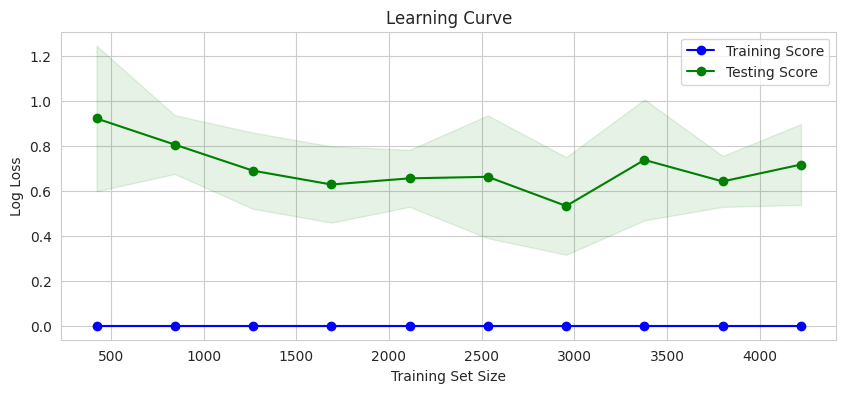

In [57]:
from sklearn.model_selection import learning_curve
from sklearn.metrics import make_scorer, log_loss
from sklearn.model_selection import KFold

#making function for learning curve


def make_learning_curve(model, features, target):
    # Define your training sizes
    train_sizes = np.linspace(0.1, 1.0, 10)
    cv = KFold(n_splits=5, shuffle=True, random_state=42)

    # Calculate the learning curve. Here we use 'neg_log_loss' which is the negative log loss for scoring.
    train_sizes, train_scores, test_scores = learning_curve(
        model, features, target, cv=cv, n_jobs=-1, train_sizes=train_sizes, scoring='neg_log_loss', random_state=42 
    )

    # Convert negative log loss scores to positive
    train_scores = -train_scores
    test_scores = -test_scores

    # Calculate the mean and standard deviation of the training and test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Training and testing scores
    print("Training scores:\n", train_scores_mean)
    print("\nTesting scores:\n", test_scores_mean)


    plt.figure(figsize=(10, 4))
    

    plt.plot(train_sizes, train_scores_mean, label='Training Score', color='blue', marker='o')
    plt.plot(train_sizes, test_scores_mean, label='Testing Score', color='green', marker='o')

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='green')

    plt.title('Learning Curve')
    plt.xlabel('Training Set Size')
    plt.ylabel('Log Loss')
    plt.legend(loc='best')
    plt.show()

#learning curve of raw DT
make_learning_curve(clf, X_train, y_train)

In [58]:
from sklearn.model_selection import cross_val_score

# Get the cost complexity pruning path
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Perform 5-fold cross-validation for each alpha value in the pruning path to find the optimal ccp_alpha
cv_scores = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion='gini', ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='neg_log_loss')
    cv_scores.append(np.mean(scores))

# Find the alpha value that maximizes the average log loss
optimal_alpha = ccp_alphas[np.argmax(cv_scores)]

# Train a final decision tree with the optimal ccp_alpha
clf_pruned = DecisionTreeClassifier(criterion='gini', random_state=42, ccp_alpha=optimal_alpha)
clf_pruned.fit(X_train, y_train)

# Evaluate the pruned tree on the test set
test_score = log_loss(y_test, clf_pruned.predict_proba(X_test))

print(f"Optimal ccp_alpha: {optimal_alpha}")
print(f"Test log loss with pruning: {test_score}")


Optimal ccp_alpha: 0.001262865441687188
Test log loss with pruning: 0.0375430253591432


In [59]:
# Predict from Test set
make_scores(clf_pruned, X_test, y_test)

Accuracy :0.98807
AUC : 0.99722
Precision : 0.90499
Recall : 0.95492
F1 : 0.92851
              precision    recall  f1-score   support

           0       0.76      0.88      0.82        48
           1       0.95      1.00      0.98       167
           2       1.00      0.99      0.99      2048

    accuracy                           0.99      2263
   macro avg       0.90      0.95      0.93      2263
weighted avg       0.99      0.99      0.99      2263



array([2, 0, 2, ..., 2, 2, 2])

Training scores:
 [2.22044605e-16 1.33202268e-02 2.04681944e-02 3.09116124e-02
 3.68917102e-02 3.63459037e-02 3.85076207e-02 4.52506655e-02
 5.49029791e-02 5.11519212e-02]

Testing scores:
 [0.93550829 0.5716603  0.40483312 0.18620364 0.10628156 0.1243263
 0.12000057 0.11901638 0.09162545 0.09759137]


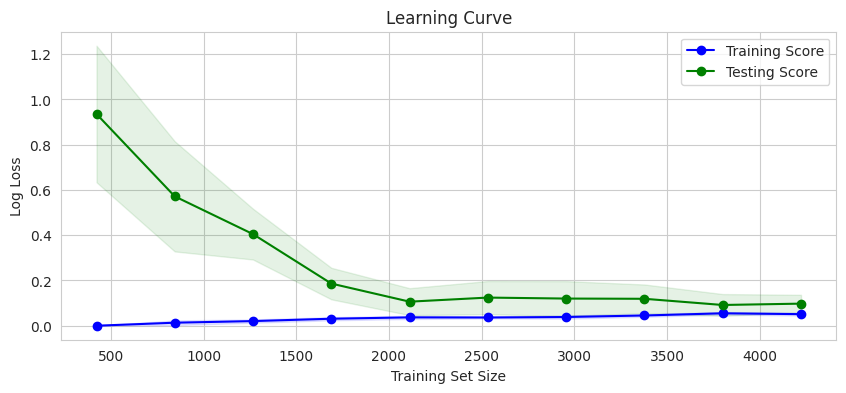

In [60]:
#learning curve for pruned raw DT
make_learning_curve(clf_pruned, X_train, y_train)

In [61]:
from sklearn.metrics import roc_auc_score, roc_curve

#function for roc curve
def make_ROC_curve(model, features, target):
    model_proba = model.predict_proba(features)

    plt.figure(figsize=(12, 5))
    classes = model.classes_
    roc_auc_ovr = {}

    # Variables for calculating the average ROC
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)

    for i in range(len(classes)):
        c = classes[i]
        df_aux = pd.DataFrame(features, columns=[f'feature_{j}' for j in range(features.shape[1])])
        df_aux['class'] = [1 if y == c else 0 for y in target.astype(int)]
        df_aux['prob'] = model_proba[:, i]

        # ROC Curve computation
        fpr, tpr, _ = roc_curve(df_aux['class'], df_aux['prob'])
        roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])

        # Interpolating all ROC curves at this points
        mean_tpr += np.interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0

        # Plotting each ROC curve
        plt.plot(fpr, tpr, lw=1, label=f'ROC curve for class {c} (area = {roc_auc_ovr[c]:.2f})')

    # Finishing the average ROC Curve
    mean_tpr /= len(classes)
    mean_tpr[-1] = 1.0
    mean_auc = roc_auc_score(target, model_proba, multi_class='ovr')

    plt.plot(mean_fpr, mean_tpr, color='blue', linestyle='--',
             label='Mean ROC (area = {:.2f})'.format(mean_auc), lw=2)

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()



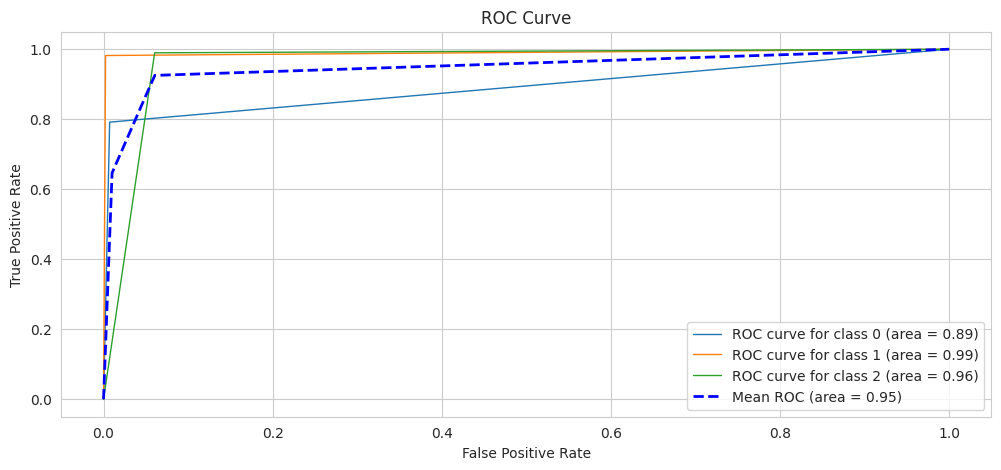

In [62]:
#training model
clf = DecisionTreeClassifier(criterion='gini')
clf.fit(X_train, y_train)

#roc for raw DT
make_ROC_curve(clf, X_test, y_test)

## Class-Specific Interpretation:

- Class 0 ('hyperthyroid'): The AUC is 0.87, which is good. The curve is closer to the top-left corner, indicating a high true positive rate and a low false positive rate.
- Class 1 ('hypothyroid'): The AUC is 1.00, which is perfect. This suggests that the model has excellent performance in distinguishing this class from the rest.
- Class 2 ('negative'): The AUC is 0.97, which is also excellent. Like Class 1, the model is very effective at identifying this class.
- Mean ROC: The dashed line represents the mean ROC curve, which is an average of the individual ROC curves. The mean AUC is 0.95, which indicates that, on average, the model has excellent performance across all classes.

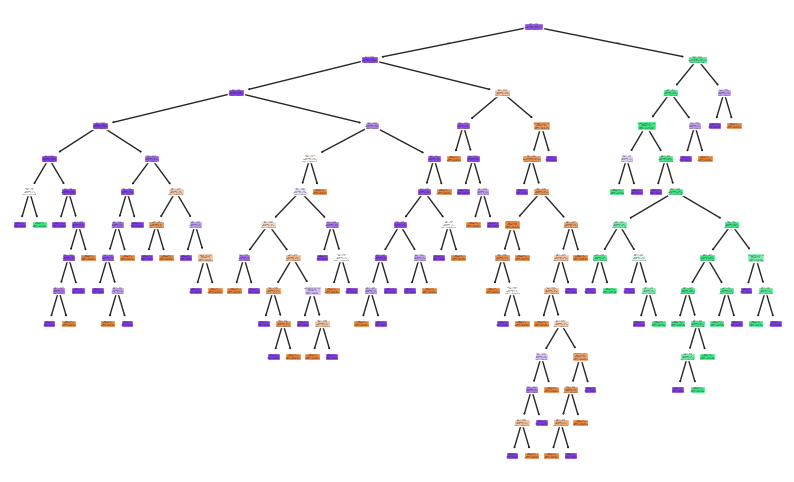

In [63]:
#plot Decision tree
from sklearn.tree import plot_tree

plt.figure(figsize=(10,6))
plot_tree(clf,
          feature_names=X.columns, 
          class_names=['hyperthyroid','hypothyroid','negative'], 
          filled=True)
plt.show()

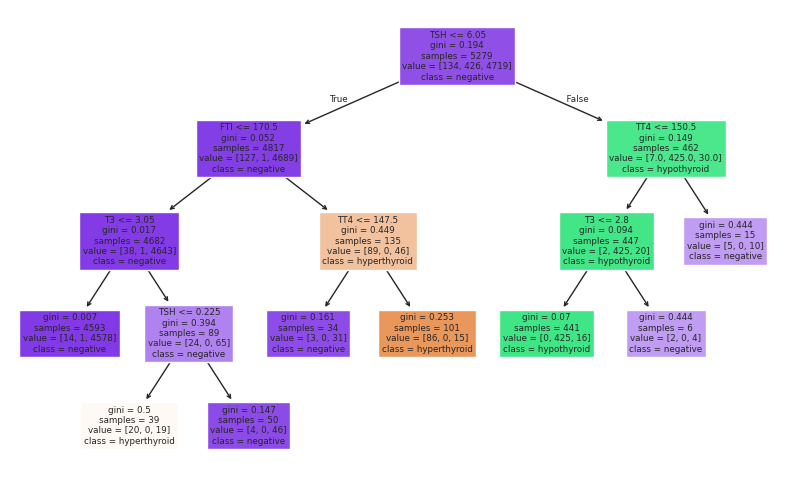

In [64]:
#plot Decision tree
from sklearn.tree import plot_tree

plt.figure(figsize=(10,6))
plot_tree(clf_pruned,
          feature_names=X.columns, 
          class_names=['hyperthyroid','hypothyroid','negative'], 
          filled=True)
plt.show()

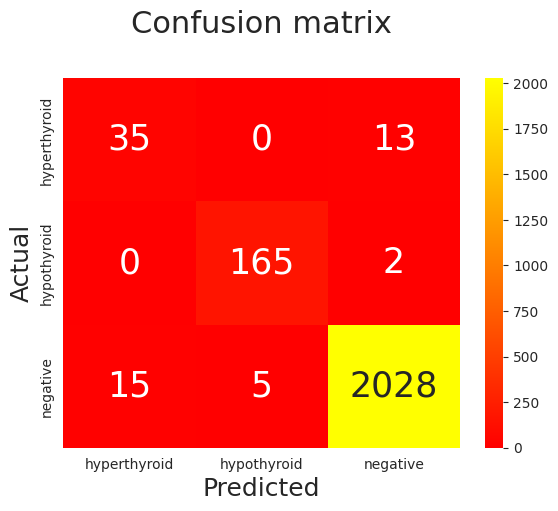

In [65]:
# Heatmap for Confusion Matrix
def make_confusion_matrix(target, prediction):
    cnf_matrix = metrics.confusion_matrix(target,prediction)
    cnf_matrix_df = pd.DataFrame(cnf_matrix,
                         index = ['hyperthyroid','hypothyroid','negative'], 
                         columns = ['hyperthyroid','hypothyroid','negative'])
    p = sns.heatmap(cnf_matrix_df, annot=True, annot_kws={"size": 25}, cmap="autumn" ,fmt='g')

    plt.title('Confusion matrix', y=1.1, fontsize = 22)
    plt.ylabel('Actual',fontsize = 18)
    plt.xlabel('Predicted',fontsize = 18)
    plt.show()
    
#for raw_DT
make_confusion_matrix(y_test, clf_pred)

False Positive Rate(FPR) is dependent on True Negative(TN) i.e. FP/(FP+TN). The TN value, for instance, for hyperthyroid  will be 2,205(166+1+3+2035). Compared to 10+0=10(FP) the TN value is very high, consequently the low FPR. Due to which the ROC curve is pushed to left side, and ROC AUC value to be close to 1, which is misleading

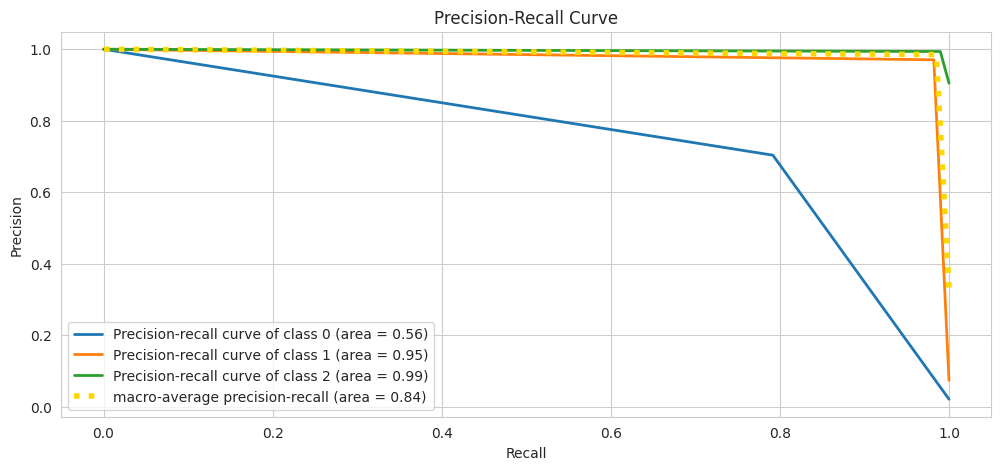

In [66]:

from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize

def make_PR_curve(model, features, target):
    # Binarize the labels for all classes
    target_binarized = label_binarize(target, classes=[0, 1, 2])  

    class_names = ['hyperthyroid', 'hypothyroid', 'Negative'] 

    y_proba = model.predict_proba(features)

    # Calculate precision and recall for each class
    precision = dict()
    recall = dict()
    average_precision = dict()

    # Plot precision-recall curve for each class
    plt.figure(figsize=(12, 5))

    for i in range(y_proba.shape[1]):
        precision[i], recall[i], _ = precision_recall_curve(target_binarized[:, i], y_proba[:, i])
        average_precision[i] = average_precision_score(target_binarized[:, i], y_proba[:, i])

        plt.plot(recall[i], precision[i], lw=2, label=f'Precision-recall curve of class {i} (area = {average_precision[i]:0.2f})')

    # Plot the macro-average Precision-Recall curve
    precision["macro"], recall["macro"], _ = precision_recall_curve(target_binarized.ravel(), y_proba.ravel())
    average_precision["macro"] = average_precision_score(target_binarized, y_proba, average="macro")

    plt.plot(recall["macro"], precision["macro"], color='gold', linestyle=':', linewidth=4, label=f'macro-average precision-recall (area = {average_precision["macro"]:0.2f})')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")

    plt.show()

make_PR_curve(clf, X_test, y_test)

In [67]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

print('Original dataset shape %s' % Counter(y_train))

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_ros))

Original dataset shape Counter({2: 4719, 1: 426, 0: 134})
Resampled dataset shape Counter({2: 4719, 1: 4719, 0: 4719})


In [68]:
# Random oversampling with Decision Tree
clf_ros = DecisionTreeClassifier(criterion='gini')
clf_ros.fit(X_train_ros, y_train_ros)

clf_ros_pred= make_scores(clf_ros, X_test, y_test)

Accuracy :0.98939
AUC : 0.95617
Precision : 0.93167
Recall : 0.93139
F1 : 0.93147
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        48
           1       0.97      0.99      0.98       167
           2       0.99      0.99      0.99      2048

    accuracy                           0.99      2263
   macro avg       0.93      0.93      0.93      2263
weighted avg       0.99      0.99      0.99      2263



Training scores:
 [2.22044605e-16 2.22044605e-16 2.22044605e-16 2.22044605e-16
 2.22044605e-16 2.22044605e-16 2.22044605e-16 2.22044605e-16
 2.22044605e-16 2.22044605e-16]

Testing scores:
 [2.76752181 2.39576659 1.22975274 0.31824761 0.2215113  0.17823135
 0.2215104  0.10947618 0.10183981 0.11202433]


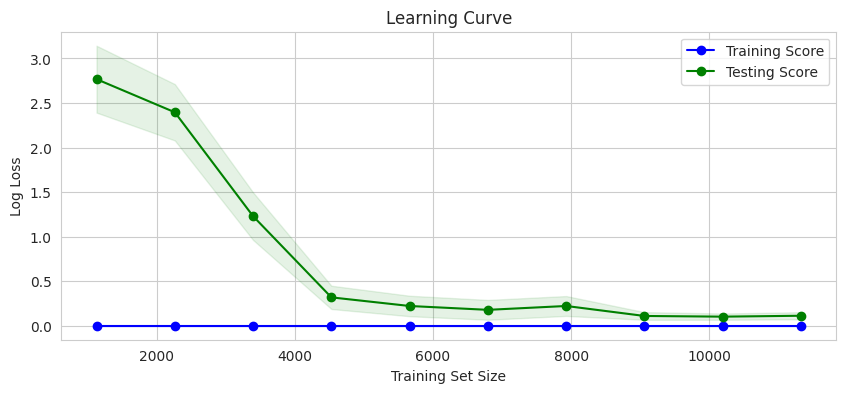

In [69]:
#learning curve for ROS DT
make_learning_curve(clf_ros, X_train_ros, y_train_ros)

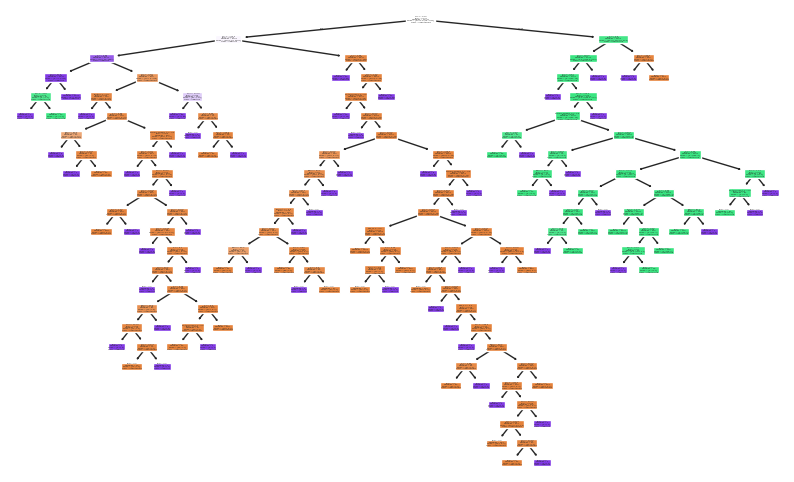

In [70]:
#plot Decision tree
from sklearn.tree import plot_tree

plt.figure(figsize=(10,6))
plot_tree(clf_ros,
          feature_names=X.columns, 
          class_names=['hyperthyroid','hypothyroid','negative'], 
          filled=True)
plt.show()

In [71]:
clf.get_depth()

13

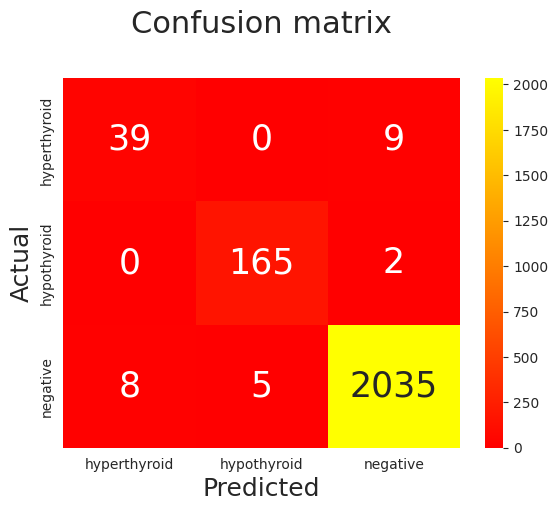

In [72]:
# confusion matrix for ROS DT
make_confusion_matrix(y_test, clf_ros_pred)

In [73]:
from imblearn.over_sampling import SMOTE, ADASYN

print('Original dataset shape %s' % Counter(y_train))

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_smote))


Original dataset shape Counter({2: 4719, 1: 426, 0: 134})
Resampled dataset shape Counter({2: 4719, 1: 4719, 0: 4719})


In [74]:
# SMOTE Sampling with Decision Tree
clf_smote = DecisionTreeClassifier(criterion='gini')
clf_smote.fit(X_train_smote, y_train_smote)

clf_smote_pred =make_scores(clf_smote, X_test, y_test)

Accuracy :0.98409
AUC : 0.95591
Precision : 0.87195
Recall : 0.93127
F1 : 0.89855
              precision    recall  f1-score   support

           0       0.65      0.81      0.72        48
           1       0.97      0.99      0.98       167
           2       1.00      0.99      0.99      2048

    accuracy                           0.98      2263
   macro avg       0.87      0.93      0.90      2263
weighted avg       0.99      0.98      0.98      2263



Training scores:
 [2.22044605e-16 2.22044605e-16 2.22044605e-16 2.22044605e-16
 2.22044605e-16 2.22044605e-16 2.22044605e-16 2.22044605e-16
 2.22044605e-16 2.22044605e-16]

Testing scores:
 [2.9711322  2.59182782 2.26600139 0.96749078 0.42773997 0.3182521
 0.27242311 0.25968864 0.26223589 0.26477775]


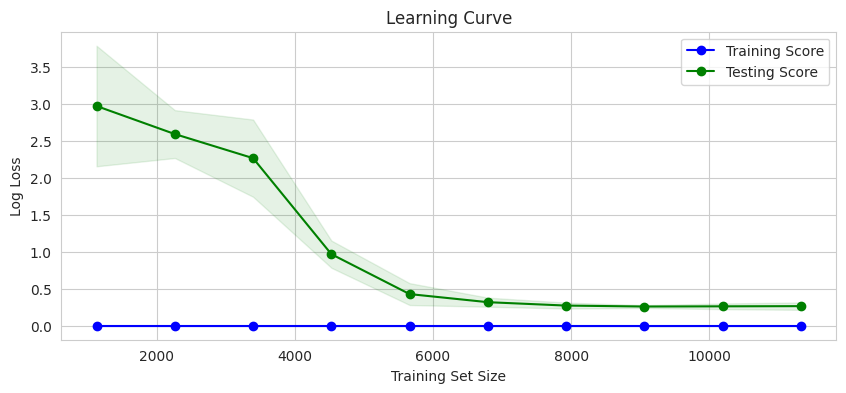

In [75]:
#learning curve for smote DT
make_learning_curve(clf_smote, X_train_smote, y_train_smote)

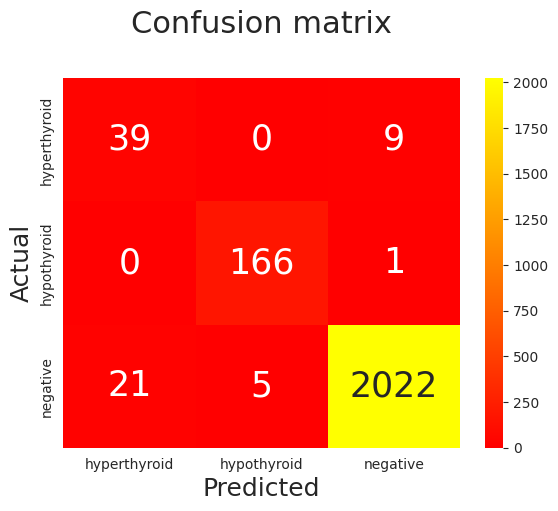

In [76]:
#Confusion Matrix for Smote DT
make_confusion_matrix(y_test, clf_smote_pred)

In [77]:
print('Original dataset shape %s' % Counter(y_train))

adasyn = ADASYN(random_state=42)

X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train, y_train)
print('Resampled dataset shape %s' % Counter(y_train_adasyn))

Original dataset shape Counter({2: 4719, 1: 426, 0: 134})
Resampled dataset shape Counter({2: 4719, 1: 4698, 0: 4694})


In [78]:
# ADASYN Sampling with Decision Tree
clf_adasyn = DecisionTreeClassifier(criterion='gini')
clf_adasyn.fit(X_train_adasyn, y_train_adasyn)

clf_adasyn_pred =make_scores(clf_adasyn, X_test, y_test)

Accuracy :0.98409
AUC : 0.96000
Precision : 0.87050
Recall : 0.93805
F1 : 0.90023
              precision    recall  f1-score   support

           0       0.65      0.83      0.73        48
           1       0.97      0.99      0.98       167
           2       1.00      0.99      0.99      2048

    accuracy                           0.98      2263
   macro avg       0.87      0.94      0.90      2263
weighted avg       0.99      0.98      0.98      2263



Training scores:
 [2.22044605e-16 2.22044605e-16 2.22044605e-16 2.22044605e-16
 2.22044605e-16 2.22044605e-16 2.22044605e-16 2.22044605e-16
 2.22044605e-16 2.22044605e-16]

Testing scores:
 [4.31174972 3.93877635 3.31550417 2.20440945 0.86079862 0.54917429
 0.33972085 0.33716728 0.25797581 0.25542496]


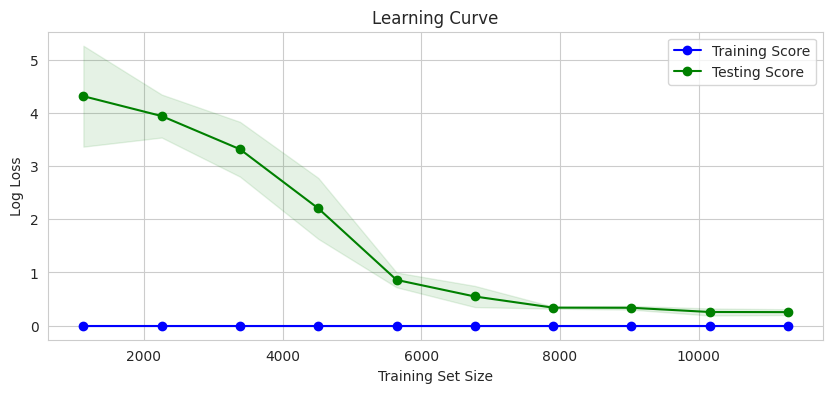

In [79]:
#learning curve for adasyn DT
make_learning_curve(clf_adasyn, X_train_adasyn, y_train_adasyn)

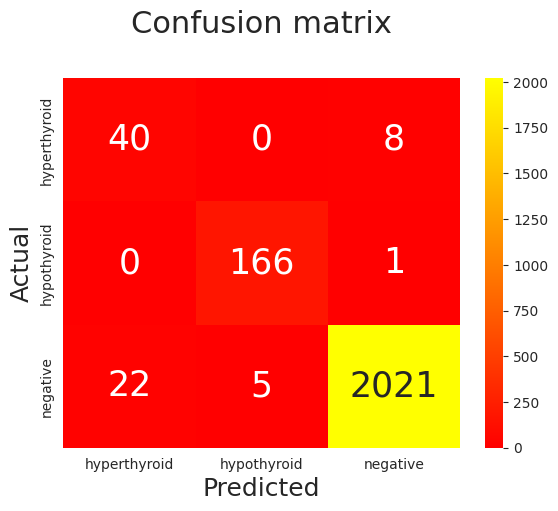

In [80]:
#Confusion Matrix for adasyn DT
make_confusion_matrix(y_test, clf_adasyn_pred)

# parameter tuning

In [81]:
#training model 
clf_tuned = DecisionTreeClassifier(criterion= 'entropy', 
                             max_depth= 13, 
                             max_features= 0.5, 
                             min_samples_leaf= 1,
                             min_samples_split= 9, 
                             random_state= 42)

clf_tuned.fit(X_train, y_train)

# Predict from Test set
clf_tuned_pred = make_scores(clf_tuned,X_test, y_test)


Accuracy :0.98453
AUC : 0.96702
Precision : 0.89703
Recall : 0.90247
F1 : 0.89962
              precision    recall  f1-score   support

           0       0.74      0.73      0.74        48
           1       0.95      0.99      0.97       167
           2       0.99      0.99      0.99      2048

    accuracy                           0.98      2263
   macro avg       0.90      0.90      0.90      2263
weighted avg       0.98      0.98      0.98      2263



Training scores:
 [0.0111279  0.0127514  0.00908933 0.00959616 0.00992612 0.00985264
 0.00883438 0.01012758 0.00976896 0.00794068]

Testing scores:
 [0.70753022 0.60824836 0.48110018 0.43341521 0.46029704 0.48706474
 0.43140896 0.37544045 0.44677991 0.37636492]


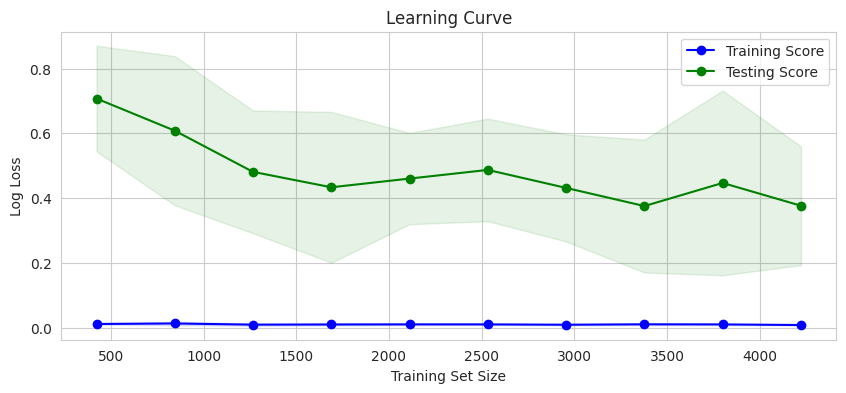

In [82]:
#learning curve for tuned DT
make_learning_curve(clf_tuned, X_train, y_train)

In [83]:
from sklearn.model_selection import cross_val_score

# Get the cost complexity pruning path
path = clf_tuned.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Perform 5-fold cross-validation for each alpha value in the pruning path to find the optimal ccp_alpha
cv_scores = []
for ccp_alpha in ccp_alphas:
    clf_tuned = DecisionTreeClassifier(criterion= 'entropy', 
                             max_depth= 13, 
                             max_features= 0.5, 
                             min_samples_leaf= 1,
                             min_samples_split= 9, 
                             random_state= 42,
                             ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_tuned, X_train, y_train, cv=5, scoring='neg_log_loss')
    cv_scores.append(np.mean(scores))

# Find the alpha value that maximizes the average log loss
optimal_alpha = ccp_alphas[np.argmax(cv_scores)]

# Train a final decision tree with the optimal ccp_alpha
clf_tuned_pruned = DecisionTreeClassifier(criterion= 'entropy', 
                             max_depth= 13, 
                             max_features= 0.5, 
                             min_samples_leaf= 1,
                             min_samples_split= 9, 
                             random_state= 42, 
                            ccp_alpha=optimal_alpha)
clf_tuned_pruned.fit(X_train, y_train)

# Evaluate the pruned tree on the test set
test_score = log_loss(y_test, clf_tuned_pruned.predict_proba(X_test))

print(f"Optimal ccp_alpha: {optimal_alpha}")
print(f"Test log loss with pruning: {test_score}")


Optimal ccp_alpha: 0.0081086660078342
Test log loss with pruning: 0.05114748096596557


Accuracy :0.98409
AUC : 0.99490
Precision : 0.92905
Recall : 0.91276
F1 : 0.91762
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        48
           1       0.89      1.00      0.94       167
           2       0.99      0.99      0.99      2048

    accuracy                           0.98      2263
   macro avg       0.93      0.91      0.92      2263
weighted avg       0.98      0.98      0.98      2263



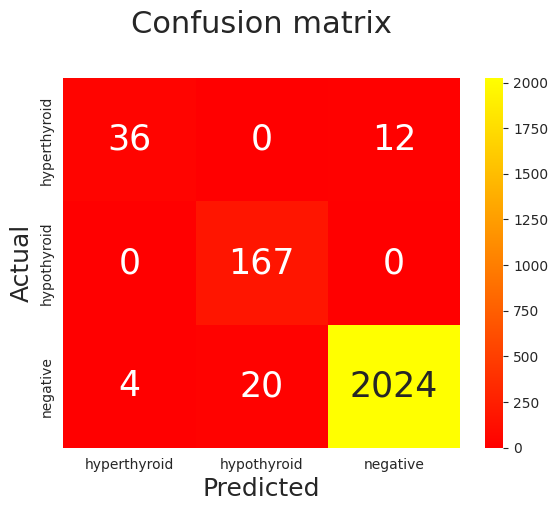

In [84]:
#score and confusion matrix for tuned and pruned DT
clf_tuned_pruned_pred=make_scores(clf_tuned_pruned, X_test, y_test)
make_confusion_matrix(y_test, clf_tuned_pruned_pred)

Training scores:
 [0.0156812  0.03271032 0.03751343 0.03595087 0.04158869 0.04579265
 0.04742676 0.06229542 0.05251637 0.05033636]

Testing scores:
 [0.65397008 0.30554098 0.16756905 0.22585889 0.11575187 0.11120711
 0.07491536 0.09555326 0.1070865  0.08109662]


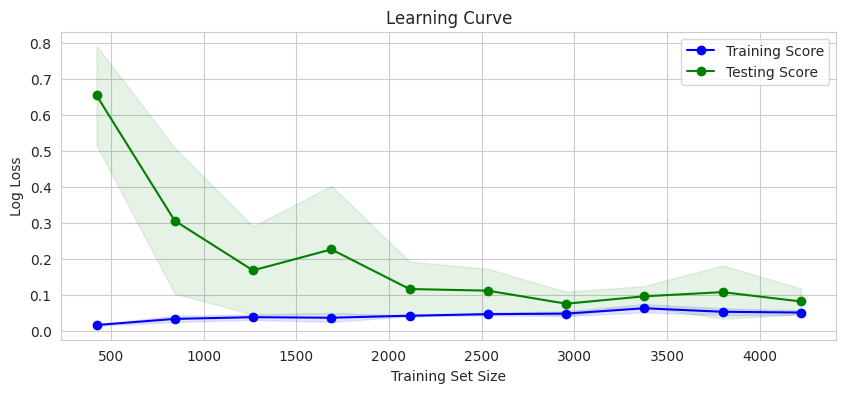

In [85]:
#learning curve for tuned_pruned DT
make_learning_curve(clf_tuned_pruned, X_train, y_train)

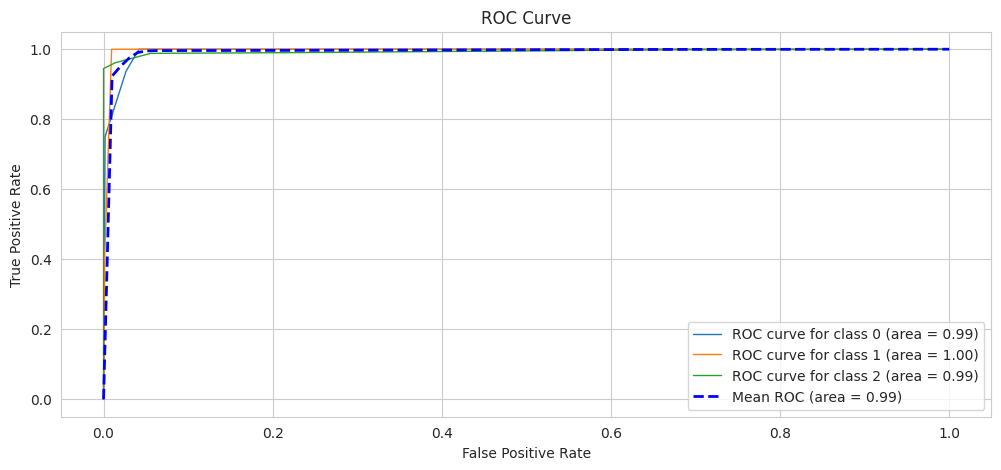

In [86]:
#roc for tuned and truned DT
make_ROC_curve(clf_tuned_pruned, X_test, y_test)

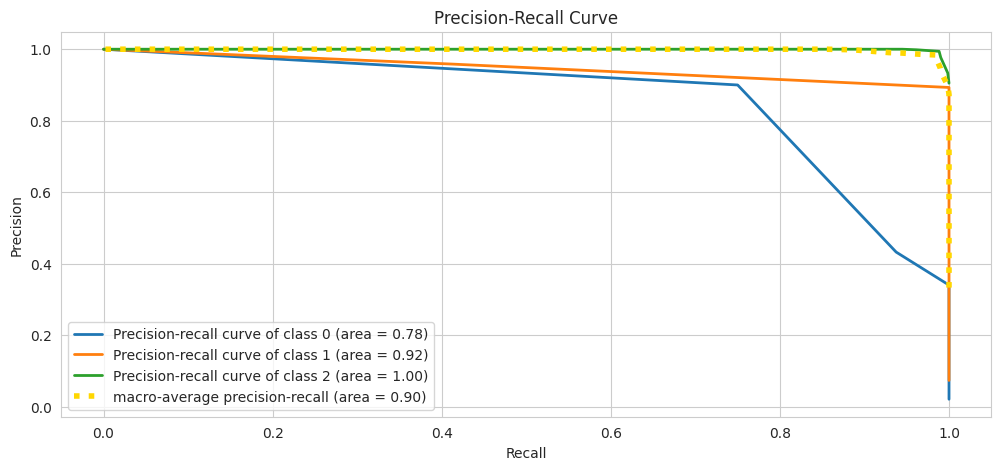

In [87]:
#PR for tuned and pruned DT
make_PR_curve(clf_tuned_pruned, X_test, y_test)

In [88]:
# Random oversampling with Decision Tree
clf_tuned_ros = DecisionTreeClassifier(criterion= 'entropy', 
                             max_depth= 17, 
                             max_features= 0.5, 
                             min_samples_leaf= 1,
                             min_samples_split= 6, 
                             random_state= None)
clf_tuned_ros.fit(X_train_ros, y_train_ros)

clf_tuned_ros_pred= make_scores(clf_tuned_ros, X_test, y_test)

Accuracy :0.98542
AUC : 0.93355
Precision : 0.90933
Recall : 0.89730
F1 : 0.90320
              precision    recall  f1-score   support

           0       0.76      0.73      0.74        48
           1       0.98      0.97      0.97       167
           2       0.99      0.99      0.99      2048

    accuracy                           0.99      2263
   macro avg       0.91      0.90      0.90      2263
weighted avg       0.99      0.99      0.99      2263



Training scores:
 [0.00689947 0.00617419 0.00524292 0.00281385 0.00121744 0.00184492
 0.00101511 0.00042869 0.00073567 0.00055958]

Testing scores:
 [2.81699979 1.89480749 1.07770801 0.22778954 0.25747529 0.15280037
 0.19739248 0.10976868 0.11752593 0.1302775 ]


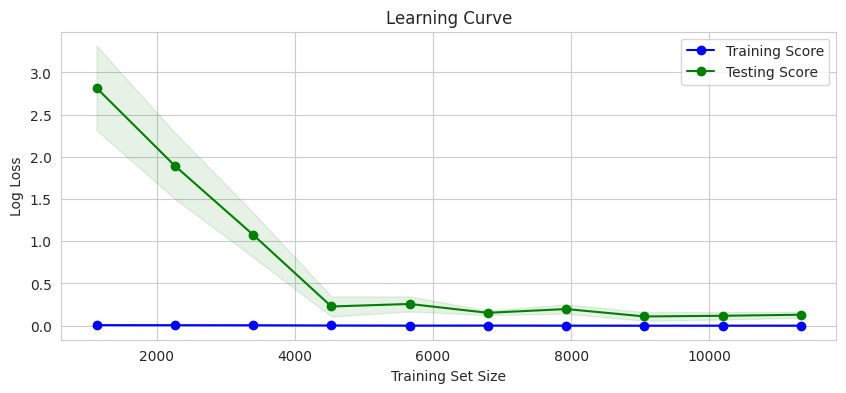

In [89]:
#learning curve for tuned ros DT
make_learning_curve(clf_tuned_ros, X_train_ros, y_train_ros)

In [90]:
from sklearn.model_selection import cross_val_score

# Get the cost complexity pruning path
path = clf_tuned_ros.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Perform 5-fold cross-validation for each alpha value in the pruning path to find the optimal ccp_alpha
cv_scores = []
for ccp_alpha in ccp_alphas:
    clf_tuned_ros = DecisionTreeClassifier(criterion= 'entropy', 
                             max_depth= 17, 
                             max_features= 0.5, 
                             min_samples_leaf= 1,
                             min_samples_split= 6, 
                             random_state= None,
                             ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_tuned_ros, X_train_ros, y_train_ros, cv=5, scoring='neg_log_loss')
    cv_scores.append(np.mean(scores))

# Find the alpha value that maximizes the average log loss
optimal_alpha = ccp_alphas[np.argmax(cv_scores)]

# Train a final decision tree with the optimal ccp_alpha
clf_tuned_pruned_ros = DecisionTreeClassifier(criterion= 'entropy', 
                             max_depth= 17, 
                             max_features= 0.5, 
                             min_samples_leaf= 1,
                             min_samples_split= 6, 
                             random_state= None,
                            ccp_alpha=optimal_alpha)
clf_tuned_pruned_ros.fit(X_train_ros, y_train_ros)

# Evaluate the pruned tree on the test set
test_score = log_loss(y_test, clf_tuned_pruned_ros.predict_proba(X_test))

print(f"Optimal ccp_alpha: {optimal_alpha}")
print(f"Test log loss with pruning: {test_score}")


Optimal ccp_alpha: 0.0033001133143497167
Test log loss with pruning: 0.2299179794416596


Accuracy :0.96907
AUC : 0.96913
Precision : 0.79436
Recall : 0.94608
F1 : 0.85159
              precision    recall  f1-score   support

           0       0.49      0.88      0.63        48
           1       0.89      0.99      0.94       167
           2       1.00      0.97      0.98      2048

    accuracy                           0.97      2263
   macro avg       0.79      0.95      0.85      2263
weighted avg       0.98      0.97      0.97      2263

Training scores:
 [0.00840532 0.03125476 0.03981876 0.04892015 0.05065141 0.04417624
 0.04443263 0.04099557 0.04470935 0.04089704]

Testing scores:
 [2.20510733 0.83152033 0.56338815 0.17548117 0.07402169 0.07145202
 0.07163041 0.04543138 0.0468313  0.04782176]


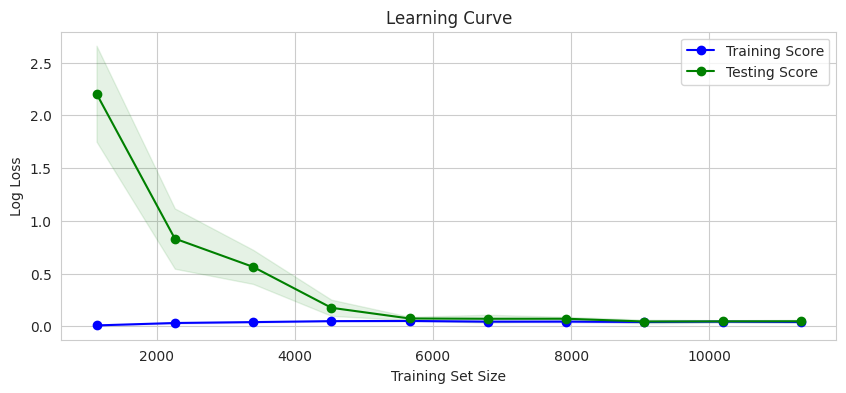

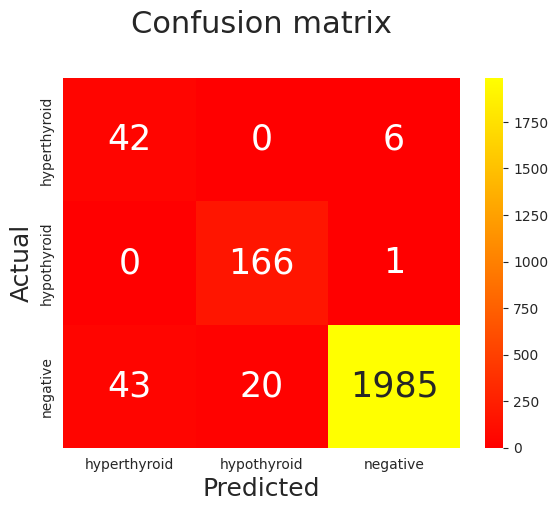

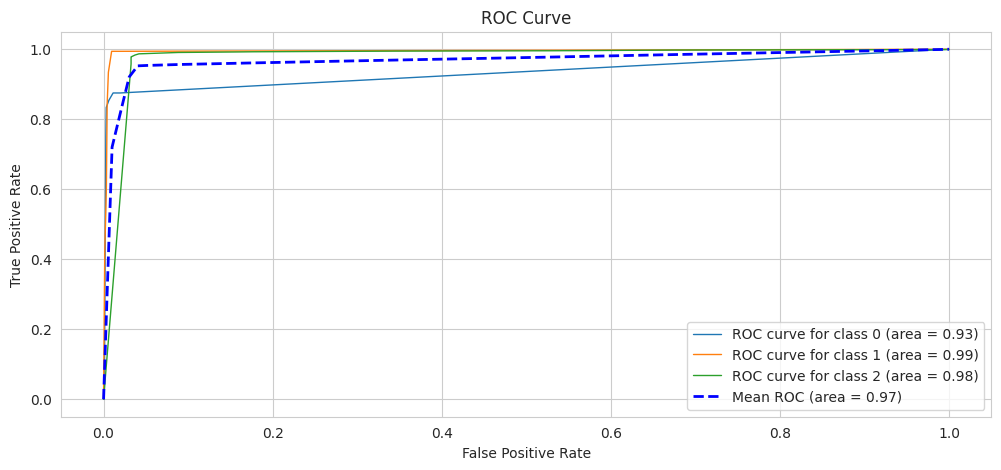

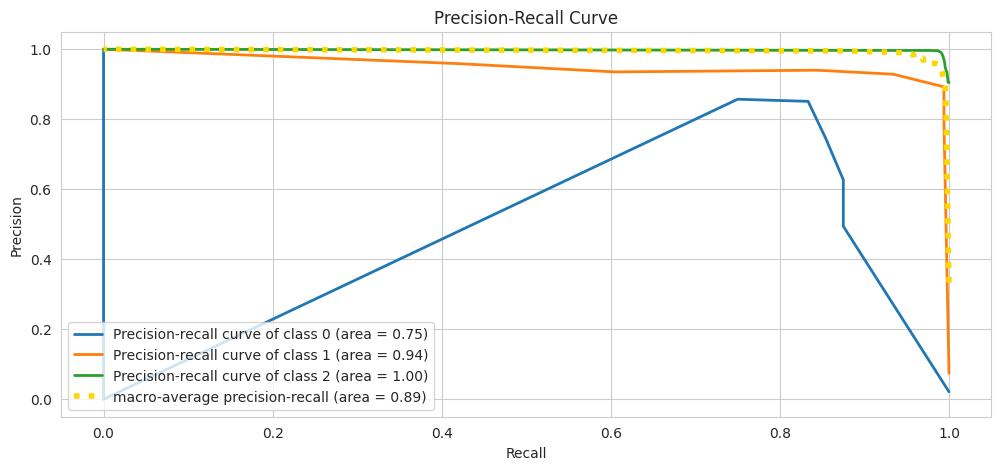

In [91]:
#evaluation of tuned and pruned ROS DT
clf_tuned_pruned_ros_pred= make_scores(clf_tuned_pruned_ros, X_test, y_test)
make_learning_curve(clf_tuned_pruned_ros, X_train_ros, y_train_ros)
make_confusion_matrix(y_test, clf_tuned_pruned_ros_pred)
make_ROC_curve(clf_tuned_pruned_ros, X_test, y_test)
make_PR_curve(clf_tuned_pruned_ros, X_test, y_test)

In [92]:
# smote oversampling with Decision Tree
from sklearn.metrics import classification_report

clf_tuned_smote = DecisionTreeClassifier(criterion= 'gini', 
                             max_depth= 16, 
                             max_features= None, 
                             min_samples_leaf= 2,
                             min_samples_split= 4, 
                             random_state= None)
clf_tuned_smote.fit(X_train_smote, y_train_smote)

clf_tuned_smote_pred= make_scores(clf_tuned_smote, X_test, y_test)

Accuracy :0.98453
AUC : 0.97712
Precision : 0.86650
Recall : 0.96534
F1 : 0.90633
              precision    recall  f1-score   support

           0       0.62      0.92      0.74        48
           1       0.98      0.99      0.99       167
           2       1.00      0.99      0.99      2048

    accuracy                           0.98      2263
   macro avg       0.87      0.97      0.91      2263
weighted avg       0.99      0.98      0.99      2263



Training scores:
 [0.00634051 0.00756421 0.00619701 0.00564826 0.00591815 0.00628278
 0.00535197 0.00506885 0.0048397  0.0045448 ]

Testing scores:
 [2.40350173 2.26422264 1.81826001 0.70251379 0.30933416 0.23203068
 0.24057599 0.18137256 0.17297486 0.18808395]


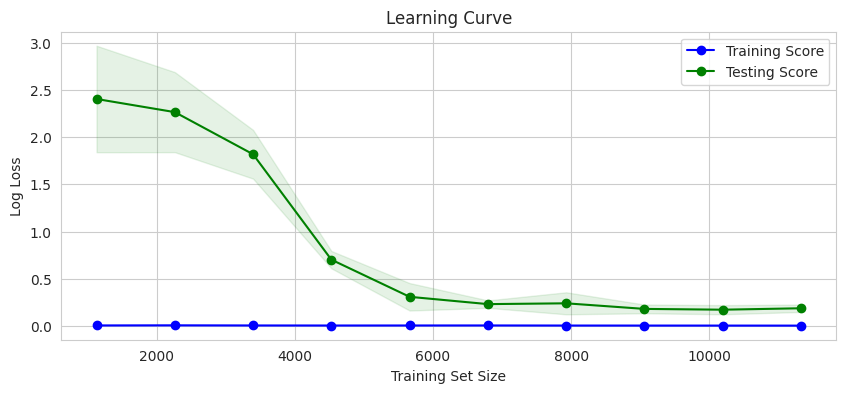

In [93]:
#learning curve for tuned smote DT
make_learning_curve(clf_tuned_smote, X_train_smote, y_train_smote)

In [94]:
from sklearn.model_selection import cross_val_score

# Get the cost complexity pruning path
path = clf_tuned_smote.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Perform 5-fold cross-validation for each alpha value in the pruning path to find the optimal ccp_alpha
cv_scores = []
for ccp_alpha in ccp_alphas:
    clf_tuned_smote = DecisionTreeClassifier(criterion= 'gini', 
                             max_depth= 16, 
                             max_features= None, 
                             min_samples_leaf= 2,
                             min_samples_split= 4, 
                             random_state= None,
                             ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_tuned_smote, X_train_smote, y_train_smote, cv=5, scoring='neg_log_loss')
    cv_scores.append(np.mean(scores))

# Find the alpha value that maximizes the average log loss
optimal_alpha = ccp_alphas[np.argmax(cv_scores)]

# Train a final decision tree with the optimal ccp_alpha
clf_tuned_pruned_smote = DecisionTreeClassifier(criterion= 'gini', 
                             max_depth= 16, 
                             max_features= None, 
                             min_samples_leaf= 2,
                             min_samples_split= 4, 
                             random_state= None,
                            ccp_alpha=optimal_alpha)
clf_tuned_pruned_smote.fit(X_train_smote, y_train_smote)

# Evaluate the pruned tree on the test set
test_score = log_loss(y_test, clf_tuned_pruned_smote.predict_proba(X_test))

print(f"Optimal ccp_alpha: {optimal_alpha}")
print(f"Test log loss with pruning: {test_score}")


Optimal ccp_alpha: 0.0007197136754909773
Test log loss with pruning: 0.12109405635375371


Accuracy :0.98188
AUC : 0.98039
Precision : 0.85168
Recall : 0.96620
F1 : 0.89793
              precision    recall  f1-score   support

           0       0.60      0.92      0.73        48
           1       0.95      1.00      0.98       167
           2       1.00      0.98      0.99      2048

    accuracy                           0.98      2263
   macro avg       0.85      0.97      0.90      2263
weighted avg       0.99      0.98      0.98      2263

Training scores:
 [0.0123783  0.02484324 0.03397338 0.04166151 0.04215976 0.04067449
 0.03892579 0.03713398 0.0345479  0.03203991]

Testing scores:
 [2.02071095 0.94387057 0.57963272 0.19856033 0.11694041 0.07746241
 0.10418376 0.0603009  0.05728179 0.04727893]


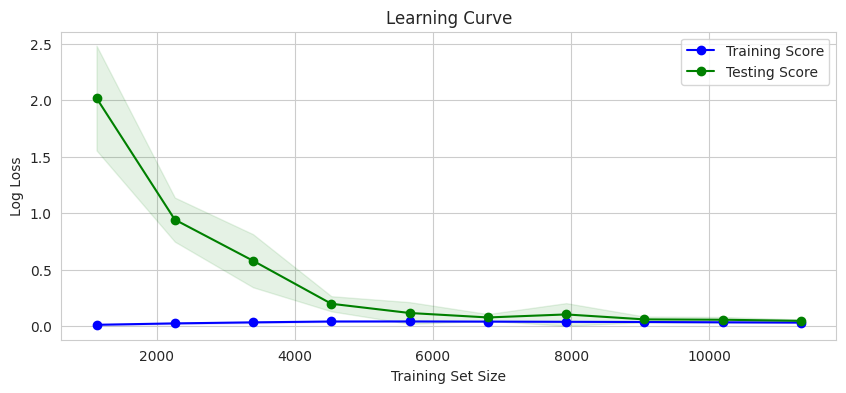

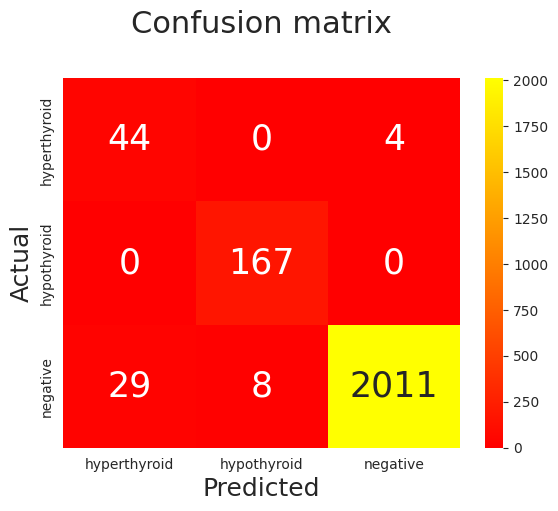

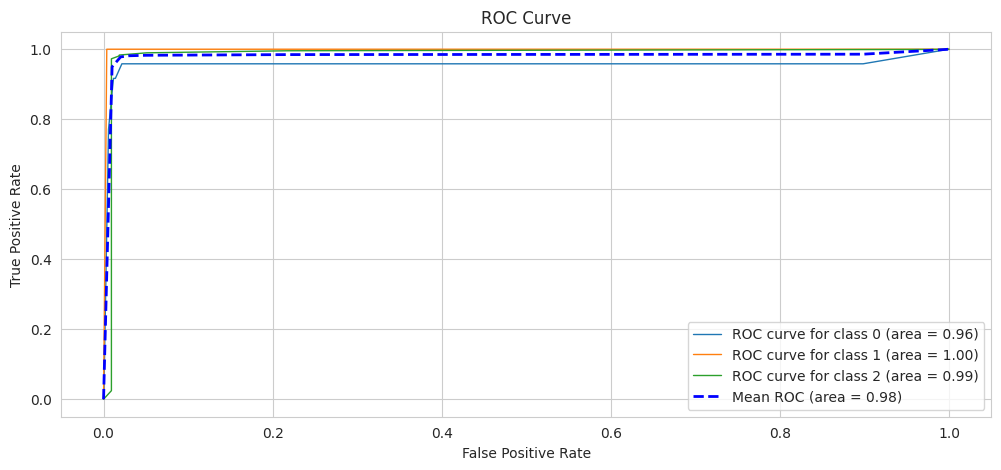

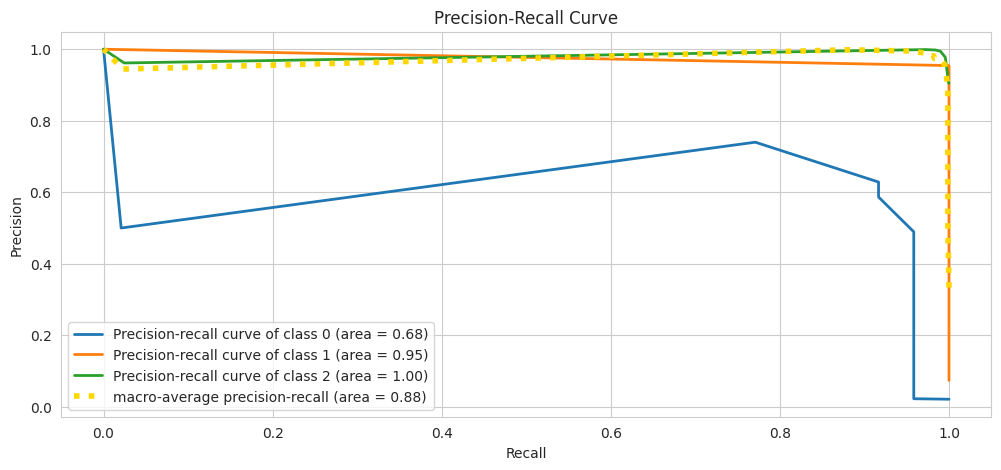

In [95]:
#evaluation of tuned and pruned smote DT
clf_tuned_pruned_smote_pred= make_scores(clf_tuned_pruned_smote, X_test, y_test)
make_learning_curve(clf_tuned_pruned_smote, X_train_smote, y_train_smote)
make_confusion_matrix(y_test, clf_tuned_pruned_smote_pred)
make_ROC_curve(clf_tuned_pruned_smote, X_test, y_test)
make_PR_curve(clf_tuned_pruned_smote, X_test, y_test)

In [96]:
make_scores(clf_tuned_pruned_smote, X_train_smote, y_train_smote)

Accuracy :0.99378
AUC : 0.99769
Precision : 0.99382
Recall : 0.99378
F1 : 0.99378
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4719
           1       1.00      1.00      1.00      4719
           2       1.00      0.98      0.99      4719

    accuracy                           0.99     14157
   macro avg       0.99      0.99      0.99     14157
weighted avg       0.99      0.99      0.99     14157



array([2, 2, 2, ..., 1, 1, 1])

In [97]:
# Tuned ADSYN with Decision Tree
clf_tuned_adasyn= DecisionTreeClassifier(criterion= 'gini', 
                             max_depth= 7, 
                             max_features= 0.5, 
                             min_samples_leaf= 3,
                             min_samples_split= 3, 
                             random_state= None)
clf_tuned_adasyn.fit(X_train_adasyn, y_train_adasyn)

clf_tuned_adasyn_pred= make_scores(clf_tuned_adasyn, X_test, y_test)

Accuracy :0.98144
AUC : 0.98388
Precision : 0.84749
Recall : 0.97099
F1 : 0.89546
              precision    recall  f1-score   support

           0       0.58      0.94      0.72        48
           1       0.96      0.99      0.98       167
           2       1.00      0.98      0.99      2048

    accuracy                           0.98      2263
   macro avg       0.85      0.97      0.90      2263
weighted avg       0.99      0.98      0.98      2263



Training scores:
 [0.02040347 0.02015878 0.0417067  0.0253801  0.03600486 0.04615474
 0.03317146 0.03351552 0.02994222 0.02741354]

Testing scores:
 [3.00812101 1.87420497 1.8121107  1.26914427 0.21529168 0.15781174
 0.14161098 0.10516343 0.08761745 0.09436753]


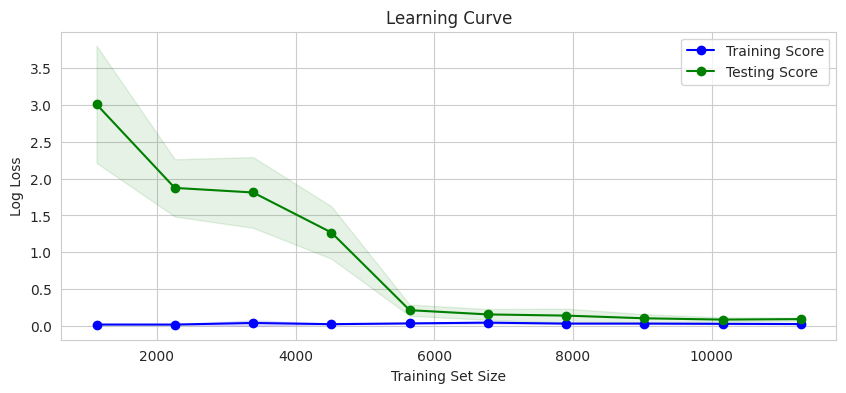

In [98]:
#learning curve for tuned adasyn
make_learning_curve(clf_tuned_adasyn,X_train_adasyn, y_train_adasyn)

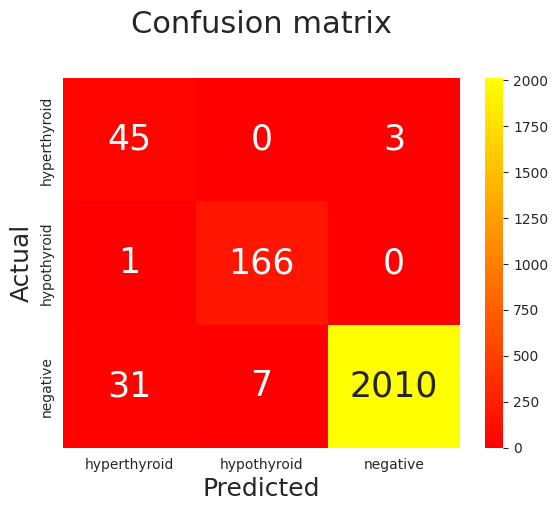

In [99]:
#confusion matrix for tuned adasyn
make_confusion_matrix(y_test, clf_tuned_adasyn_pred)

# Evaluating SVM

## Training SVM and comparing for different scaling techniques

In [100]:
#Raw data

from sklearn import svm
clf_svm=svm.SVC(probability=True)
clf_svm.fit(X_train, y_train)

clf_svm_pred=make_scores(clf_svm,X_test, y_test)



Accuracy :0.95360
AUC : 0.95413
Precision : 0.91507
Recall : 0.71528
F1 : 0.79199
              precision    recall  f1-score   support

           0       0.88      0.58      0.70        48
           1       0.91      0.57      0.70       167
           2       0.96      0.99      0.97      2048

    accuracy                           0.95      2263
   macro avg       0.92      0.72      0.79      2263
weighted avg       0.95      0.95      0.95      2263



In [101]:
#balanced data
clf_svm_smote=svm.SVC(probability=True)
clf_svm_smote.fit(X_train_smote, y_train_smote)
clf_svm_smote_pred=make_scores(clf_svm_smote,X_test, y_test)

Accuracy :0.92930
AUC : 0.98026
Precision : 0.69039
Recall : 0.91292
F1 : 0.74946
              precision    recall  f1-score   support

           0       0.25      0.81      0.39        48
           1       0.82      1.00      0.90       167
           2       1.00      0.93      0.96      2048

    accuracy                           0.93      2263
   macro avg       0.69      0.91      0.75      2263
weighted avg       0.97      0.93      0.94      2263



In [102]:
#log-scaled

scaling_sets = {"train": X_train, "test": X_test}

# Dictionaries to store log-scaled DataFrames
X_train_log, X_test_log = None, None

for scaling_set, X_scaling in scaling_sets.items():
    # Create a new DataFrame for log-scaled data
    X_scaling_log = pd.DataFrame()

    # Apply log transformation to selected columns
    X_scaling_log['TSH'] = np.log(X_scaling['TSH'] + 0.01)
    X_scaling_log['T3'] = np.log(X_scaling['T3'] + 0.01)
    X_scaling_log['TT4'] = np.log(X_scaling['TT4'] + 0.01)
    X_scaling_log['T4U'] = np.log(X_scaling['T4U'] + 0.01)
    X_scaling_log['FTI'] = np.log(X_scaling['FTI'] + 0.01)
    
    other_columns = X_scaling.drop(['TSH', 'T3', 'TT4', 'T4U', 'FTI'], axis=1)
    X_scaling_log = pd.concat([X_scaling_log, other_columns], axis=1)

    # Assign the log-scaled DataFrame to the corresponding variable
    if scaling_set == "train":
        X_train_log = X_scaling_log
    elif scaling_set == "test":
        X_test_log = X_scaling_log

#Training the SVM for logged continous data
clf_svm_log=svm.SVC(probability=True)
clf_svm_log.fit(X_train_log, y_train)

clf_svm_log_pred=make_scores(clf_svm_log,X_test_log, y_test)



Accuracy :0.92665
AUC : 0.99356
Precision : 0.64167
Recall : 0.43114
F1 : 0.47158
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        48
           1       1.00      0.29      0.45       167
           2       0.93      1.00      0.96      2048

    accuracy                           0.93      2263
   macro avg       0.64      0.43      0.47      2263
weighted avg       0.91      0.93      0.90      2263



/home/angel-tamang/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/angel-tamang/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/angel-tamang/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/a

In [103]:
#Let's check SVM for balanced dataset and logged

# Dictionaries to store log-scaled DataFrames
X_train_smote_log= None

# Create a new DataFrame for log-scaled data
X_train_smote_log = pd.DataFrame()

# Apply log transformation to selected columns
X_train_smote_log['TSH'] = np.log(X_train_smote['TSH'] + 0.01)
X_train_smote_log['T3'] = np.log(X_train_smote['T3'] + 0.01)
X_train_smote_log['TT4'] = np.log(X_train_smote['TT4'] + 0.01)
X_train_smote_log['T4U'] = np.log(X_train_smote['T4U'] + 0.01)
X_train_smote_log['FTI'] = np.log(X_train_smote['FTI'] + 0.01)
    
other_columns_smote = X_train_smote.drop(['TSH', 'T3', 'TT4', 'T4U', 'FTI'], axis=1)
X_train_smote_log = pd.concat([X_train_smote_log, other_columns_smote], axis=1)

#training balanced and logged SVM
clf_svm_smote_log=svm.SVC(probability=True)
clf_svm_smote_log.fit(X_train_smote_log, y_train_smote)

clf_svm_smote_log_pred=make_scores(clf_svm_smote_log,X_test_log, y_test)


Accuracy :0.87494
AUC : 0.98500
Precision : 0.59590
Recall : 0.89969
F1 : 0.66418
              precision    recall  f1-score   support

           0       0.20      0.83      0.32        48
           1       0.59      1.00      0.74       167
           2       1.00      0.87      0.93      2048

    accuracy                           0.87      2263
   macro avg       0.60      0.90      0.66      2263
weighted avg       0.95      0.87      0.90      2263



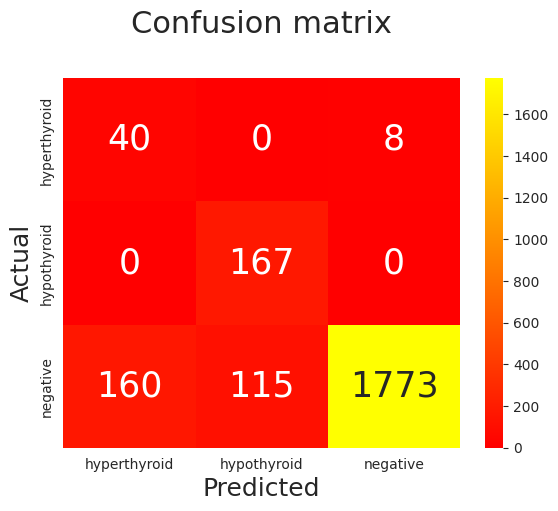

In [104]:
#logged and balanced data svm
make_confusion_matrix(y_test, clf_svm_smote_log_pred )

In [105]:
#standardized-scaled

scaling_sets = {"train": X_train, "test": X_test}
ss = StandardScaler()

# Dictionaries to store standardized-scaled DataFrames
X_train_standardized, X_test_standardized = None, None

for scaling_set, X_scaling in scaling_sets.items():
    # Apply standardized transformation to selected columns
    X_scaling_standardized = X_scaling.copy()
    X_scaling_standardized[['TSH', 'T3', 'TT4', 'T4U', 'FTI']] = ss.fit_transform(X_scaling[['TSH', 'T3', 'TT4', 'T4U', 'FTI']])

    # Assign the standardized-scaled DataFrame to the corresponding variable
    if scaling_set == "train":
        X_train_standardized = X_scaling_standardized
    elif scaling_set == "test":
        X_test_standardized = X_scaling_standardized

#Training the SVM for standardizedged continous data
clf_svm_standardized=svm.SVC(probability=True)
clf_svm_standardized.fit(X_train_standardized, y_train)

clf_svm_standardized_pred=make_scores(clf_svm_standardized,X_test_standardized, y_test)



Accuracy :0.91913
AUC : 0.98703
Precision : 0.97266
Recall : 0.44174
F1 : 0.50504
              precision    recall  f1-score   support

           0       1.00      0.19      0.32        48
           1       1.00      0.14      0.24       167
           2       0.92      1.00      0.96      2048

    accuracy                           0.92      2263
   macro avg       0.97      0.44      0.51      2263
weighted avg       0.93      0.92      0.89      2263



In [106]:
#Let's check SVM for balanced dataset and standardized
# Dictionaries to store standardized-scaled DataFrames
X_train_smote_standardized= None

X_train_smote_standardized = X_train_smote.copy()
X_train_smote_standardized[['TSH', 'T3', 'TT4', 'T4U', 'FTI']] = mm.fit_transform(X_train_smote[['TSH', 'T3', 'TT4', 'T4U', 'FTI']])


#training balanced and standardizedged SVM
clf_svm_smote_standardized=svm.SVC(probability=True)
clf_svm_smote_standardized.fit(X_train_smote_standardized, y_train_smote)

clf_svm_smote_standardized_pred=make_scores(clf_svm_smote_standardized,X_test_standardized, y_test)

Accuracy :0.27795
AUC : 0.85153
Precision : 0.39118
Recall : 0.68694
F1 : 0.23422
              precision    recall  f1-score   support

           0       0.06      0.98      0.12        48
           1       0.13      0.87      0.23       167
           2       0.98      0.21      0.35      2048

    accuracy                           0.28      2263
   macro avg       0.39      0.69      0.23      2263
weighted avg       0.89      0.28      0.34      2263



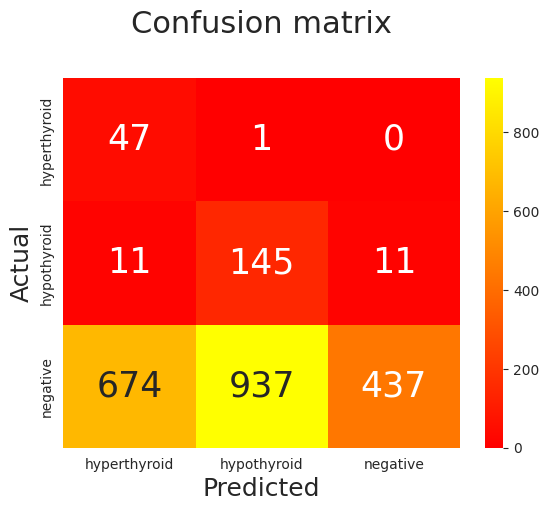

In [107]:
make_confusion_matrix(y_test,clf_svm_smote_standardized_pred)

In [108]:
#normalized-scaled

scaling_sets = {"train": X_train, "test": X_test}
mm = MinMaxScaler() 

# Dictionaries to store normalized-scaled DataFrames
X_train_normalized, X_test_normalized = None, None

for scaling_set, X_scaling in scaling_sets.items():
    # Apply normalized transformation to selected columns
    X_scaling_normalized = X_scaling.copy()
    X_scaling_normalized[['TSH', 'T3', 'TT4', 'T4U', 'FTI']] = mm.fit_transform(X_scaling[['TSH', 'T3', 'TT4', 'T4U', 'FTI']])

    # Ammign the normalized-scaled DataFrame to the corresponding variable
    if scaling_set == "train":
        X_train_normalized = X_scaling_normalized
    elif scaling_set == "test":
        X_test_normalized = X_scaling_normalized

#Training the SVM for normalizedged continous data
clf_svm_normalized=svm.SVC(probability=True)
clf_svm_normalized.fit(X_train_normalized, y_train)

clf_svm_normalized_pred=make_scores(clf_svm_normalized,X_test_normalized, y_test)



Accuracy :0.90499
AUC : 0.85275
Precision : 0.30166
Recall : 0.33333
F1 : 0.31671
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        48
           1       0.00      0.00      0.00       167
           2       0.90      1.00      0.95      2048

    accuracy                           0.90      2263
   macro avg       0.30      0.33      0.32      2263
weighted avg       0.82      0.90      0.86      2263



/home/angel-tamang/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/angel-tamang/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/angel-tamang/myenv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/a

In [109]:
#Let's check SVM for balanced dataset and normalizedg
# Dictionaries to store normalized-scaled DataFrames
X_train_smote_normalized= None

X_train_smote_normalized = X_train_smote.copy()
X_train_smote_normalized[['TSH', 'T3', 'TT4', 'T4U', 'FTI']] = mm.fit_transform(X_train_smote[['TSH', 'T3', 'TT4', 'T4U', 'FTI']])


#training balanced and normalizedged SVM
clf_svm_smote_normalized=svm.SVC(probability=True)
clf_svm_smote_normalized.fit(X_train_smote_normalized, y_train_smote)

clf_svm_smote_normalized_pred=make_scores(clf_svm_smote_normalized,X_test_normalized, y_test)

Accuracy :0.17057
AUC : 0.64535
Precision : 0.36336
Recall : 0.47600
F1 : 0.15170
              precision    recall  f1-score   support

           0       0.03      0.67      0.06        48
           1       0.10      0.64      0.18       167
           2       0.95      0.12      0.21      2048

    accuracy                           0.17      2263
   macro avg       0.36      0.48      0.15      2263
weighted avg       0.87      0.17      0.21      2263



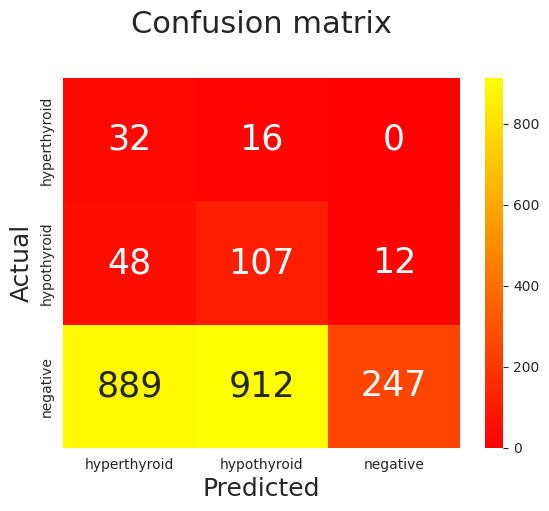

In [110]:
make_confusion_matrix(y_test,clf_svm_smote_normalized_pred)

In [111]:
#using robust scaler

from sklearn.preprocessing import RobustScaler
scaling_sets = {"train": X_train, "test": X_test}
rs = RobustScaler() 

# Dictionaries to store robust_scaled-scaled DataFrames
X_train_robust_scaled, X_test_robust_scaled = None, None

for scaling_set, X_scaling in scaling_sets.items():
    # Apply robust_scaled transformation to selected columns
    X_scaling_robust_scaled = X_scaling.copy()
    X_scaling_robust_scaled[['TSH', 'T3', 'TT4', 'T4U', 'FTI']] = rs.fit_transform(X_scaling[['TSH', 'T3', 'TT4', 'T4U', 'FTI']])

    # Ammign the robust_scaled-scaled DataFrame to the corresponding variable
    if scaling_set == "train":
        X_train_robust_scaled = X_scaling_robust_scaled
    elif scaling_set == "test":
        X_test_robust_scaled = X_scaling_robust_scaled

#Training the SVM for robust_scaledged continous data
clf_svm_robust_scaled=svm.SVC(probability=True)
clf_svm_robust_scaled.fit(X_train_robust_scaled, y_train)

clf_svm_robust_scaled_pred=make_scores(clf_svm_robust_scaled,X_test_robust_scaled, y_test)

Accuracy :0.95404
AUC : 0.99416
Precision : 0.93154
Recall : 0.66468
F1 : 0.74674
              precision    recall  f1-score   support

           0       0.94      0.35      0.52        48
           1       0.89      0.65      0.75       167
           2       0.96      0.99      0.98      2048

    accuracy                           0.95      2263
   macro avg       0.93      0.66      0.75      2263
weighted avg       0.95      0.95      0.95      2263



In [112]:
#Let's check SVM for balanced dataset and robust_scaled
# Dictionaries to store robust_scaled-scaled DataFrames
X_train_smote_robust_scaled= None

X_train_smote_robust_scaled = X_train_smote.copy()
X_train_smote_robust_scaled[['TSH', 'T3', 'TT4', 'T4U', 'FTI']] = rs.fit_transform(X_train_smote[['TSH', 'T3', 'TT4', 'T4U', 'FTI']])


#training balanced and robust_scaledged SVM
clf_svm_smote_robust_scaled=svm.SVC(probability=True)
clf_svm_smote_robust_scaled.fit(X_train_smote_robust_scaled, y_train_smote)

clf_svm_smote_robust_scaled_pred=make_scores(clf_svm_smote_robust_scaled,X_test_robust_scaled, y_test)

Accuracy :0.72293
AUC : 0.97834
Precision : 0.49728
Recall : 0.89245
F1 : 0.52538
              precision    recall  f1-score   support

           0       0.12      1.00      0.22        48
           1       0.37      0.98      0.54       167
           2       1.00      0.70      0.82      2048

    accuracy                           0.72      2263
   macro avg       0.50      0.89      0.53      2263
weighted avg       0.93      0.72      0.79      2263



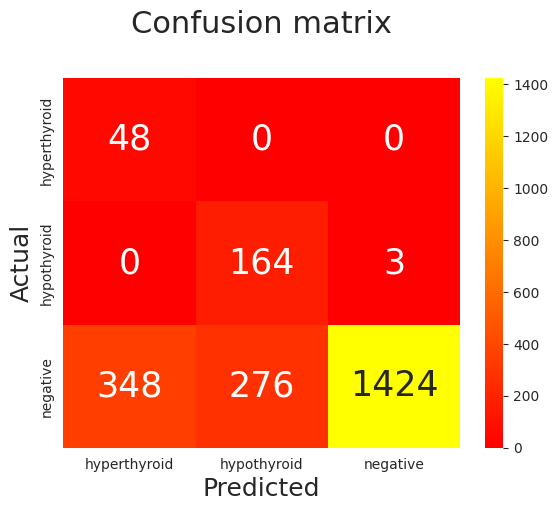

In [113]:
make_confusion_matrix(y_test,clf_svm_smote_robust_scaled_pred)

# Random Forest

In [114]:
from sklearn.ensemble import RandomForestClassifier

clf_rf=RandomForestClassifier(n_estimators=50, ccp_alpha=0.0007197136754909773)
clf_rf.fit(X_train, y_train)

clf_rf_pred= make_scores(clf_rf, X_test, y_test)

Accuracy :0.98719
AUC : 0.99868
Precision : 0.93445
Recall : 0.92068
F1 : 0.92589
              precision    recall  f1-score   support

           0       0.88      0.77      0.82        48
           1       0.93      1.00      0.96       167
           2       0.99      0.99      0.99      2048

    accuracy                           0.99      2263
   macro avg       0.93      0.92      0.93      2263
weighted avg       0.99      0.99      0.99      2263



Training scores:
 [0.01611799 0.01510726 0.01673555 0.01814848 0.02300515 0.02431095
 0.02681757 0.0292717  0.03044993 0.03332588]

Testing scores:
 [0.08117005 0.06269197 0.0502931  0.0488283  0.04801931 0.04786224
 0.04776656 0.0474876  0.0451246  0.04551942]


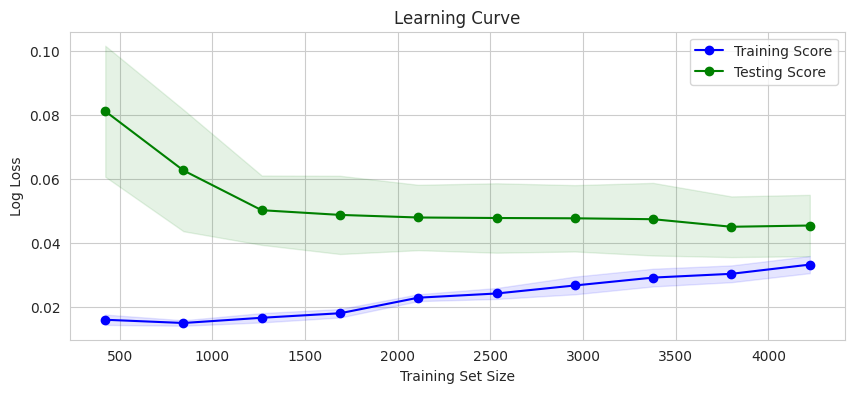

In [115]:
make_learning_curve(clf_rf, X_train, y_train)

Accuracy :0.97879
AUC : 0.99839
Precision : 0.84111
Recall : 0.97862
F1 : 0.89704
              precision    recall  f1-score   support

           0       0.62      0.96      0.75        48
           1       0.90      1.00      0.95       167
           2       1.00      0.98      0.99      2048

    accuracy                           0.98      2263
   macro avg       0.84      0.98      0.90      2263
weighted avg       0.98      0.98      0.98      2263

Accuracy :0.99449
AUC : 0.99945
Precision : 0.99452
Recall : 0.99449
F1 : 0.99448
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4719
           1       1.00      1.00      1.00      4719
           2       1.00      0.98      0.99      4719

    accuracy                           0.99     14157
   macro avg       0.99      0.99      0.99     14157
weighted avg       0.99      0.99      0.99     14157

Training scores:
 [0.01644965 0.02454889 0.03047358 0.03798183 0.04120465 

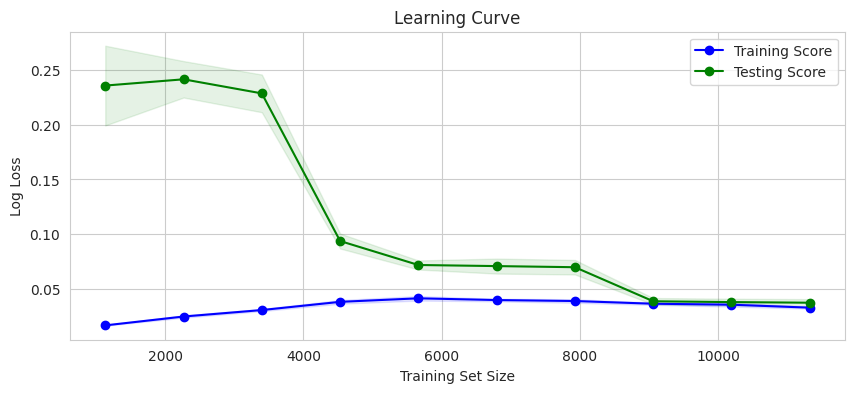

In [116]:
#checking on balanced data
clf_rf_smote=RandomForestClassifier(n_estimators=50, ccp_alpha=0.0007815212453266183)
clf_rf_smote.fit(X_train_smote, y_train_smote)

clf_rf_smote_pred= make_scores(clf_rf_smote, X_test, y_test)
make_scores(clf_rf_smote, X_train_smote, y_train_smote)
make_learning_curve(clf_rf_smote, X_train_smote, y_train_smote)

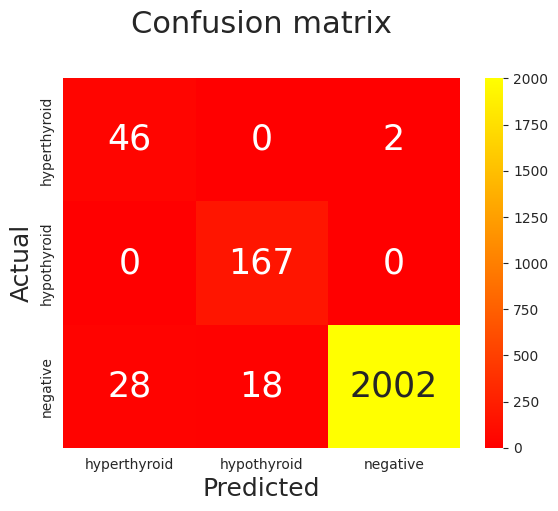

In [117]:
make_confusion_matrix(y_test,clf_rf_smote_pred)

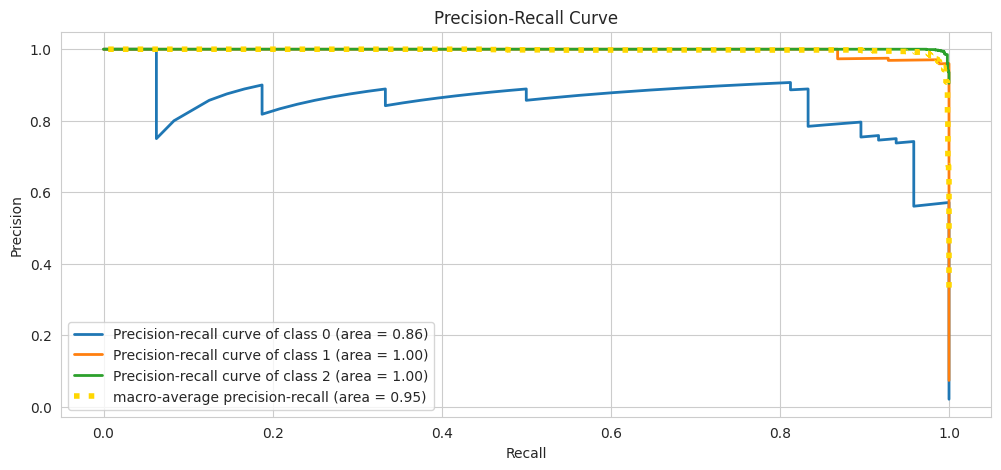

In [118]:
make_PR_curve(clf_rf_smote, X_test, y_test)

# MLP


In [119]:
from sklearn.neural_network import MLPClassifier

clf_mlp = MLPClassifier()
clf_mlp.fit(X_train, y_train)

clf_mlp_pred= make_scores(clf_mlp, X_test, y_test)


Accuracy :0.98056
AUC : 0.99403
Precision : 0.91309
Recall : 0.89313
F1 : 0.90224
              precision    recall  f1-score   support

           0       0.84      0.75      0.79        48
           1       0.91      0.94      0.93       167
           2       0.99      0.99      0.99      2048

    accuracy                           0.98      2263
   macro avg       0.91      0.89      0.90      2263
weighted avg       0.98      0.98      0.98      2263



Accuracy :0.97304
AUC : 0.99540
Precision : 0.82586
Recall : 0.95378
F1 : 0.87871
              precision    recall  f1-score   support

           0       0.61      0.92      0.73        48
           1       0.87      0.97      0.92       167
           2       1.00      0.97      0.98      2048

    accuracy                           0.97      2263
   macro avg       0.83      0.95      0.88      2263
weighted avg       0.98      0.97      0.97      2263



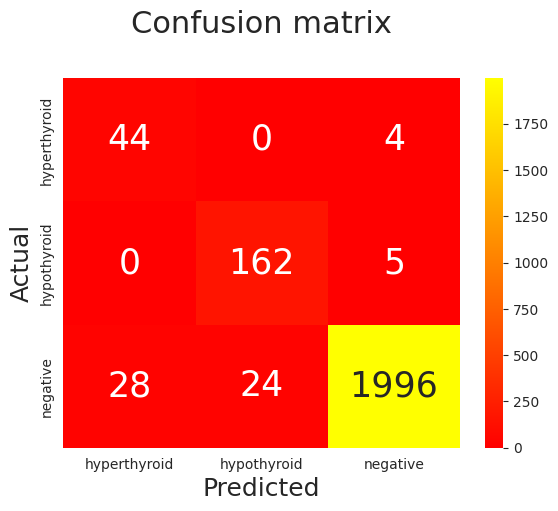

In [120]:
#for balanced

clf_mlp_smote = MLPClassifier(max_iter=500, alpha= 0.076)
clf_mlp_smote.fit(X_train_smote, y_train_smote)

clf_mlp_smote_pred= make_scores(clf_mlp_smote, X_test, y_test)
make_confusion_matrix(y_test, clf_mlp_smote_pred)

In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import log_loss
import numpy as np


# Create and fit a random forest
clf_rf_smote = RandomForestClassifier(n_estimators=50, verbose=True)
clf_rf_smote.fit(X_train_smote, y_train_smote)

# Get the individual decision trees in the forest
individual_trees = clf_rf_smote.estimators_

# Perform cost complexity pruning for each decision tree
optimal_alphas = []
for tree in individual_trees:
    # Get the cost complexity pruning path for each decision tree
    path = tree.cost_complexity_pruning_path(X_train_smote, y_train_smote)
    ccp_alphas, impurities = path.ccp_alphas, path.impurities
    
    # Perform 5-fold cross-validation for each alpha value in the pruning path to find the optimal ccp_alpha
    cv_scores = []
    for ccp_alpha in ccp_alphas:
        clf_pruned_tree = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
        scores = cross_val_score(clf_pruned_tree, X_train_smote, y_train_smote, cv=5, scoring='neg_log_loss')
        cv_scores.append(np.mean(scores))

    # Find the alpha value that maximizes the average log loss
    optimal_alpha = ccp_alphas[np.argmax(cv_scores)]
    optimal_alphas.append(optimal_alpha)

# Re-train a final random forest with the mean of the optimal ccp_alpha values
mean_optimal_alpha = np.mean(optimal_alphas)
clf_tuned_rf = RandomForestClassifier(n_estimators=50, ccp_alpha=mean_optimal_alpha, verbose=True)
clf_tuned_rf.fit(X_train_smote, y_train_smote)

# Evaluate the pruned random forest on the test set
test_score = log_loss(y_test, clf_tuned_rf.predict_proba(X_test))

print(f"Optimal ccp_alpha for each tree: {optimal_alphas}")
print(f"Mean optimal ccp_alpha: {mean_optimal_alpha}")
print(f"Test log loss with pruning: {test_score}")


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.2s


Optimal ccp_alpha for each tree: [0.0007227739860672965, 0.000733582932294281, 0.0012615042286208034, 0.0007234354405747666, 0.0007969768541905811, 0.0007206368290311469, 0.0008140215133222127, 0.0007240045402782269, 0.0007245907832784766, 0.0007339411144907973, 0.0005408359685178197, 0.0007568944999704208, 0.000724677976380945, 0.0008134033592981176, 0.0007135468961656979, 0.0007274329608695797, 0.0008417050943144558, 0.000837170314885065, 0.000707344369282656, 0.0007085750741388395, 0.0007311976143144973, 0.0008368501588874901, 0.0007619496918160836, 0.0007515230682517797, 0.0012321851499621267, 0.0007759563319335978, 0.0007777327934606367, 0.0008855530907736127, 0.0007192073307775789, 0.000720229319216539, 0.0005532570977597151, 0.0007904478777286679, 0.0006234706622403981, 0.0007193539560371495, 0.0007616504242167697, 0.0006537438346955562, 0.0007140422160185005, 0.0008212969040759136, 0.000724334301592956, 0.000781894437222029, 0.000722157974073739, 0.0007232460062648741, 0.000729

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [122]:
from sklearn.model_selection import cross_val_score
import numpy as np

clf_rf_smote_cv=RandomForestClassifier(n_estimators=50, ccp_alpha=0.0007197136754909773)

# Perform cross-validation
cv_scores = cross_val_score(clf_rf_smote_cv, X_test, y_test, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

from sklearn.metrics import make_scorer, precision_score, recall_score

# Define precision and recall scorers
precision_scorer = make_scorer(precision_score, average='macro')  # You can adjust 'average' as needed
recall_scorer = make_scorer(recall_score, average='macro')  # You can adjust 'average' as needed

# Perform cross-validation with multiple scoring metrics
cv_precision = cross_val_score(clf_rf_smote_cv, X_test, y_test, cv=5, scoring=precision_scorer)
cv_recall = cross_val_score(clf_rf_smote_cv, X_test, y_test, cv=5, scoring=recall_scorer)

# Print the cross-validation scores for precision and recall
print("Cross-Validation Precision Scores:", cv_precision)
print("Mean Precision Score:", np.mean(cv_precision))
print("Cross-Validation Recall Scores:", cv_recall)
print("Mean Recall Score:", np.mean(cv_recall))

Cross-Validation Scores: [0.97571744 0.99116998 0.99116998 0.98230088 0.98451327]
Mean CV Score: 0.9849743108871045
Cross-Validation Precision Scores: [0.95127417 0.98857402 0.95153303 0.8744669  0.97904246]
Mean Precision Score: 0.9489781150695524
Cross-Validation Recall Scores: [0.79593496 0.93252033 0.92241932 0.87338    0.92429593]
Mean Recall Score: 0.8897101059152183


/home/angel-tamang/myenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/angel-tamang/myenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/angel-tamang/myenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/angel-tamang/myenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/angel-tamang/myenv/lib/python3

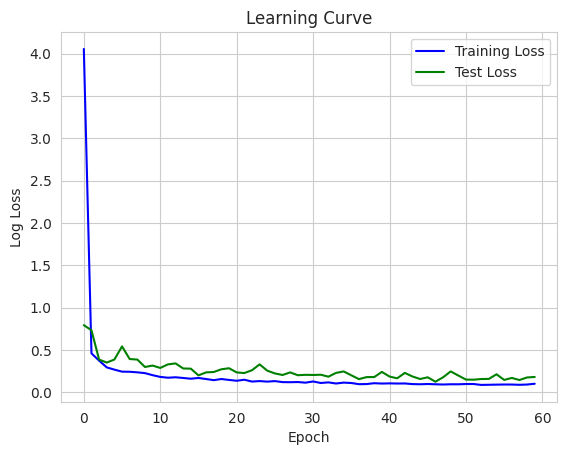

In [123]:
# MLP model
mlp = MLPClassifier(max_iter=1, warm_start=True, alpha= 0.076)

# Define the number of epochs
num_epochs = 60

train_loss_values = []
test_loss_values = []

# Placeholder for the loss values
loss_values = []

# Train for a number of epochs
for i in range(num_epochs):
    mlp.fit(X_train_smote, y_train_smote)
    # Capture the loss values for training
    train_loss_values.append(mlp.loss_)
    # Predict probabilities for the test set and calculate the loss
    test_probs = mlp.predict_proba(X_test)
    test_loss = log_loss(y_test, test_probs)
    test_loss_values.append(test_loss)

# Plotting the loss values
plt.figure()
plt.plot(train_loss_values, label='Training Loss', color='blue')
plt.plot(test_loss_values, label='Test Loss', color='green')
plt.title('Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.legend()
plt.show()


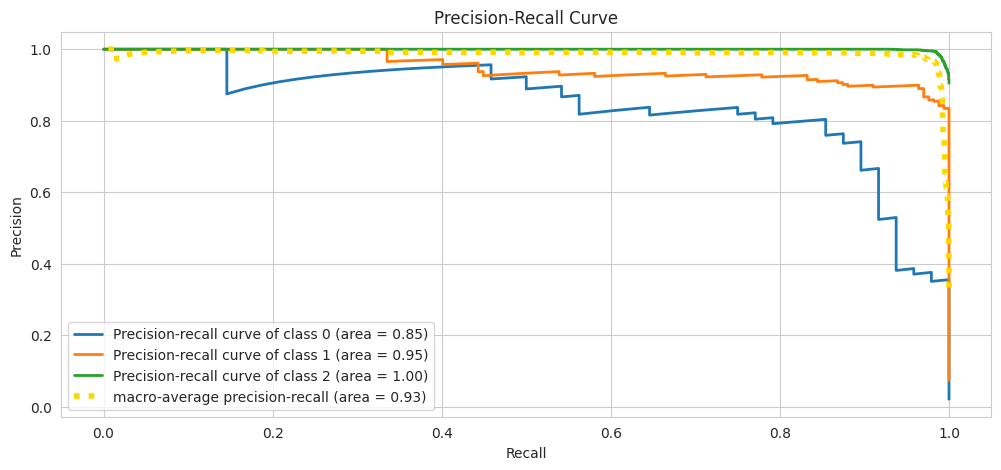

In [124]:
make_PR_curve(clf_mlp_smote, X_test, y_test)

In [125]:
#checking on log scaled

clf_mlp_log = MLPClassifier()
clf_mlp_log.fit(X_train_log, y_train)

clf_mlp_log_pred= make_scores(clf_mlp_log, X_test_log, y_test)

Accuracy :0.97084
AUC : 0.99345
Precision : 0.87585
Recall : 0.79661
F1 : 0.83002
              precision    recall  f1-score   support

           0       0.74      0.52      0.61        48
           1       0.91      0.88      0.90       167
           2       0.98      0.99      0.98      2048

    accuracy                           0.97      2263
   macro avg       0.88      0.80      0.83      2263
weighted avg       0.97      0.97      0.97      2263



In [126]:
# checking on balanced log scaled

clf_mlp_smote_log = MLPClassifier(max_iter=500)
clf_mlp_smote_log.fit(X_train_smote_log, y_train_smote)

clf_mlp_smote_log_pred= make_scores(clf_mlp_smote_log, X_test_log, y_test)

Accuracy :0.97039
AUC : 0.99468
Precision : 0.80780
Recall : 0.95958
F1 : 0.86539
              precision    recall  f1-score   support

           0       0.54      0.94      0.69        48
           1       0.89      0.97      0.93       167
           2       1.00      0.97      0.98      2048

    accuracy                           0.97      2263
   macro avg       0.81      0.96      0.87      2263
weighted avg       0.98      0.97      0.97      2263



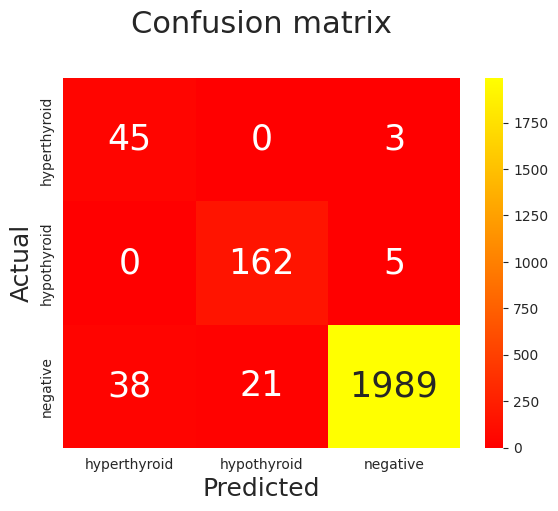

In [127]:
make_confusion_matrix(y_test, clf_mlp_smote_log_pred)

In [128]:
#checking on standardized scaled

clf_mlp_standardized = MLPClassifier(max_iter=500)
clf_mlp_standardized.fit(X_train_standardized, y_train)

clf_mlp_standardized_pred= make_scores(clf_mlp_standardized, X_test_standardized, y_test)

Accuracy :0.97879
AUC : 0.99732
Precision : 0.87224
Recall : 0.94416
F1 : 0.90560
              precision    recall  f1-score   support

           0       0.75      0.88      0.81        48
           1       0.87      0.98      0.92       167
           2       1.00      0.98      0.99      2048

    accuracy                           0.98      2263
   macro avg       0.87      0.94      0.91      2263
weighted avg       0.98      0.98      0.98      2263



In [129]:
# checking on balanced standardized scaled

clf_mlp_smote_standardized = MLPClassifier(max_iter=500)
clf_mlp_smote_standardized.fit(X_train_smote_standardized, y_train_smote)

clf_mlp_smote_standardized_pred= make_scores(clf_mlp_smote_standardized, X_test_standardized, y_test)

Accuracy :0.90278
AUC : 0.99415
Precision : 0.66411
Recall : 0.96419
F1 : 0.72495
              precision    recall  f1-score   support

           0       0.22      1.00      0.36        48
           1       0.77      1.00      0.87       167
           2       1.00      0.89      0.94      2048

    accuracy                           0.90      2263
   macro avg       0.66      0.96      0.72      2263
weighted avg       0.97      0.90      0.93      2263



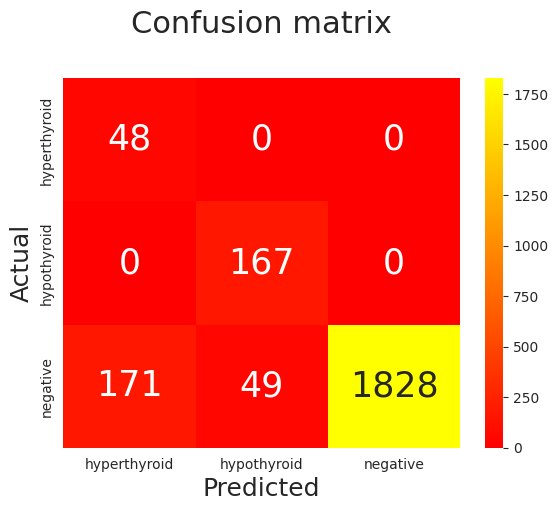

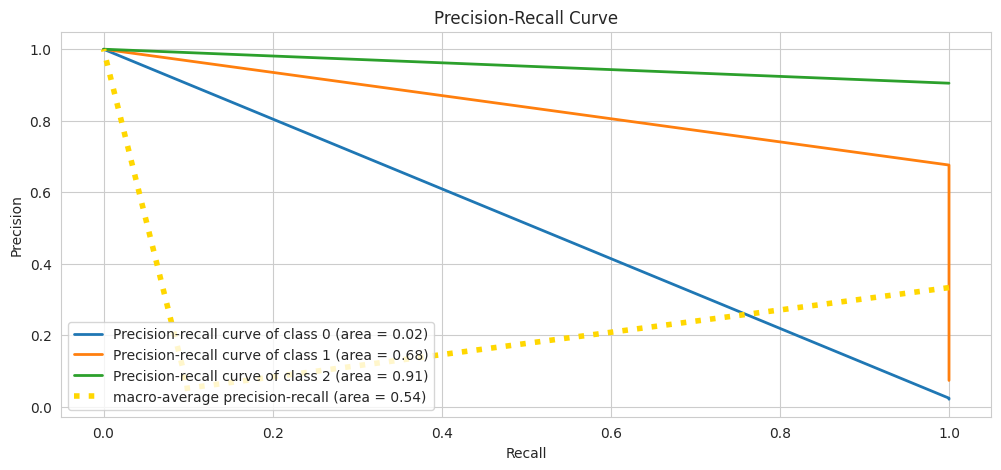

In [130]:
make_confusion_matrix(y_test, clf_mlp_smote_standardized_pred)
make_PR_curve(clf_mlp_smote_standardized, X_test, y_test)

/home/angel-tamang/myenv/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Training scores:
 [0.20540322 0.19455359 0.12842958 0.13709429 0.14712261 0.09870137
 0.08521266 0.07165308 0.0748271  0.07065837]

Testing scores:
 [1.09573198 1.08198919 0.77773038 0.38641078 0.38769515 0.29054943
 0.16637639 0.07768467 0.07888906 0.07572022]


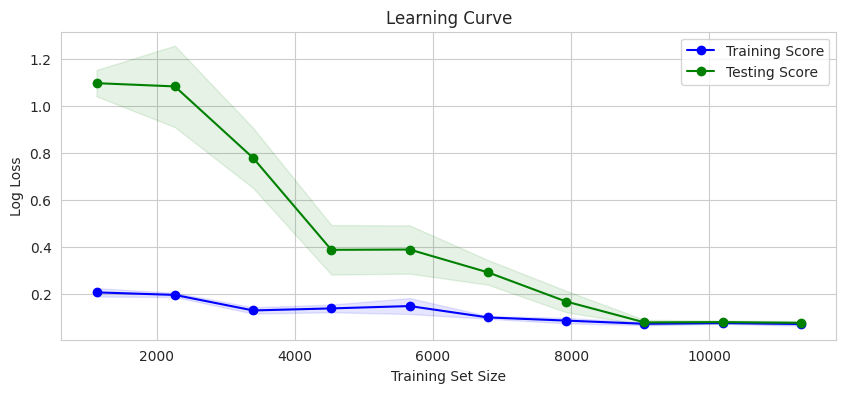

In [131]:
make_learning_curve(clf_mlp_smote_standardized, X_train_smote_standardized, y_train_smote)

In [132]:
#checking on normalized scaled

clf_mlp_normalized = MLPClassifier(max_iter=500)
clf_mlp_normalized.fit(X_train_normalized, y_train)

clf_mlp_normalized_pred= make_scores(clf_mlp_normalized, X_test_normalized, y_test)

Accuracy :0.51701
AUC : 0.92938
Precision : 0.65342
Recall : 0.69928
F1 : 0.49224
              precision    recall  f1-score   support

           0       0.04      1.00      0.08        48
           1       0.95      0.60      0.74       167
           2       0.96      0.50      0.66      2048

    accuracy                           0.52      2263
   macro avg       0.65      0.70      0.49      2263
weighted avg       0.94      0.52      0.65      2263



In [133]:
# checking on balanced normalized scaled

clf_mlp_smote_normalized = MLPClassifier(max_iter=500)
clf_mlp_smote_normalized.fit(X_train_smote_normalized, y_train_smote)

clf_mlp_smote_normalized_pred= make_scores(clf_mlp_smote_normalized, X_test_normalized, y_test)

Accuracy :0.22934
AUC : 0.91869
Precision : 0.63872
Recall : 0.60982
F1 : 0.37139
              precision    recall  f1-score   support

           0       0.03      1.00      0.05        48
           1       0.92      0.65      0.76       167
           2       0.97      0.18      0.30      2048

    accuracy                           0.23      2263
   macro avg       0.64      0.61      0.37      2263
weighted avg       0.95      0.23      0.33      2263



In [134]:
#checking on robust_scaled 

clf_mlp_robust_scaled = MLPClassifier(max_iter=500)
clf_mlp_robust_scaled.fit(X_train_robust_scaled, y_train)

clf_mlp_robust_scaled_pred= make_scores(clf_mlp_robust_scaled, X_test_robust_scaled, y_test)

Accuracy :0.98498
AUC : 0.99740
Precision : 0.90754
Recall : 0.95322
F1 : 0.92936
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        48
           1       0.92      0.98      0.94       167
           2       1.00      0.99      0.99      2048

    accuracy                           0.98      2263
   macro avg       0.91      0.95      0.93      2263
weighted avg       0.99      0.98      0.99      2263



In [135]:
# checking on balanced robust_scaled 

clf_mlp_smote_robust_scaled = MLPClassifier(max_iter=500)
clf_mlp_smote_robust_scaled.fit(X_train_smote_robust_scaled, y_train_smote)

clf_mlp_smote_robust_scaled_pred= make_scores(clf_mlp_smote_robust_scaled, X_test_robust_scaled, y_test)

Accuracy :0.73752
AUC : 0.96884
Precision : 0.49191
Recall : 0.87436
F1 : 0.52741
              precision    recall  f1-score   support

           0       0.15      0.92      0.25        48
           1       0.33      0.99      0.50       167
           2       1.00      0.71      0.83      2048

    accuracy                           0.74      2263
   macro avg       0.49      0.87      0.53      2263
weighted avg       0.93      0.74      0.79      2263



* On Evaluation, the models with best performances are:
            - SMOTE balanced, tuned and ccp optimized Decision Tree
            - SMOTE balanced, Random Forest
            - SMOTE balanced, and standardized MLP
* We will now try combining them through ensemble techniques

# Using Ensemble Techniques

## AdaBoosting

In [136]:
from sklearn.ensemble import AdaBoostClassifier

# Decision tree model
dt_model = clf_tuned_pruned_smote

# Random Forest model
rf_model = clf_rf_smote

# MLP model
mlp_model= clf_mlp_smote_standardized

# Initializing AdaBoostClassifier
boosting_model = AdaBoostClassifier()

# Make predictions on the train set
dt_preds_train = dt_model.predict(X_train_smote)
rf_preds_train = rf_model.predict(X_train_smote)
mlp_preds_train = mlp_model.predict(X_train_smote_standardized)


# Combine predictions using AdaBoost
ensemble_data = np.column_stack([dt_preds_train, rf_preds_train, mlp_preds_train])

# Fit the AdaBoost model
boosting_model.fit(ensemble_data, y_train_smote)

# Checking model's performance
ensemble_data_test = np.column_stack((dt_model.predict(X_test), rf_model.predict(X_test), mlp_model.predict(X_test_standardized)))
boosting_model_pred=make_scores(boosting_model, ensemble_data_test, y_test)




[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


Accuracy :0.98763
AUC : 0.97710
Precision : 0.89101
Recall : 0.96832
F1 : 0.92516
              precision    recall  f1-score   support

           0       0.71      0.92      0.80        48
           1       0.97      1.00      0.98       167
           2       1.00      0.99      0.99      2048

    accuracy                           0.99      2263
   macro avg       0.89      0.97      0.93      2263
weighted avg       0.99      0.99      0.99      2263



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


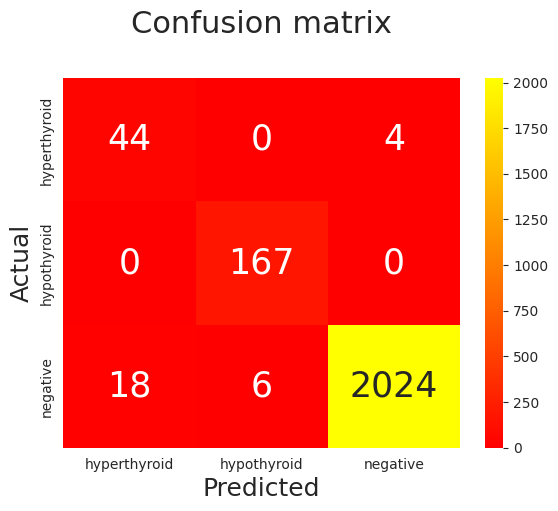

In [137]:
make_confusion_matrix(y_test, boosting_model_pred)

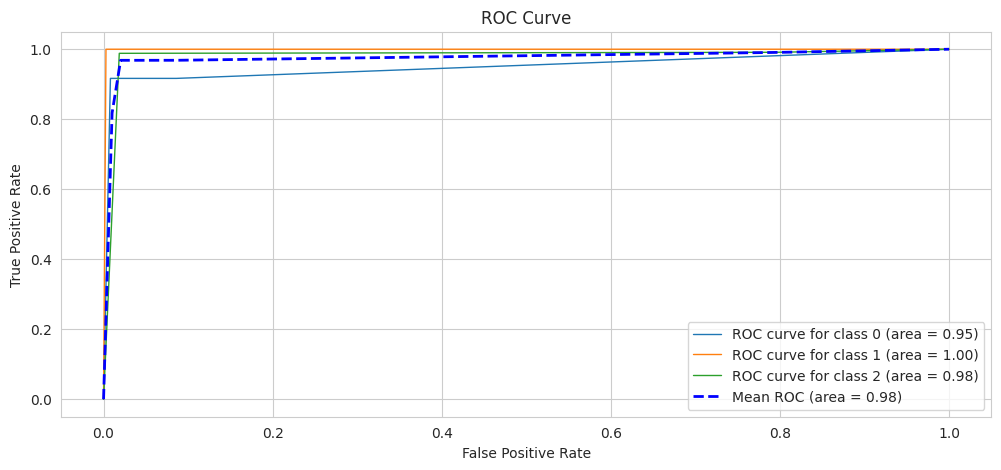

In [138]:
make_ROC_curve(boosting_model, ensemble_data_test, y_test)

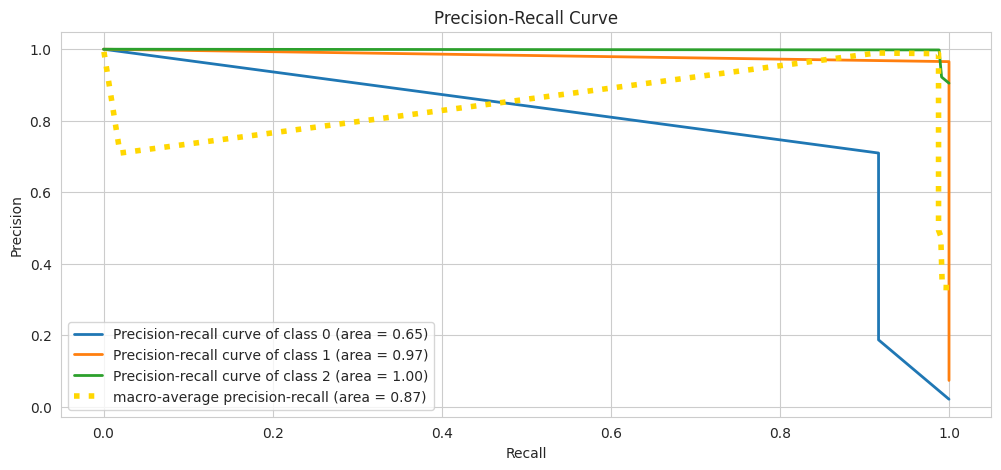

In [139]:
make_PR_curve(boosting_model, ensemble_data_test, y_test)

Training scores:
 [0.85840149 0.85811555 0.85827953 0.86086833 0.86438475 0.86565341
 0.86636246 0.8686402  0.86921415 0.86932603]

Testing scores:
 [0.86937878 0.86938064 0.86937854 0.86936867 0.86935952 0.86935756
 0.86939678 0.86938363 0.86938169 0.86941858]


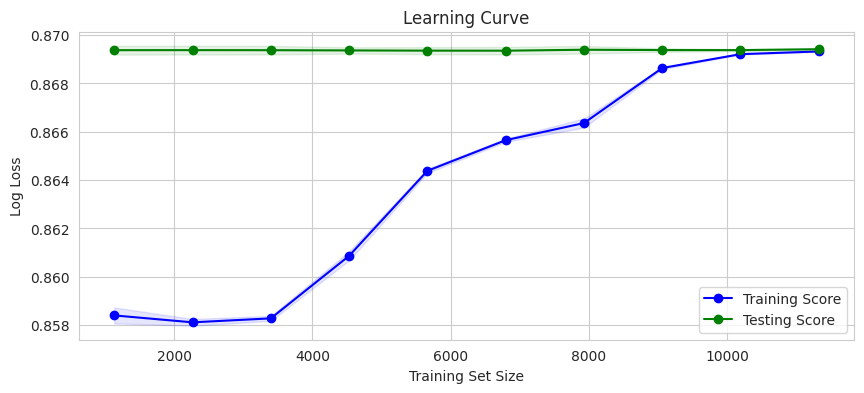

In [140]:
make_learning_curve(boosting_model,ensemble_data, y_train_smote)

## GradientBoostClassifier

In [141]:
from sklearn.ensemble import GradientBoostingClassifier

# Decision tree model
dt_model = clf_tuned_pruned_smote

# Random Forest model
rf_model = clf_rf_smote

# MLP model
mlp_model= clf_mlp_smote_standardized

# Initializing AdaBoostClassifier
boosting_model2 = GradientBoostingClassifier()

# Make predictions on the train set
dt_preds_train = dt_model.predict(X_train_smote)
rf_preds_train = rf_model.predict(X_train_smote)
mlp_preds_train = mlp_model.predict(X_train_smote_standardized)


# Combine predictions using AdaBoost
ensemble_data = np.column_stack([dt_preds_train, rf_preds_train, mlp_preds_train])

# Fit the AdaBoost model
boosting_model2.fit(ensemble_data, y_train_smote)

# Checking model's performance
ensemble_data_test = np.column_stack((dt_model.predict(X_test), rf_model.predict(X_test), mlp_model.predict(X_test_standardized)))
boosting_model2_pred=make_scores(boosting_model2, ensemble_data_test, y_test)




[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy :0.98763
AUC : 0.98031
Precision : 0.89101
Recall : 0.96832
F1 : 0.92516
              precision    recall  f1-score   support

           0       0.71      0.92      0.80        48
           1       0.97      1.00      0.98       167
           2       1.00      0.99      0.99      2048

    accuracy                           0.99      2263
   macro avg       0.89      0.97      0.93      2263
weighted avg       0.99      0.99      0.99      2263



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


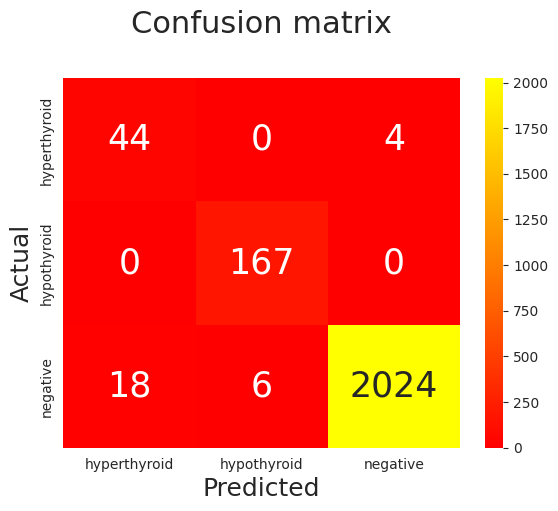

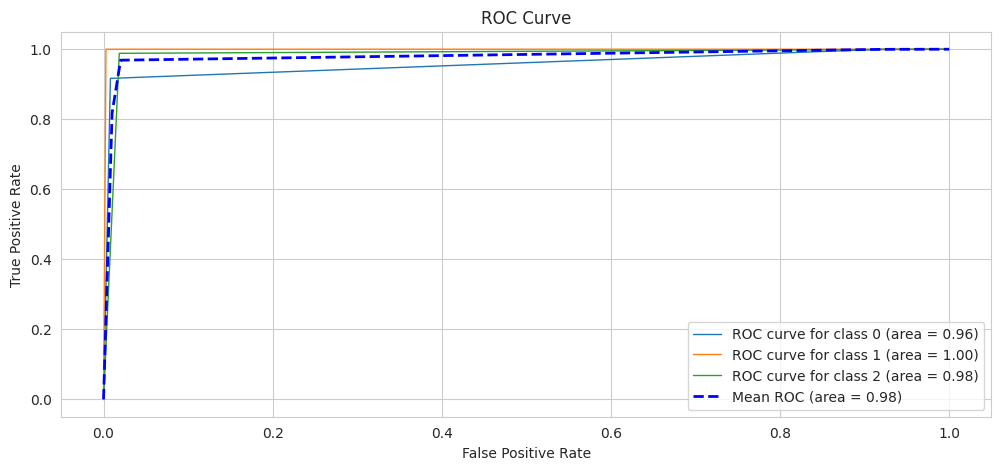

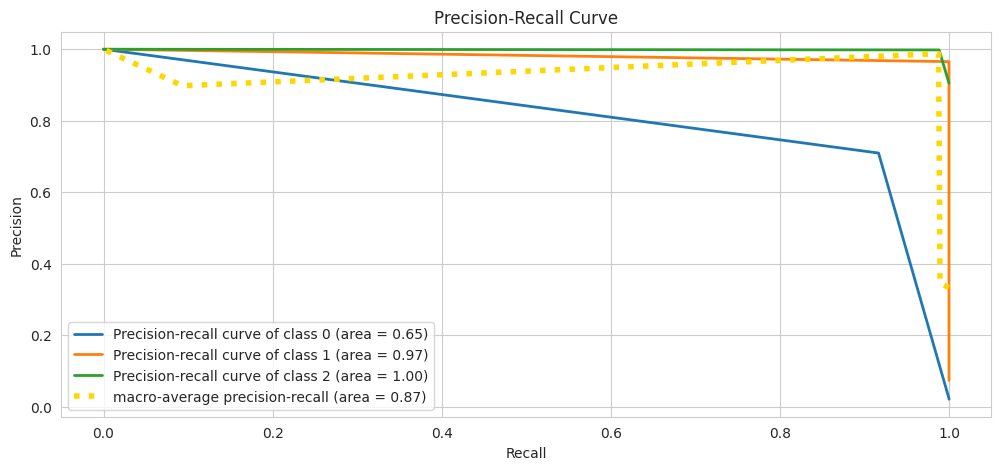

Training scores:
 [2.98414556e-07 2.81988278e-07 2.94345702e-07 4.85922844e-07
 8.09339055e-07 8.94233633e-07 9.08769020e-07 1.16585306e-06
 1.26299945e-06 1.28560405e-06]

Testing scores:
 [1.10740057e-06 1.09060735e-06 9.14780128e-07 1.10761720e-06
 1.19348774e-06 1.20172174e-06 1.19926998e-06 1.27278998e-06
 1.28354132e-06 1.28584358e-06]


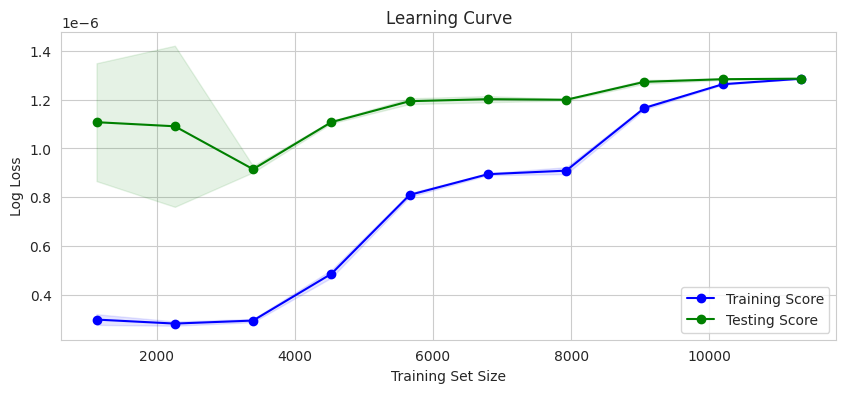

In [142]:
make_confusion_matrix(y_test, boosting_model2_pred)
make_ROC_curve(boosting_model2, ensemble_data_test, y_test)
make_PR_curve(boosting_model2, ensemble_data_test, y_test)
make_learning_curve(boosting_model2,ensemble_data, y_train_smote)

## HistGradientBoostingClassifier

In [143]:
from sklearn.ensemble import HistGradientBoostingClassifier

# Decision tree model
dt_model = clf_tuned_pruned_smote

# Random Forest model
rf_model = clf_rf_smote

# MLP model
mlp_model = clf_mlp_smote_standardized

# Initializing HistGradientBoostingClassifier
boosting_model3 = HistGradientBoostingClassifier()

# Make predictions on the train set
dt_preds_train = dt_model.predict(X_train_smote)
rf_preds_train = rf_model.predict(X_train_smote)
mlp_preds_train = mlp_model.predict(X_train_smote_standardized)

# Combine predictions using HistGradientBoostingClassifier
ensemble_data = np.column_stack([dt_preds_train, rf_preds_train, mlp_preds_train])


# Fit the HistGradientBoostingClassifier model
boosting_model3.fit(ensemble_data, y_train_smote)

# Checking model's performance
ensemble_data_test = np.column_stack((dt_model.predict(X_test), rf_model.predict(X_test), mlp_model.predict(X_test_standardized)))
boosting_model3_pred = make_scores(boosting_model3, ensemble_data_test, y_test)


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy :0.98763
AUC : 0.98625
Precision : 0.89101
Recall : 0.96832
F1 : 0.92516
              precision    recall  f1-score   support

           0       0.71      0.92      0.80        48
           1       0.97      1.00      0.98       167
           2       1.00      0.99      0.99      2048

    accuracy                           0.99      2263
   macro avg       0.89      0.97      0.93      2263
weighted avg       0.99      0.99      0.99      2263



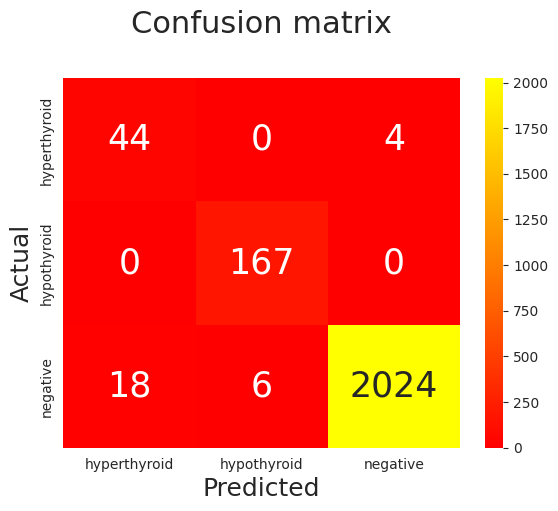

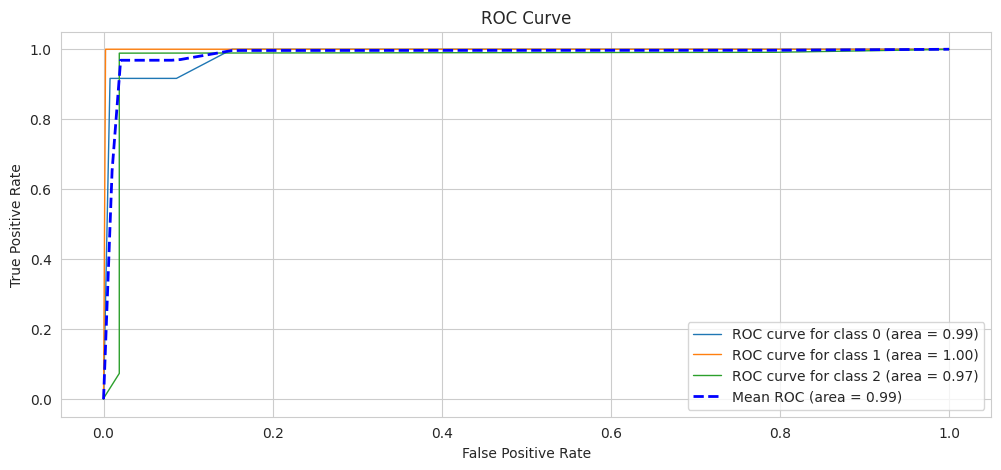

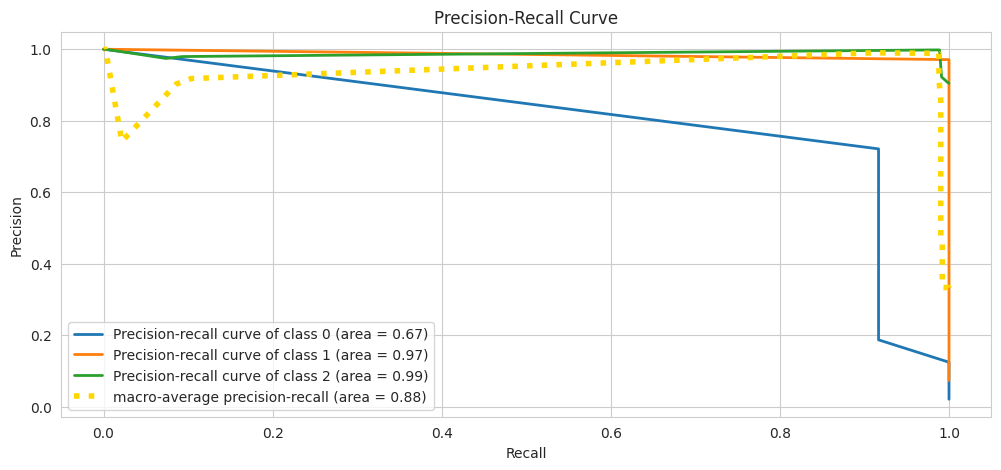

Training scores:
 [2.55334981e-06 1.32712114e-06 8.77612027e-07 5.90295091e-07
 4.38311729e-07 3.53486913e-07 2.89840997e-07 3.15657563e-07
 3.25577668e-07 2.86919446e-07]

Testing scores:
 [8.35024159e-05 7.05599568e-05 4.77195293e-06 1.57480056e-06
 8.44808781e-07 6.74044375e-07 5.51364841e-07 3.74225878e-07
 3.38443476e-07 2.87486485e-07]


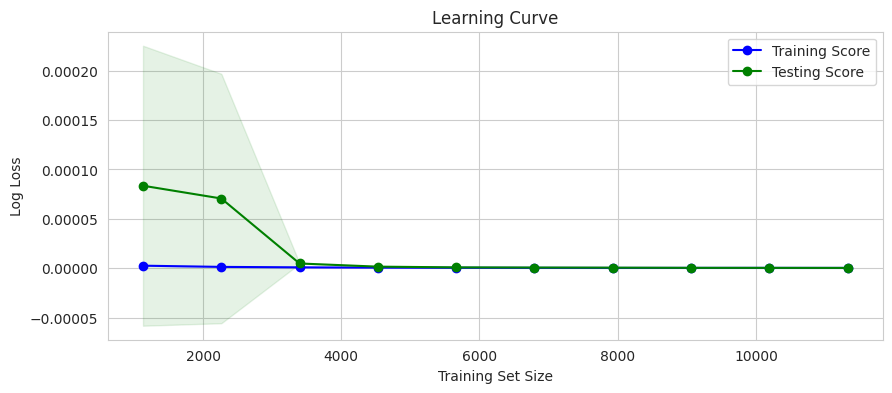

In [144]:
make_confusion_matrix(y_test, boosting_model3_pred)
make_ROC_curve(boosting_model3, ensemble_data_test, y_test)
make_PR_curve(boosting_model3, ensemble_data_test, y_test)
make_learning_curve(boosting_model3,ensemble_data, y_train_smote)

Accuracy :0.98939
AUC : 0.99859
Precision : 0.90172
Recall : 0.98070
F1 : 0.93604
              precision    recall  f1-score   support

           0       0.73      0.96      0.83        48
           1       0.98      0.99      0.99       167
           2       1.00      0.99      0.99      2048

    accuracy                           0.99      2263
   macro avg       0.90      0.98      0.94      2263
weighted avg       0.99      0.99      0.99      2263



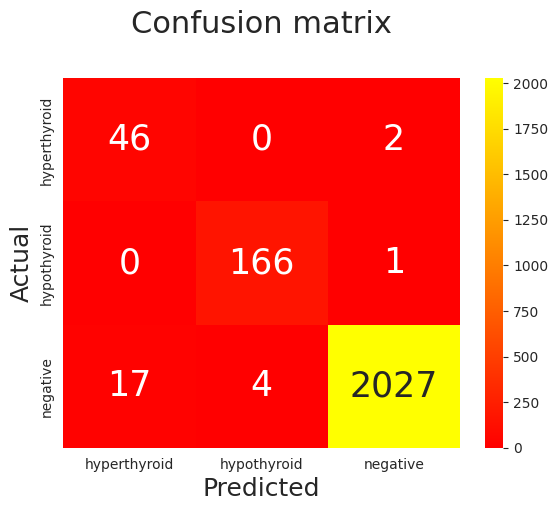

In [145]:
#Adaboosting using DT as estimator
# Initializing AdaBoostClassifier
weak_learner= DecisionTreeClassifier(criterion= 'gini', 
                             max_depth= 16, 
                             max_features= None, 
                             min_samples_leaf= 2,
                             min_samples_split= 4, 
                             random_state= None,
                             ccp_alpha= 0.0007197136754909773)
boosting_model4 = AdaBoostClassifier(estimator= weak_learner)

# Training model
boosting_model4.fit(X_train_smote, y_train_smote)

boosting_model4_pred=make_scores(boosting_model4, X_test, y_test)
make_confusion_matrix(y_test, boosting_model4_pred)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.9s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Accuracy :0.98498
AUC : 0.99861
Precision : 0.87299
Recall : 0.96734
F1 : 0.91339
              precision    recall  f1-score   support

           0       0.67      0.92      0.77        48
           1       0.95      1.00      0.98       167
           2       1.00      0.99      0.99      2048

    accuracy                           0.98      2263
   macro avg       0.87      0.97      0.91      2263
weighted avg       0.99      0.98      0.99      2263



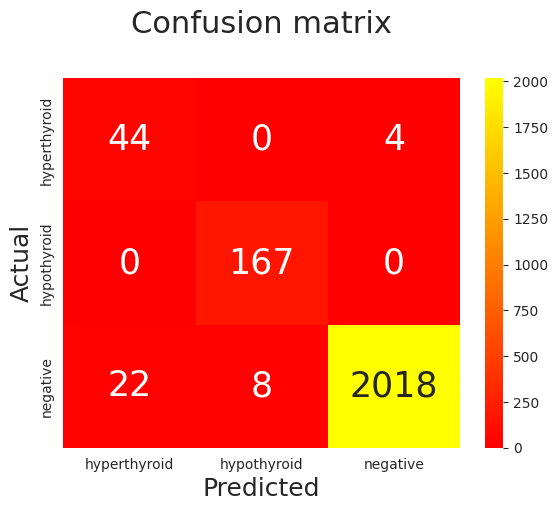

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.4s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.2s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    1.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    2.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Do

Training scores:
 [0.02602091 0.02483729 0.02395127 0.03195976 0.03263384 0.03065772
 0.02569885 0.02399928 0.02252685 0.01951336]

Testing scores:
 [0.24515476 0.270331   0.22010943 0.08877111 0.05305177 0.0507927
 0.04294808 0.03247568 0.03123527 0.02901668]


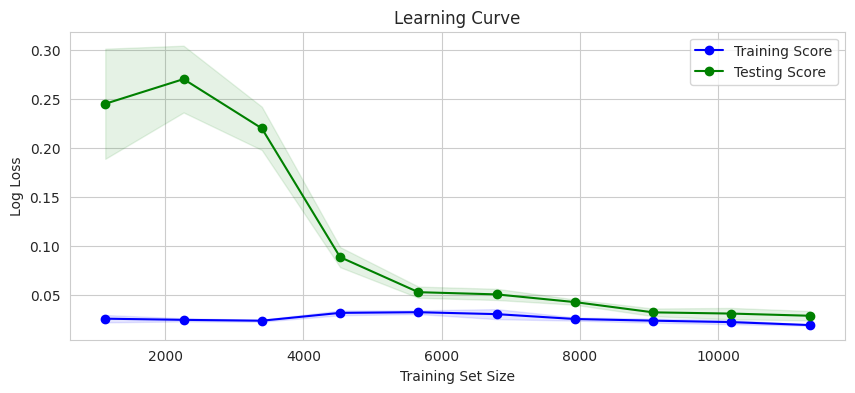

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


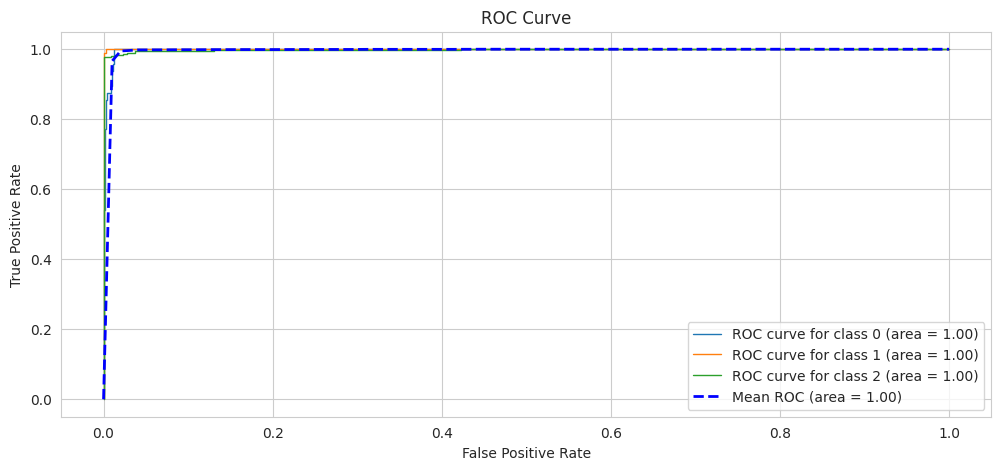

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


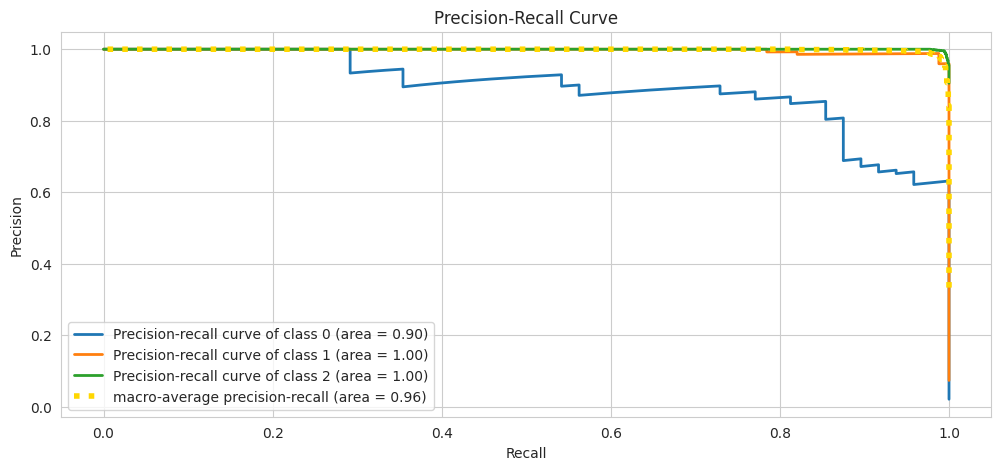

In [146]:
from sklearn.ensemble import VotingClassifier

# Decision tree model
dt_model = clf_tuned_pruned_smote

# Random Forest model
rf_model = clf_rf_smote

# MLP model
mlp_model= clf_mlp_smote

boosting_model5= VotingClassifier(estimators=[('dr', dt_model), ('rf', rf_model), ('mlp', mlp_model)], voting='soft')
boosting_model5.fit(X_train_smote, y_train_smote)

boosting_model5_pred=make_scores(boosting_model5, X_test, y_test)
make_confusion_matrix(y_test, boosting_model5_pred)
make_learning_curve(boosting_model5, X_train_smote, y_train_smote)
make_ROC_curve(boosting_model5, X_test, y_test)
make_PR_curve(boosting_model5, X_test, y_test)

In [147]:
make_scores(boosting_model5, X_train_smote, y_train_smote)

Accuracy :0.99597
AUC : 0.99999
Precision : 0.99600
Recall : 0.99597
F1 : 0.99597
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4719
           1       1.00      1.00      1.00      4719
           2       1.00      0.99      0.99      4719

    accuracy                           1.00     14157
   macro avg       1.00      1.00      1.00     14157
weighted avg       1.00      1.00      1.00     14157



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


array([2, 2, 2, ..., 1, 1, 1])

## Manual testing best model i.e. MaxVoter

In [148]:
# Manual testing the Model 

# Decision tree model
dt_model = clf_tuned_pruned_smote

# Random Forest model
rf_model = clf_rf_smote

# MLP model
mlp_model= clf_mlp_smote

# Initialzing median values for continous data, incase user doesn't enter them
median_values = df_copy.median(numeric_only=True)

# New data point
new_data = {'TSH': 0.1 , 'T3': 3 ,'TT4': 254, 'age': 55}

new_data1= dict()
new_data1 = {k: v for k, v in new_data.items() if v is not None or v is None}

# Update the new_data1 for None
for key in new_data1:
    if key == 'sex' and new_data1[key] == None:
        new_data1[key] = 'F'

for key in new_data1:
    if key in median_values.index and new_data1[key] == None:
        # It's a numerical feature
        new_data1[key] = median_values[key]
    elif key not in median_values.index and new_data1[key]== None:
        # It's a categorical feature, update the corresponding binary columns
        new_data1[key] = 'f'


    # The columns list of X_train
columns_list = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'sex_F', 'sex_M',
                'thyroid_surgery_f', 'thyroid_surgery_t', 'on_thyroxine_f',
                'on_thyroxine_t', 'sick_f', 'sick_t', 'goitre_f', 'goitre_t',
                'psych_f', 'psych_t']

# Create a DataFrame for the new data point with the same columns as X_train, initialized to 0
new_X = pd.DataFrame(0, index=[0], columns=columns_list)
 

# Update the DataFrame with the new data
for key in new_data1:
    if key in median_values.index:
        # It's a numerical feature
        new_X[key] = new_data1[key]
    else:
        # It's a categorical feature, update the corresponding binary columns
        new_X[key + '_f'] = 1 if new_data1[key] == 'f' else 0
        new_X[key + '_t'] = 1 if new_data1[key] == 't' else 0

# Fill missing numerical features with the median values from the original data
for column in median_values.index:
    if column not in new_data1 or column == None :
        new_X[column] = median_values[column]
        
# Fill missing categorical features with f which is the highest in original data i.e. mostly negatives
for column in new_X.columns:
    if column[:-2] not in new_data1 or column:
        if column.endswith("_f"):
            new_X[column] = 1

# Handle the 'sex' feature separately as it's not binary in the original data
if new_data1.get('sex') == None:
    new_X['sex_F'] = 1 
    new_X['sex_M'] = 0
else:
    new_X['sex_F'] = 1 if new_data1.get('sex') == 'F' else 0
    new_X['sex_M'] = 1 if new_data1.get('sex') == 'M' else 0
    
    


# Ensure the order of columns matches that of X_train
new_X = new_X.reindex(columns=columns_list)

# Ensemble technique to predict new data
dt_preds_new = dt_model.predict(new_X)
rf_preds_new = rf_model.predict(new_X)
mlp_preds_new = mlp_model.predict(new_X)

print(dt_preds_new)
print(rf_preds_new)
print(mlp_preds_new)

ensemble_preds_new = boosting_model5.predict(new_X)
# Make a prediction
print('Prediction:', ensemble_preds_new)


[0]
[0]
[2]
Prediction: [0]


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [149]:
import pickle

# Save the Models as pickle files

pickle.dump(boosting_model5, open('Boosted_Model.pkl', 'wb'))



In [150]:
# Scale TSH by log
X_train_smote_TSH = X_train_smote.copy() 
X_test_TSH= X_test.copy()

X_train_smote_TSH['TSH'] = np.log(X_train_smote_TSH.TSH + 0.01)
X_test_TSH['TSH'] = np.log(X_test_TSH.TSH + 0.01)

In [151]:
clf_tuned_smote_TSH = DecisionTreeClassifier(criterion= 'gini', 
                             max_depth= 16, 
                             max_features= None, 
                             min_samples_leaf= 2,
                             min_samples_split= 4, 
                             random_state= None,
                             ccp_alpha=0.0007197136754909773)
clf_tuned_smote_TSH.fit(X_train_smote_TSH, y_train_smote)

clf_tuned_smote_TSH_pred= make_scores(clf_tuned_smote_TSH,X_test_TSH, y_test)

Accuracy :0.98188
AUC : 0.98039
Precision : 0.85168
Recall : 0.96620
F1 : 0.89793
              precision    recall  f1-score   support

           0       0.60      0.92      0.73        48
           1       0.95      1.00      0.98       167
           2       1.00      0.98      0.99      2048

    accuracy                           0.98      2263
   macro avg       0.85      0.97      0.90      2263
weighted avg       0.99      0.98      0.98      2263



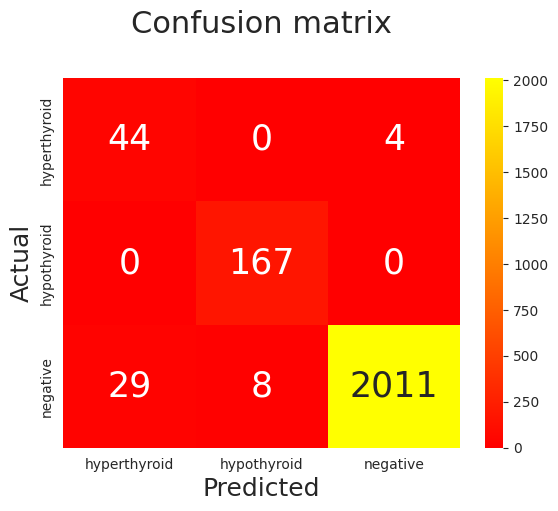

Training scores:
 [0.01300356 0.02437857 0.03397338 0.04166151 0.04321557 0.04067449
 0.03892579 0.03713398 0.0345479  0.03203991]

Testing scores:
 [1.85645443 1.01792812 0.53934261 0.24692761 0.1174036  0.11817202
 0.06856426 0.06284635 0.05712885 0.04712598]


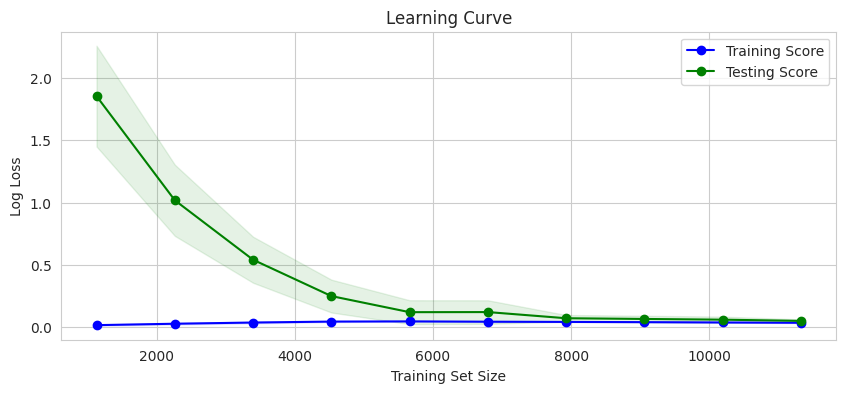

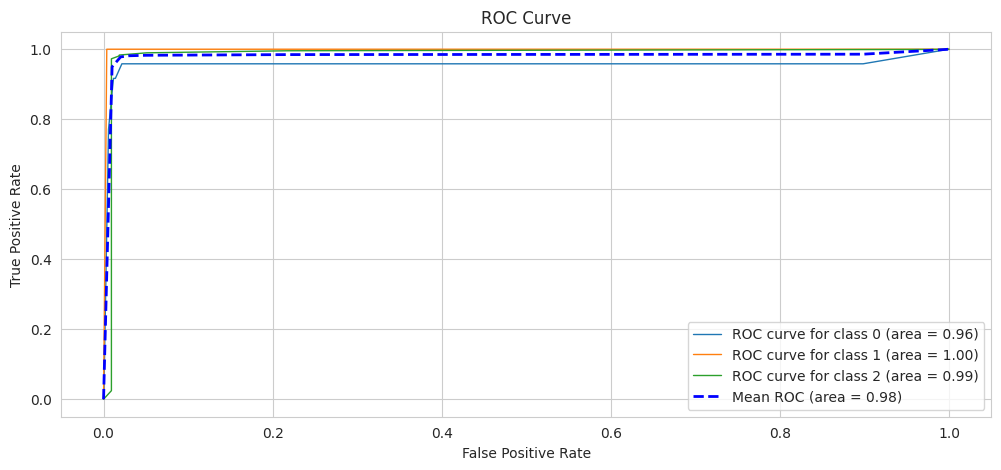

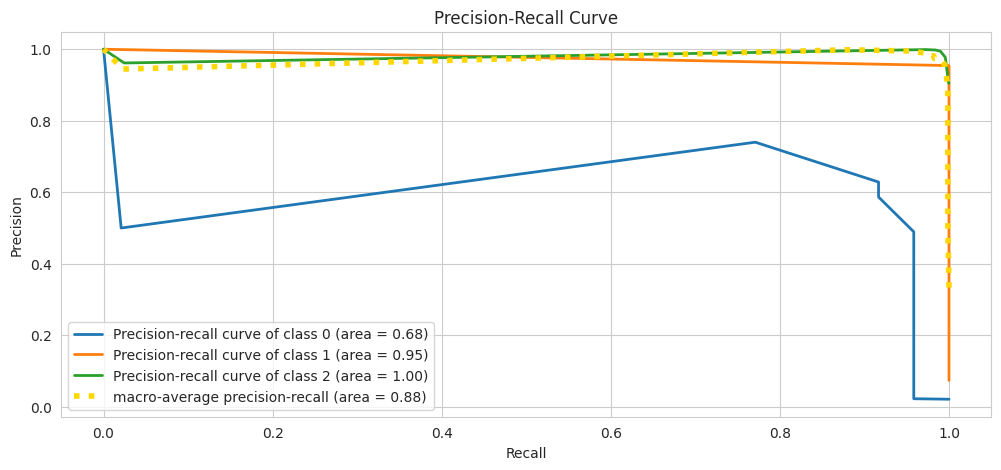

In [152]:
make_confusion_matrix(y_test, clf_tuned_smote_TSH_pred)
make_learning_curve(clf_tuned_smote_TSH, X_train_smote_TSH, y_train_smote)
make_ROC_curve(clf_tuned_smote_TSH, X_test_TSH, y_test)
make_PR_curve(clf_tuned_smote_TSH, X_test_TSH, y_test)

Training scores:
 [0.01300356 0.02473113 0.03397338 0.04166151 0.04321557 0.04067449
 0.03892579 0.03713398 0.0345479  0.03203991]

Testing scores:
 [1.97978895 1.04221972 0.54460403 0.24692761 0.11427679 0.11562657
 0.10418376 0.0603009  0.05728179 0.04727893]


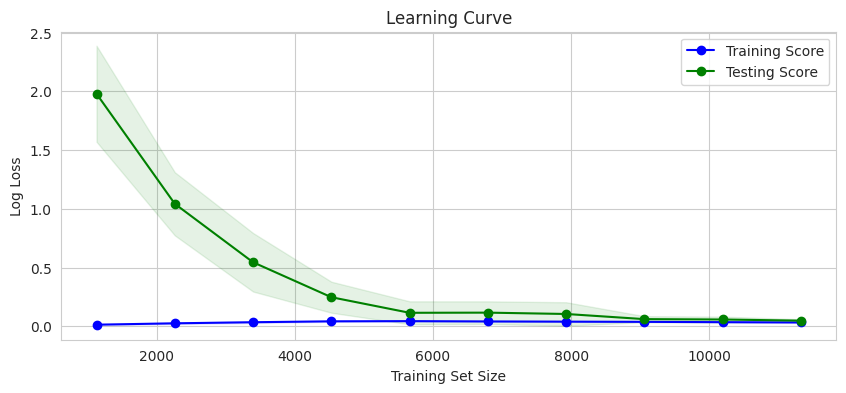

In [153]:
make_learning_curve(DecisionTreeClassifier(criterion= 'gini', 
                             max_depth= 16, 
                             max_features= None, 
                             min_samples_leaf= 2,
                             min_samples_split= 4, 
                             random_state= None, ccp_alpha= 0.0007197136754909773), X_train_smote, y_train_smote)